<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ode-integration" data-toc-modified-id="ode-integration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ode integration</a></span><ul class="toc-item"><li><span><a href="#env-set-up" data-toc-modified-id="env-set-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>env set-up</a></span></li><li><span><a href="#functions" data-toc-modified-id="functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>functions</a></span></li><li><span><a href="#model-test" data-toc-modified-id="model-test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>model test</a></span></li><li><span><a href="#situations-($x$,-$a_P$,-$g_P$,-$g_B$)" data-toc-modified-id="situations-($x$,-$a_P$,-$g_P$,-$g_B$)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>situations ($x$, $a_P$, $g_P$, $g_B$)</a></span></li></ul></li><li><span><a href="#contour-result-plotting" data-toc-modified-id="contour-result-plotting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>contour result plotting</a></span><ul class="toc-item"><li><span><a href="#env-set-up" data-toc-modified-id="env-set-up-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>env set-up</a></span></li><li><span><a href="#functions" data-toc-modified-id="functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>functions</a></span></li><li><span><a href="#situations" data-toc-modified-id="situations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>situations</a></span></li></ul></li><li><span><a href="#discrepancies-between-analytical-and-numerical-solutions" data-toc-modified-id="discrepancies-between-analytical-and-numerical-solutions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>discrepancies between analytical and numerical solutions</a></span><ul class="toc-item"><li><span><a href="#env-set-up" data-toc-modified-id="env-set-up-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>env set-up</a></span></li><li><span><a href="#functions-(similar-to-that-in-section-1)" data-toc-modified-id="functions-(similar-to-that-in-section-1)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>functions (similar to that in section 1)</a></span></li><li><span><a href="#discrepancies-scan:-in-Rscript" data-toc-modified-id="discrepancies-scan:-in-Rscript-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>discrepancies scan: in Rscript</a></span></li><li><span><a href="#data-import" data-toc-modified-id="data-import-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>data import</a></span></li><li><span><a href="#density-plot-of-discrepancies" data-toc-modified-id="density-plot-of-discrepancies-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>density plot of discrepancies</a></span></li><li><span><a href="#distribution" data-toc-modified-id="distribution-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>distribution</a></span></li><li><span><a href="#effect-of-initial-density" data-toc-modified-id="effect-of-initial-density-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>effect of initial density</a></span></li></ul></li><li><span><a href="#carbon-harvest" data-toc-modified-id="carbon-harvest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>carbon harvest</a></span></li></ul></div>

# ode integration
## env set-up

In [1]:
library(repr) ; options(repr.plot.width=18, repr.plot.height= 10) ## change plot default parameter in Jupyter
library(deSolve)
cBp <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#e79f00", "#9ad0f3", "#F0E442", "#999999", "#cccccc", "#6633ff", "#00FFCC", "#0066cc")

## functions

In [2]:
ebc7 = function(t, pop, para){
    with(as.list(c(pop, para)),{
        ## ode
        dC = g_P*e_PR*(1-e_P)*P +a_P*P^2 +g_B*(e_BR*(1-e_B)-1)*C*B +m_B*B -x*C
        dP = g_P*e_PR*e_P*P -a_P*P^2
        dB = g_B*e_BR*e_B*C*B -m_B*B
        
        list(c(dC, dP, dB))
    })
}

In [3]:
ebcPlt = function(endTime=1e3, iniPop=1, parameter=c(0,.875,.63,.259,.001,.6,.55,1.046,.14)){#iniPop=1e-12
    ## env setting
    tIme = seq(0,endTime,1)
    pAra = c(x = parameter[1],
             e_PR = parameter[2], e_P = parameter[3], g_P = parameter[4], a_P = parameter[5],
             e_BR = parameter[6], e_B = parameter[7], g_B = parameter[8], m_B = parameter[9])
    pops = c(C = iniPop, P = iniPop, B = iniPop)
    
    ## ode solve
    rEs = ode(y=pops, times=tIme, func=ebc7, parms=pAra)
    rEs = as.data.frame(rEs)
    rEs$total = rEs$C+rEs$P+rEs$B
    
    ## plotting
    par(mar=c(5, 5, 3, 1), xpd=TRUE, cex = 1) ## c(B,L,T,R)
    matplot(rEs[,1], rEs[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab=paste0(colnames(rEs)[1]," (day)"), ylab="carbon density (gC/m^3)", cex.lab=2, cex.axis=2, cex.main=2, main=paste0(names(pAra)," = ",pAra, collapse=", "))
    legend("topleft", inset=c(0,0), legend = paste0(colnames(rEs)[-1],": ",round(rEs[nrow(rEs),-1],2)), pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)
    #text(x=rep(rEs[nrow(rEs)-30,1],4), y=rEs[nrow(rEs),-1]+7, label=round(rEs[nrow(rEs),-1],2), cex=1.3)
}

In [4]:
ebcDefault = function(x="l",aP="l",gP="l",gB="l"){ ## l/m/h
    pA=rep(NA,4)
    if(x=="l"){pA[1]=0}else if(x=="h"){pA[1]=1}else{pA[1]=.5}
    if(aP=="l"){pA[2]=.001}else if(aP=="h"){pA[2]=.4}else{pA[2]=.2004}
    if(gP=="l"){pA[3]=.259}else if(gP=="h"){pA[3]=.556}else{pA[3]=.4075}
    if(gB=="l"){pA[4]=1.046}else if(gB=="h"){pA[4]=8.414}else{pA[4]=4.855}
    ebcPlt(parameter=c(pA[1],.875,.63,pA[3],pA[2],.6,.55,pA[4],.14))
}

## model test

In [5]:
tIme = seq(0,1e3,1)
pAra = c(x = 0,
         e_PR = .875, e_P = .63, g_P = .259, a_P = .001,
         e_BR = .6, e_B = .55, g_B = 1.046, m_B = .14)
pops = c(C = 1e-12, P = 1e-12, B = 1e-12)

In [6]:
rEs = ode(y=pops, times=tIme, func=ebc7, parms=pAra)
rEs = as.data.frame(rEs)
rEs$total = rEs$C+rEs$P+rEs$B
tail(rEs)

,time,C,P,B,total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
996,995,0.4055855,142.7737,190.6699,333.8492
997,996,0.4055855,142.7737,190.6699,333.8492
998,997,0.4055855,142.7737,190.6699,333.8492
999,998,0.4055855,142.7737,190.6699,333.8492
1000,999,0.4055855,142.7737,190.6699,333.8492
1001,1000,0.4055855,142.7737,190.6699,333.8492


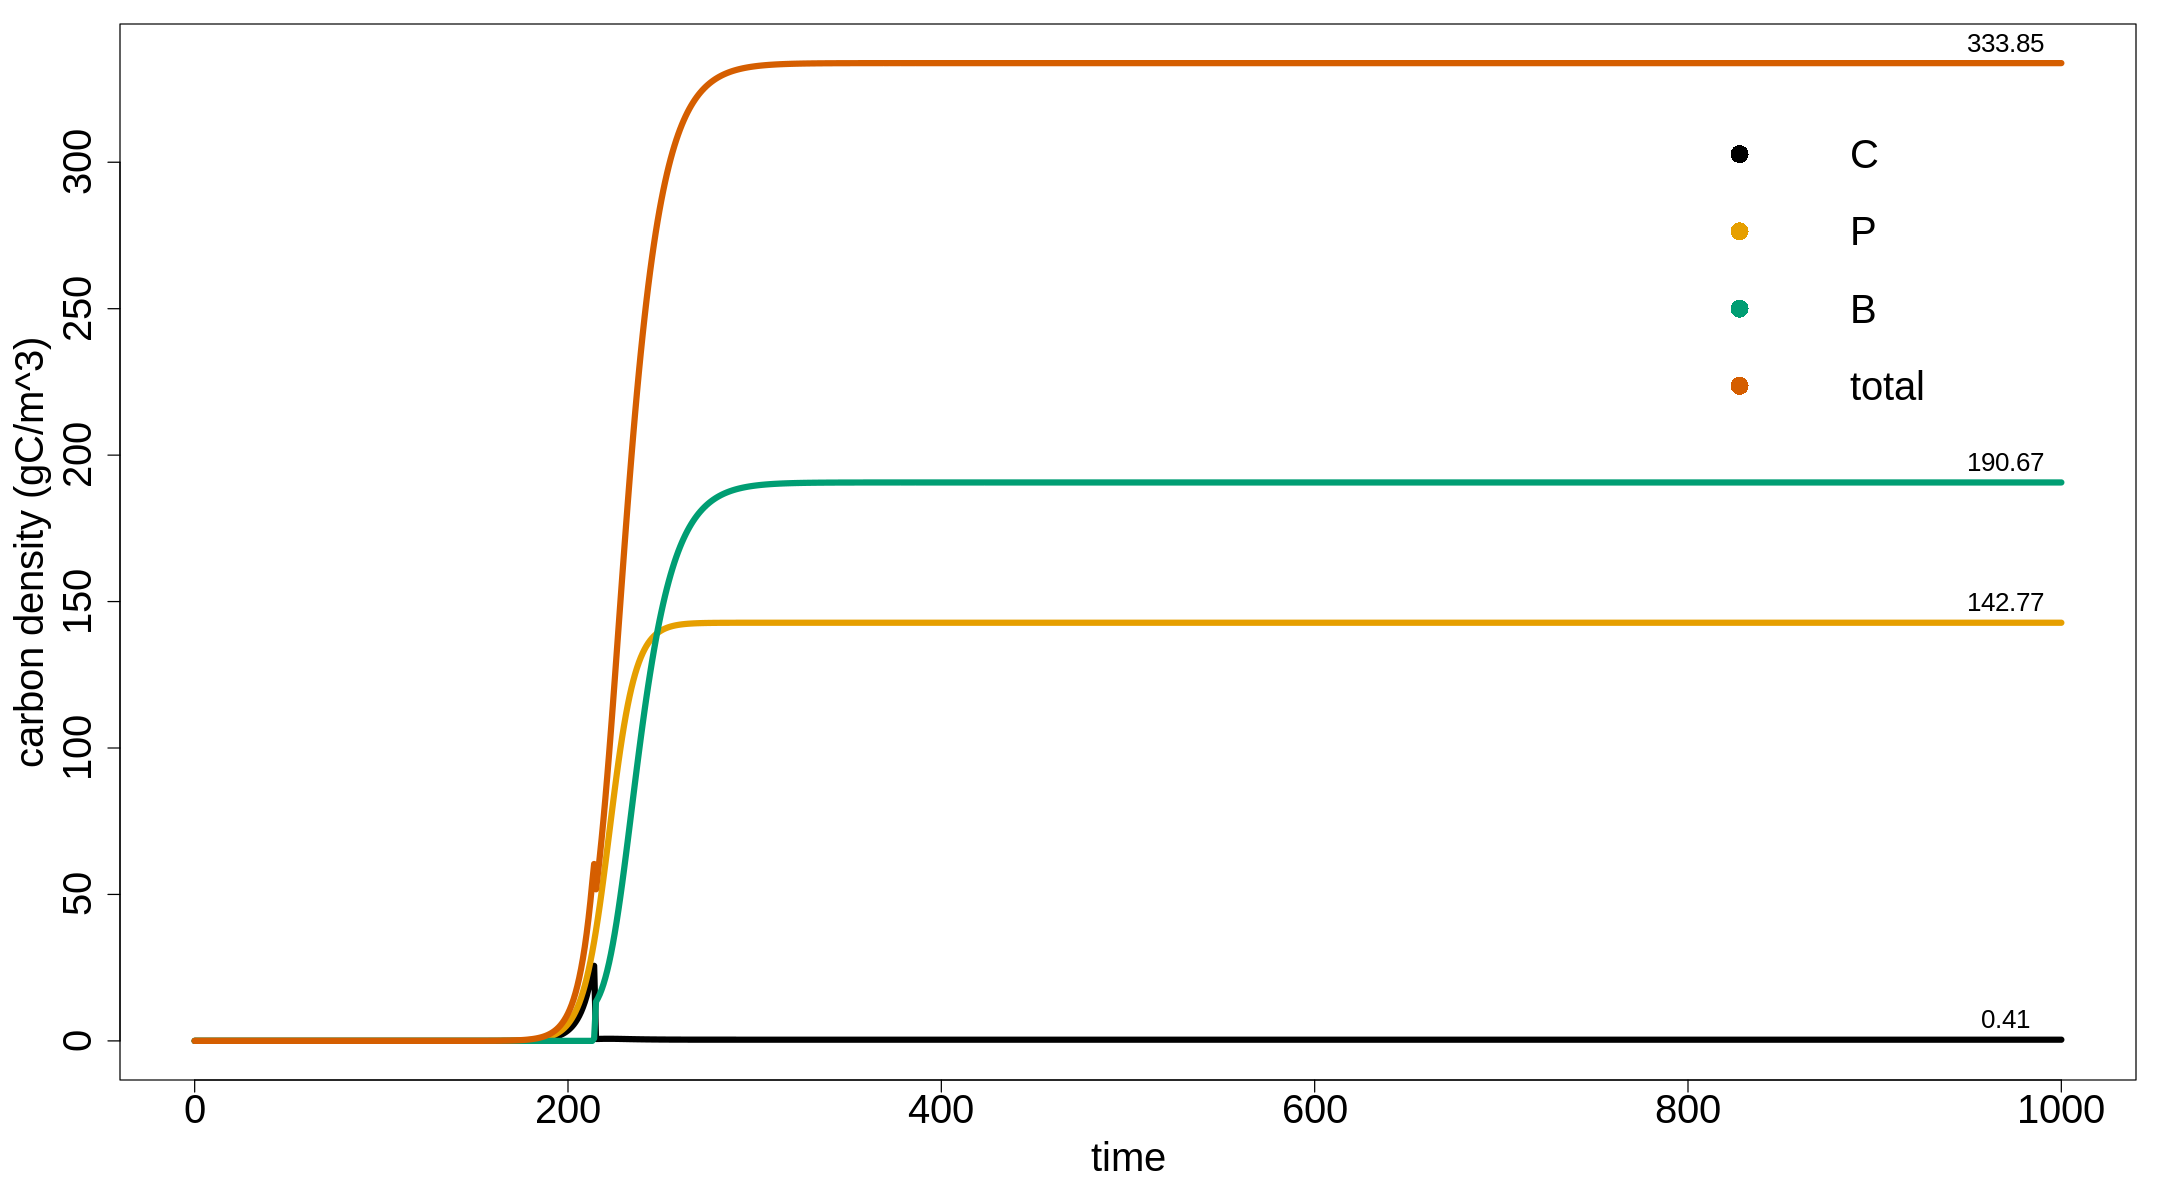

In [7]:
par(mar=c(5, 5, 1, 1), xpd=TRUE, cex = 1) ## c(B,L,T,R)
matplot(rEs[,1], rEs[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab=colnames(rEs)[1], ylab="carbon density (gC/m^3)", cex.lab=2, cex.axis=2)
legend("topright", inset=c(0,.05), legend = colnames(rEs)[-1], pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)
text(x=rep(rEs[nrow(rEs)-30,1],4), y=rEs[nrow(rEs),-1]+7, label=round(rEs[nrow(rEs),-1],2), cex=1.3)

## situations ($x$, $a_P$, $g_P$, $g_B$)

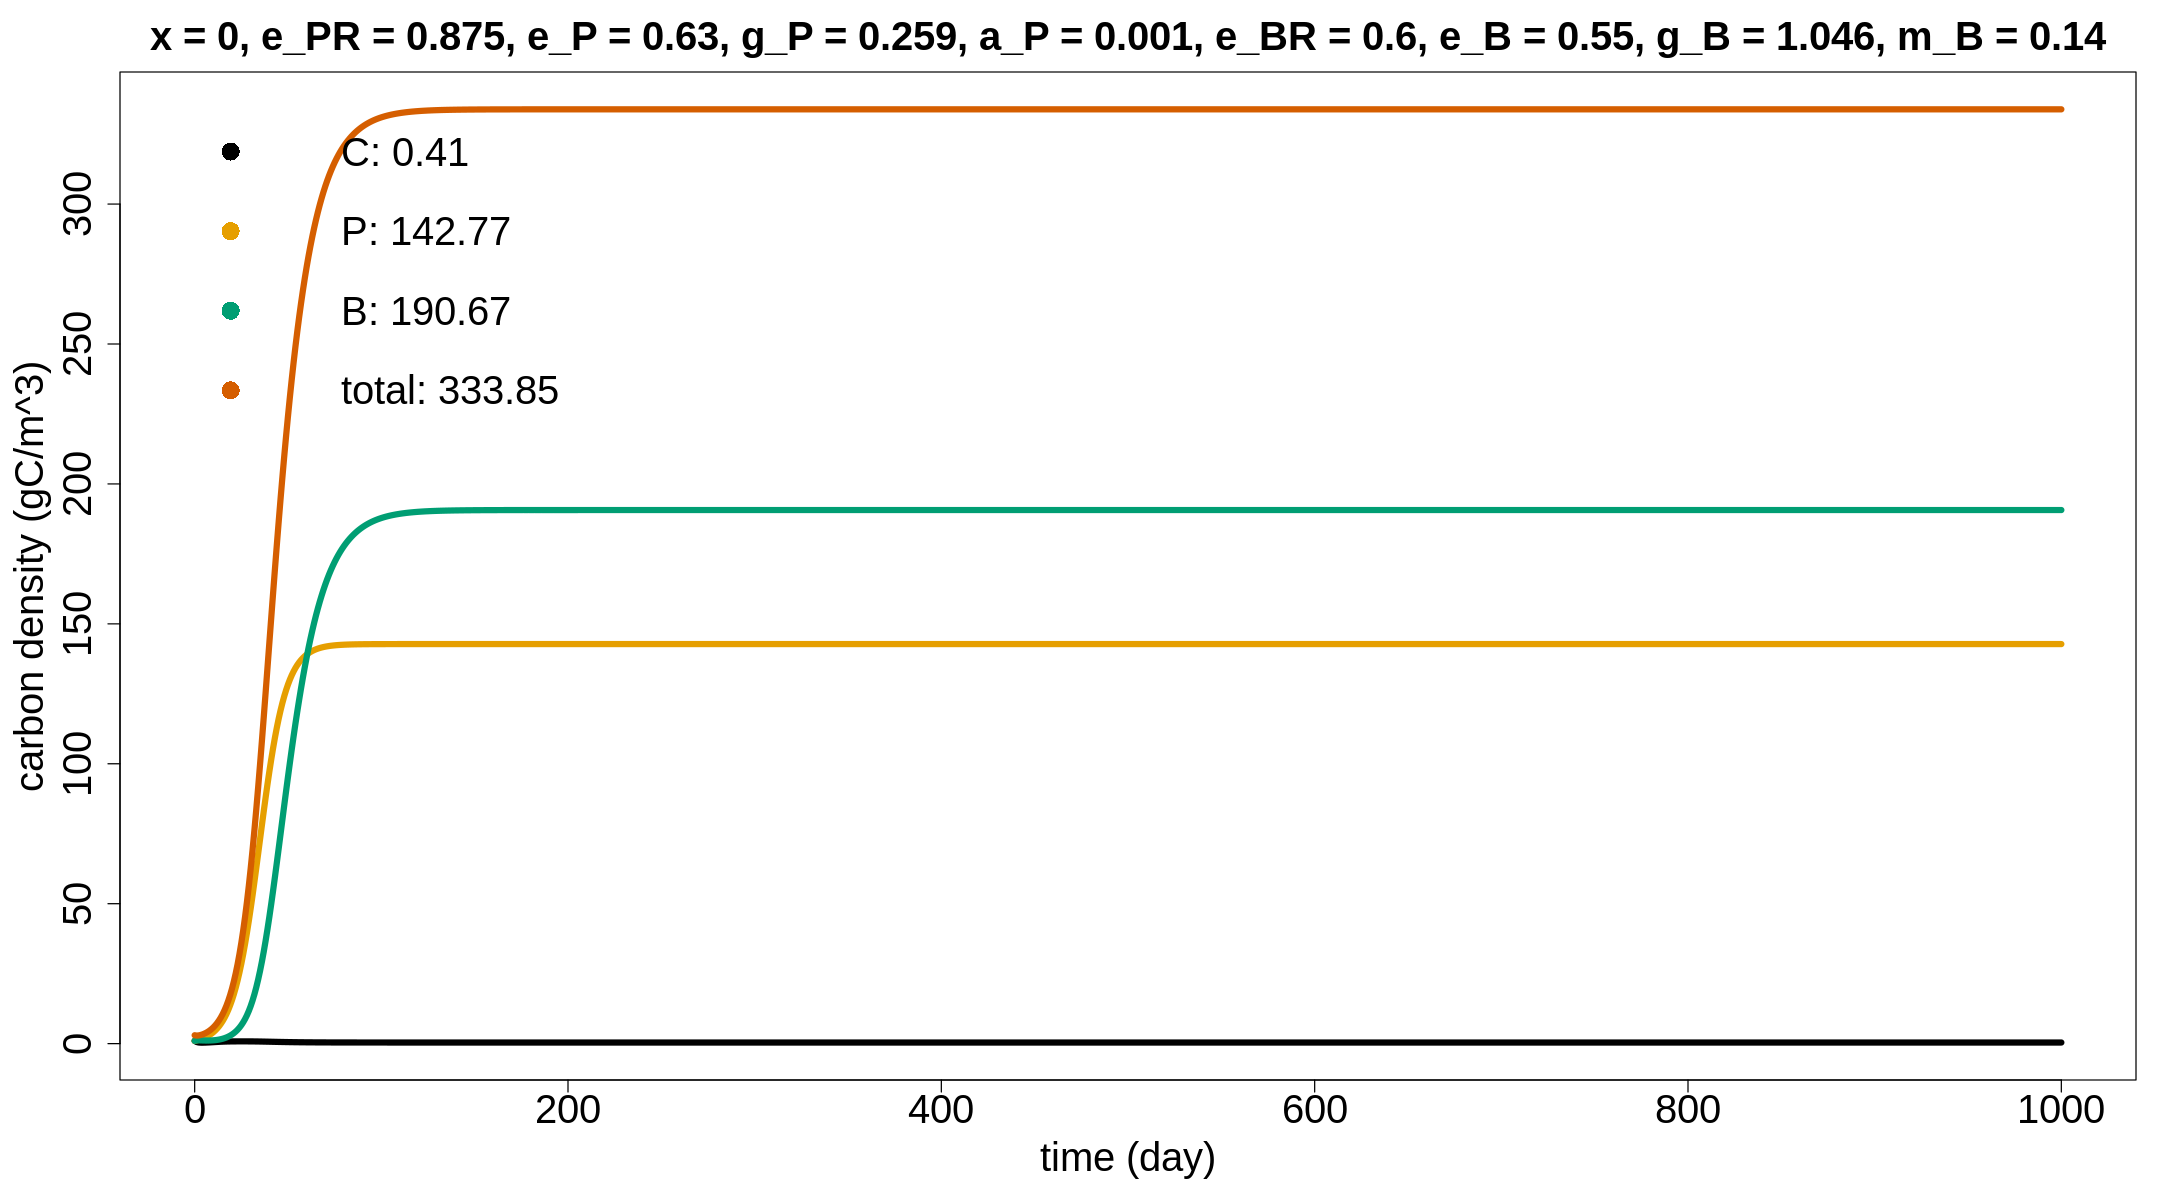

In [8]:
ebcDefault("l","l","l","l")

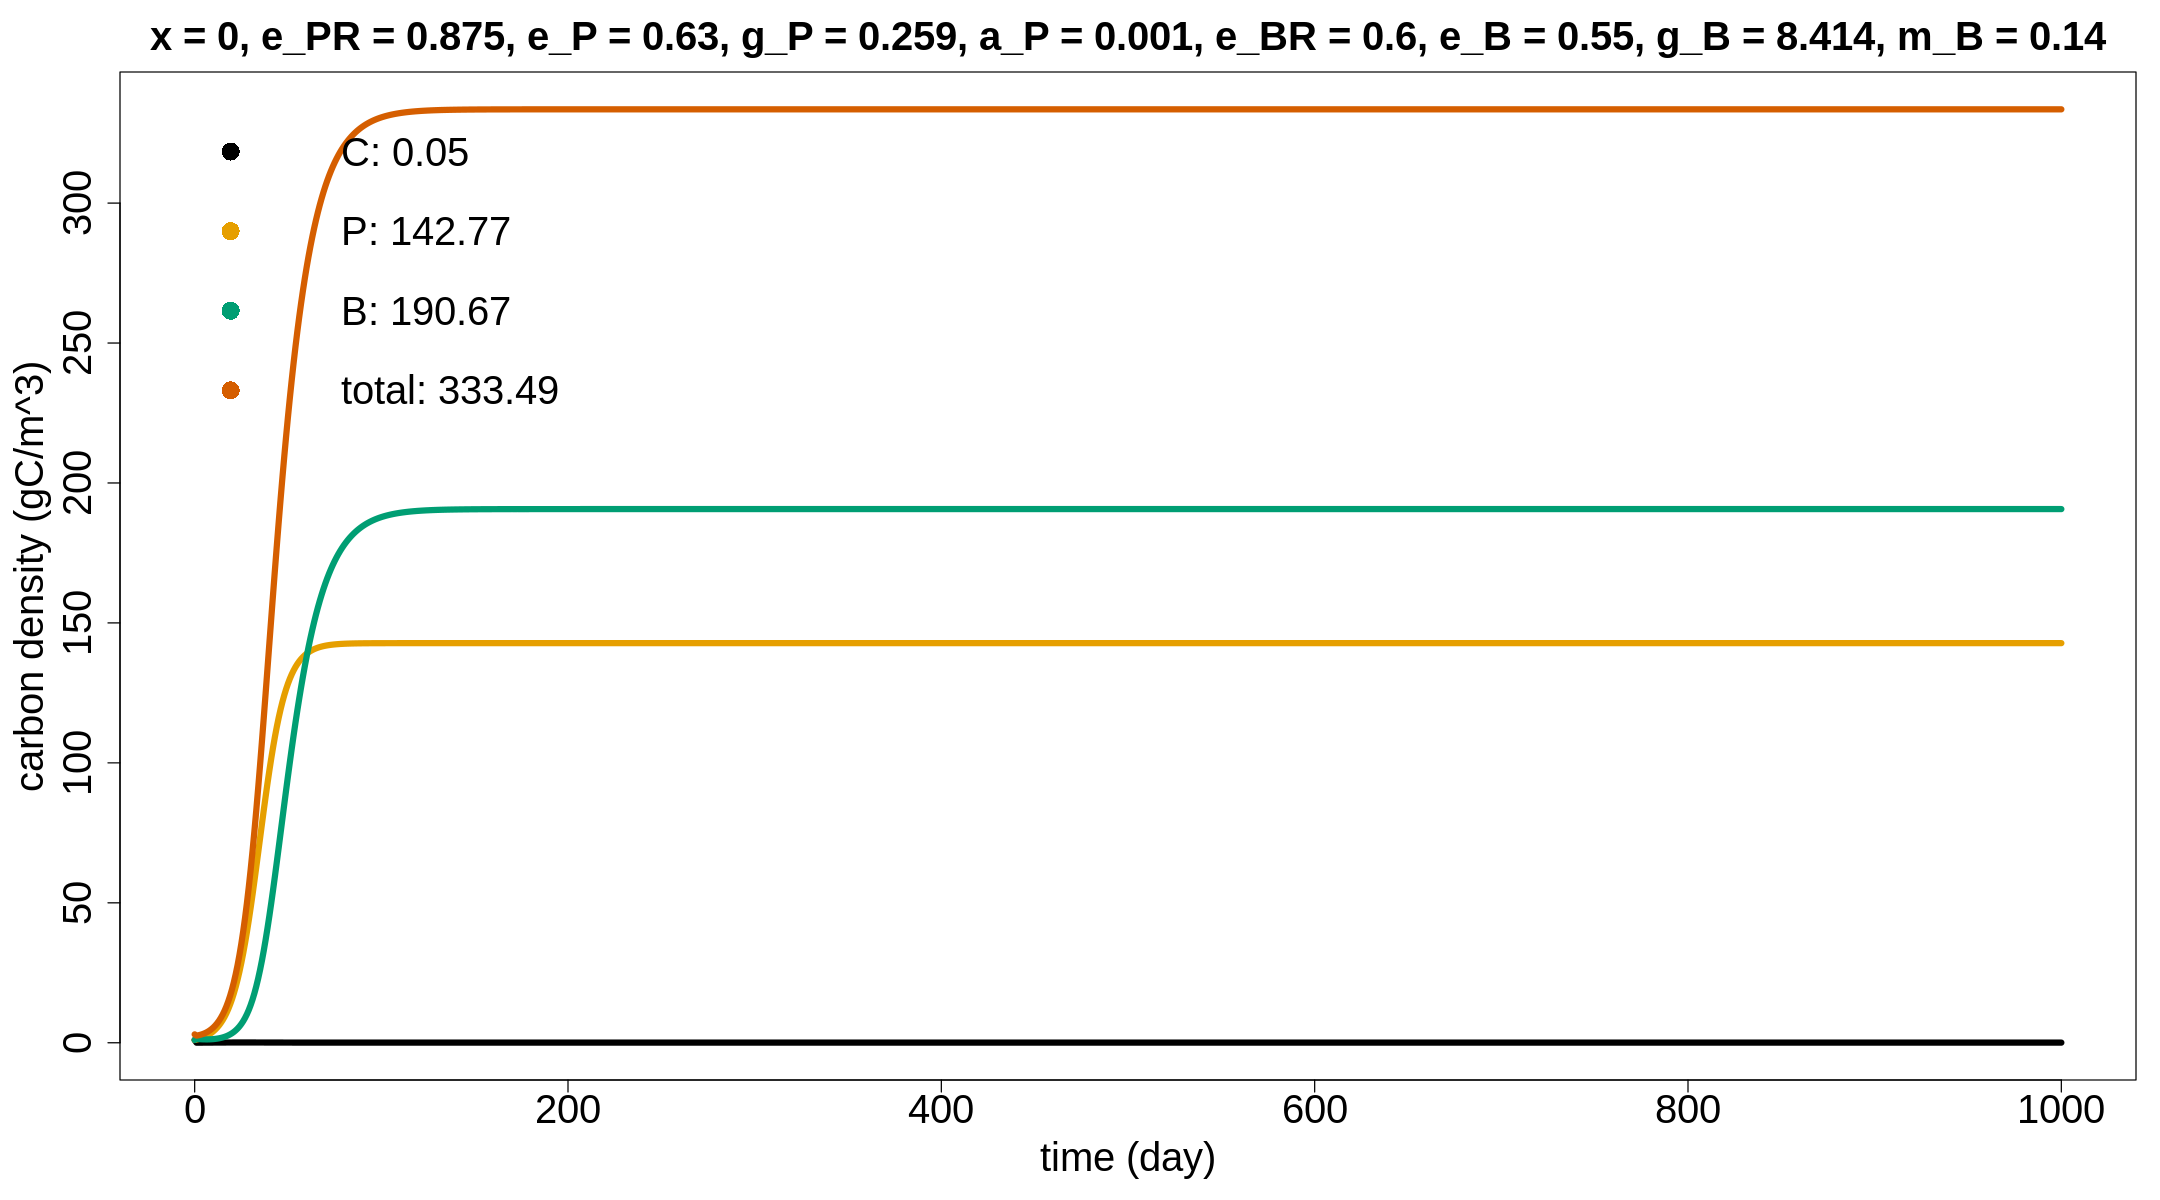

In [9]:
ebcDefault("l","l","l","h")

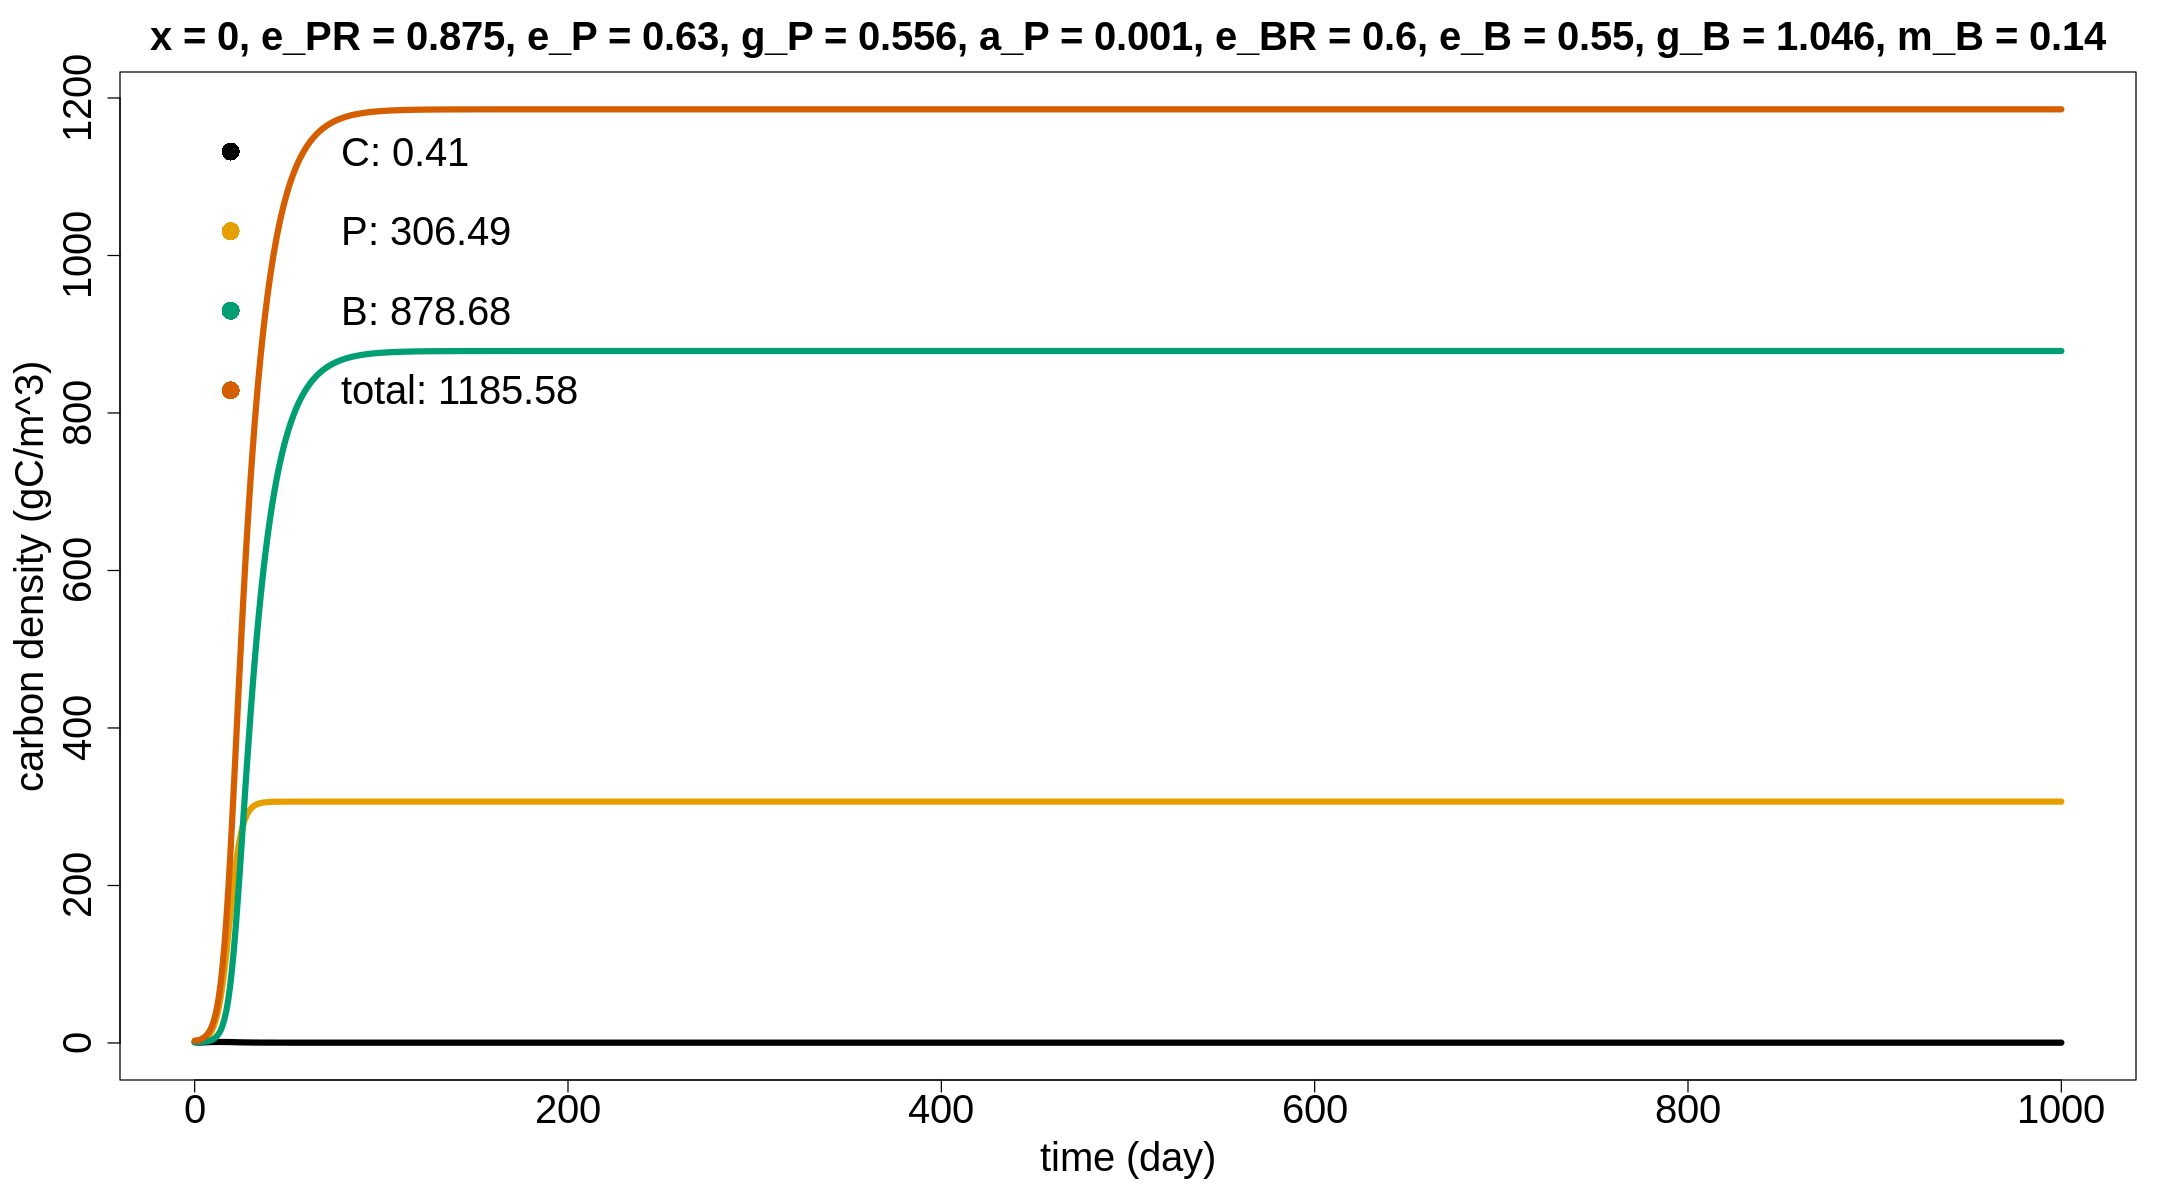

In [10]:
ebcDefault("l","l","h","l")

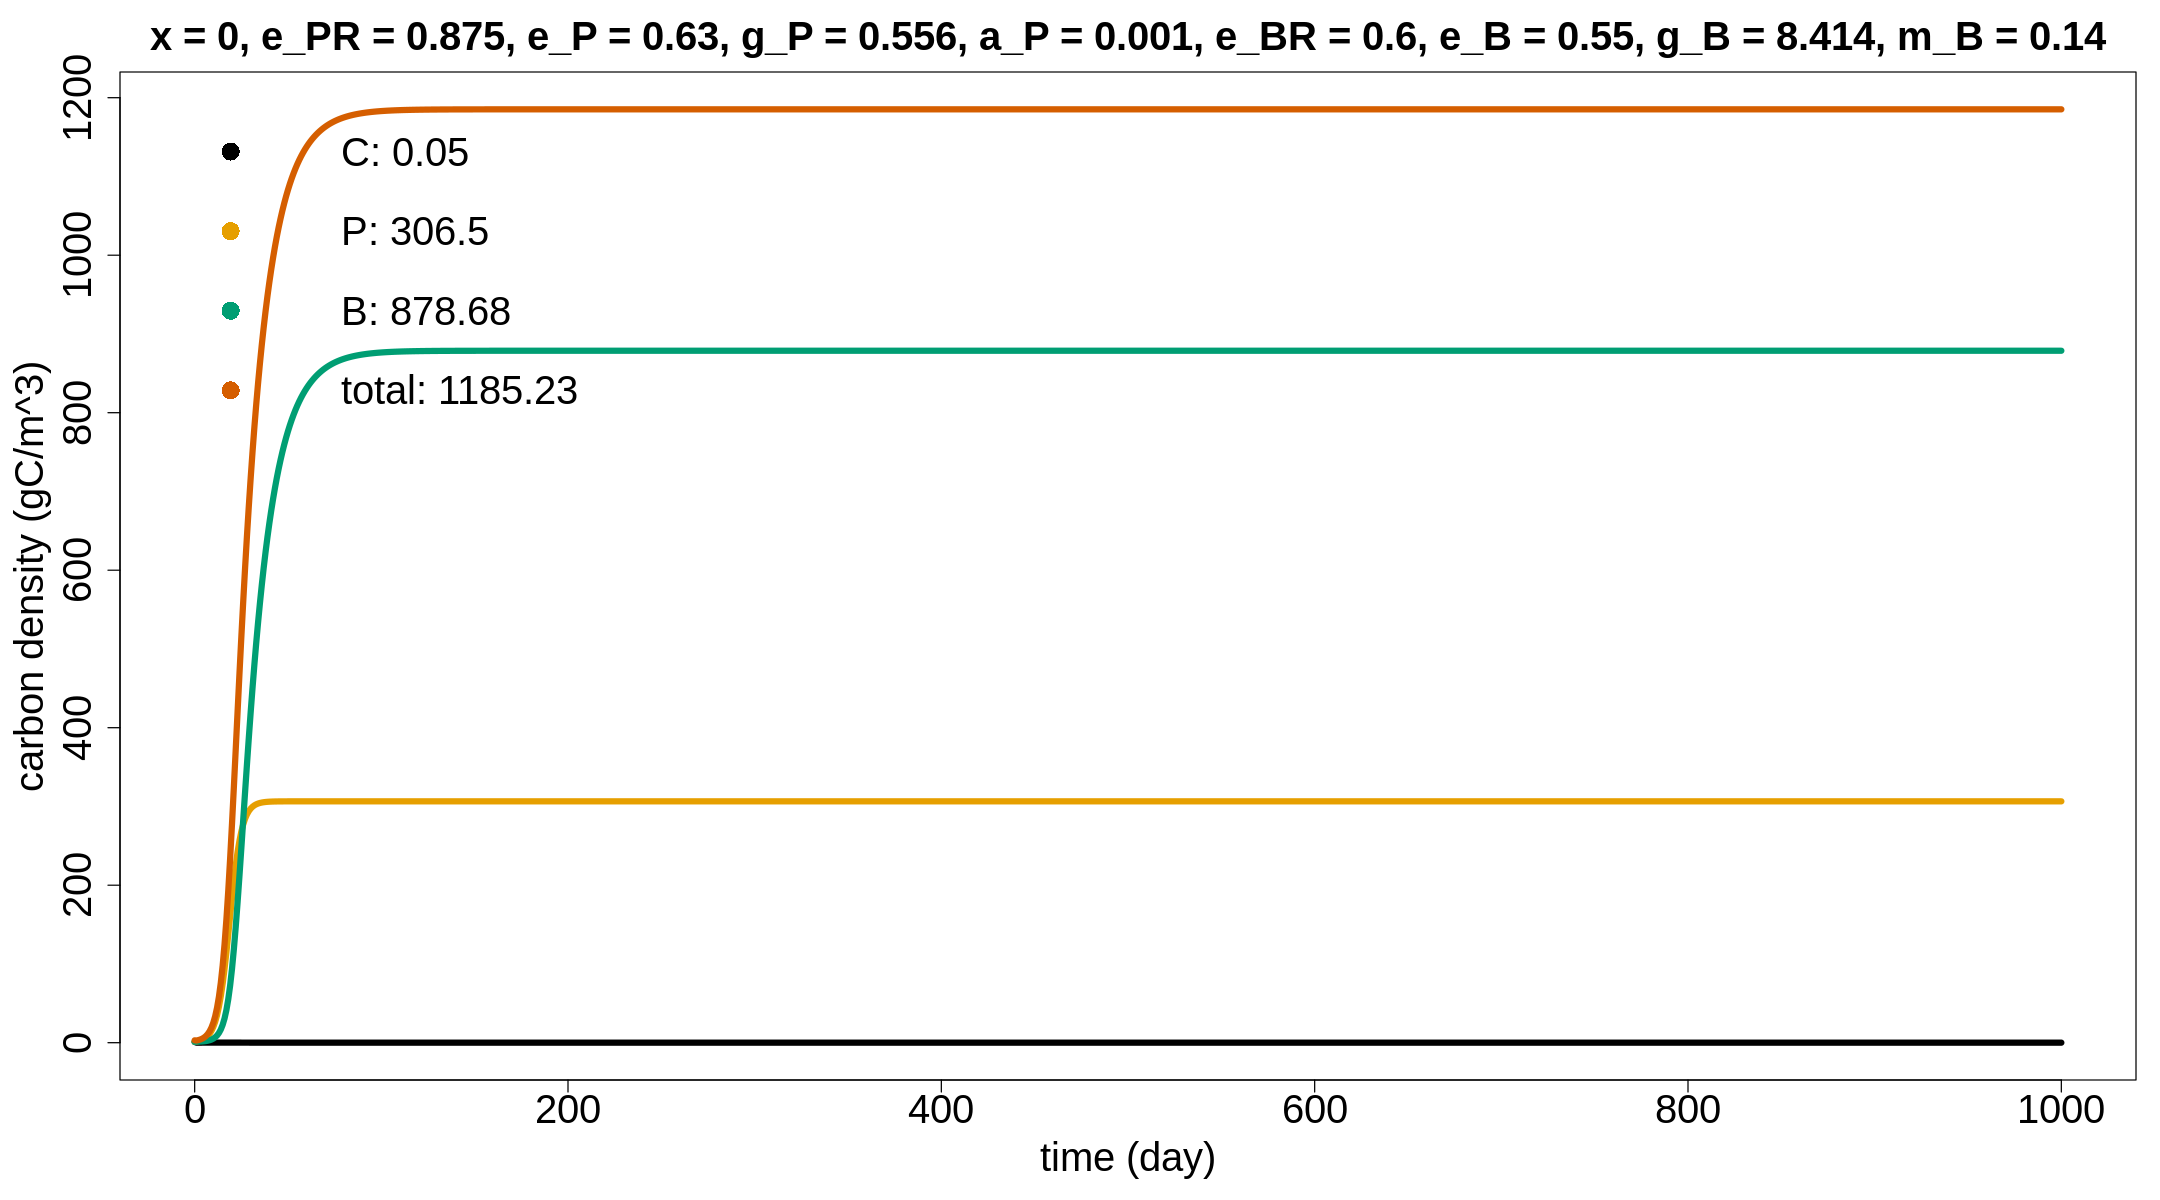

In [11]:
ebcDefault("l","l","h","h")

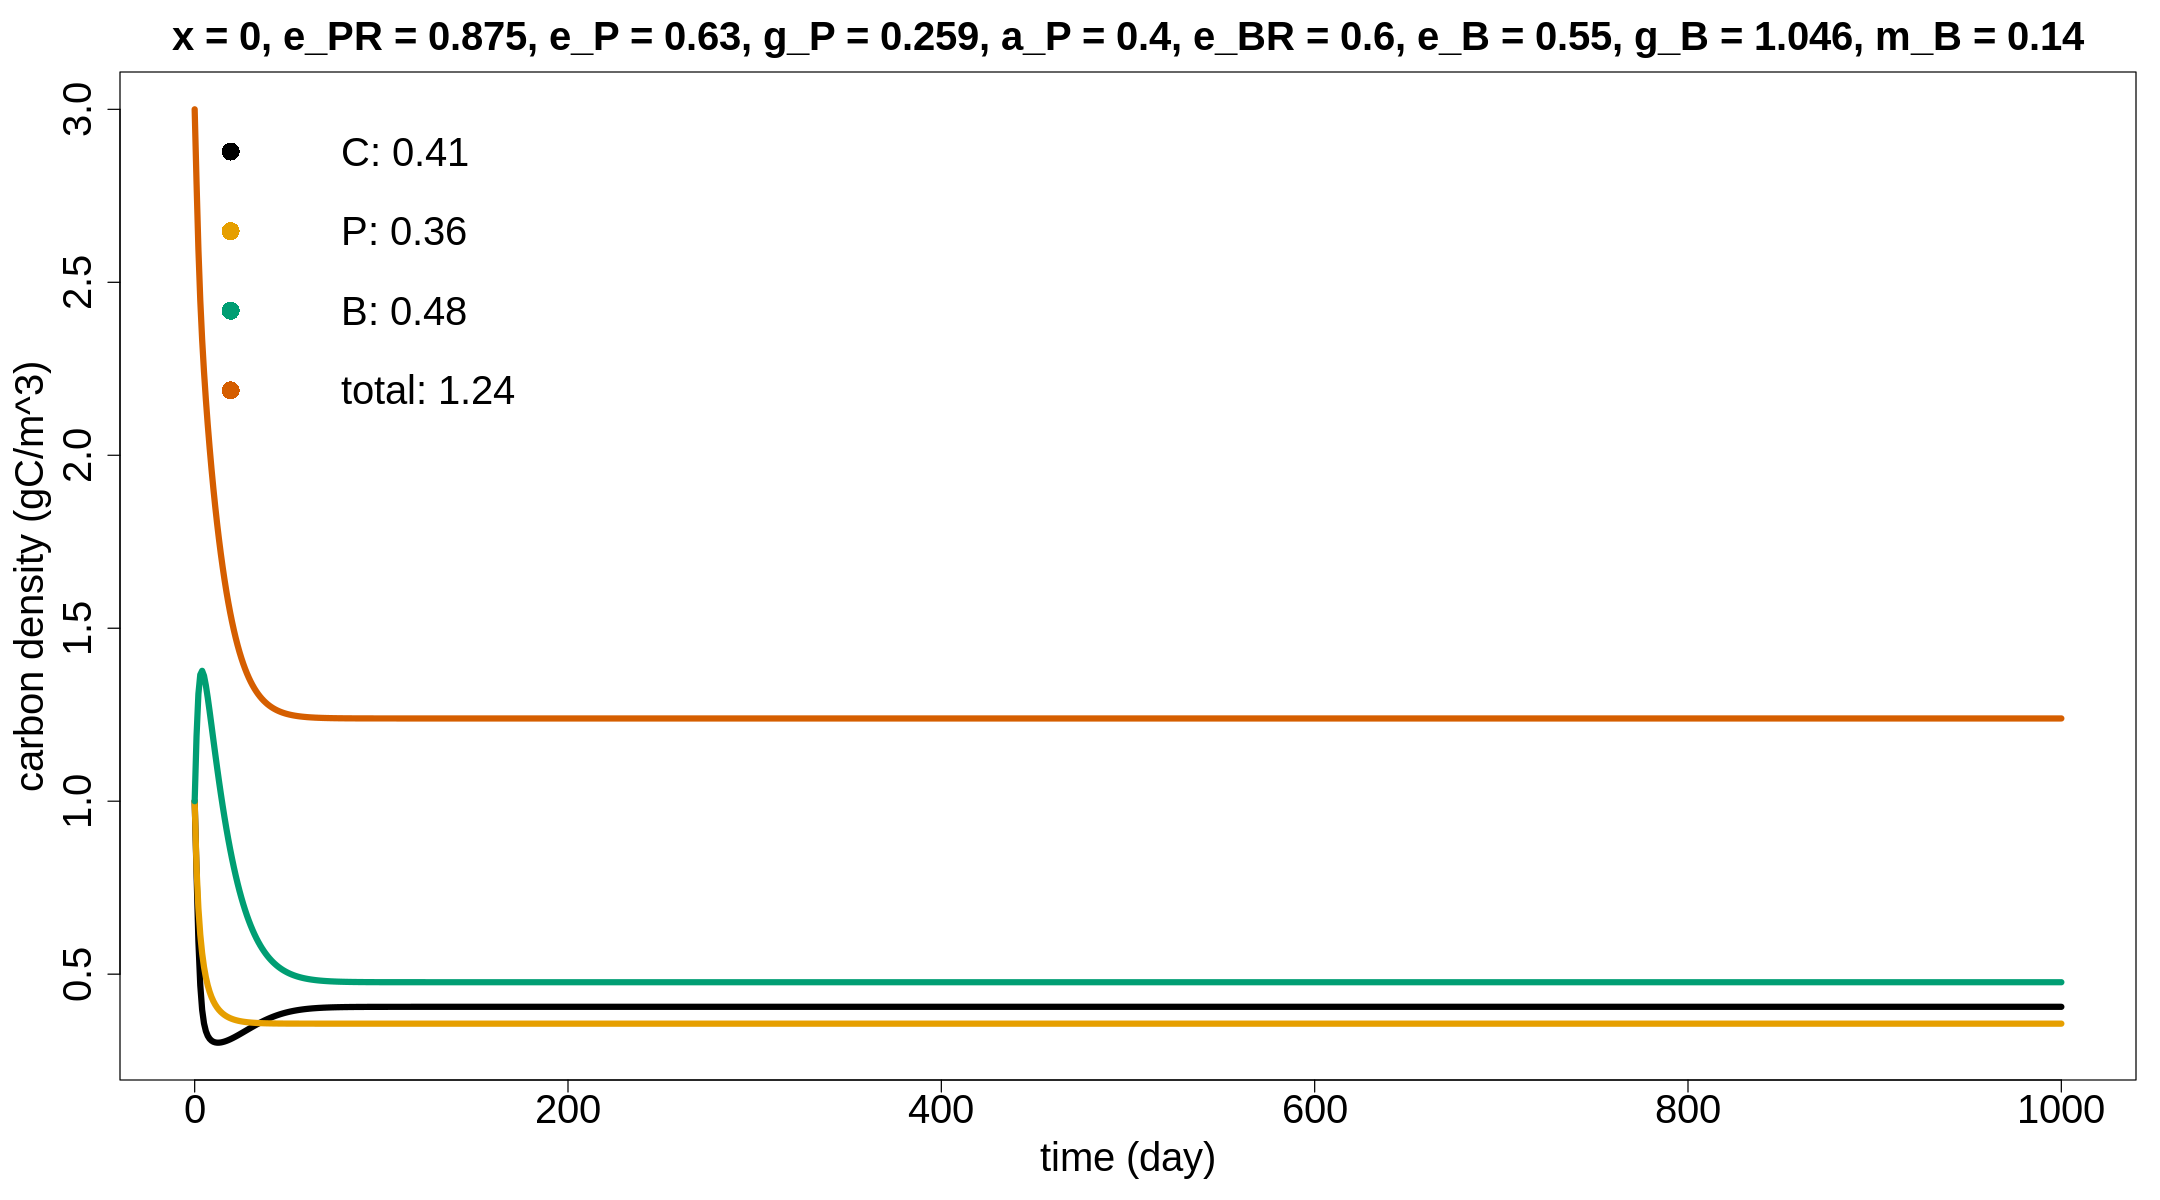

In [12]:
ebcDefault("l","h","l","l")

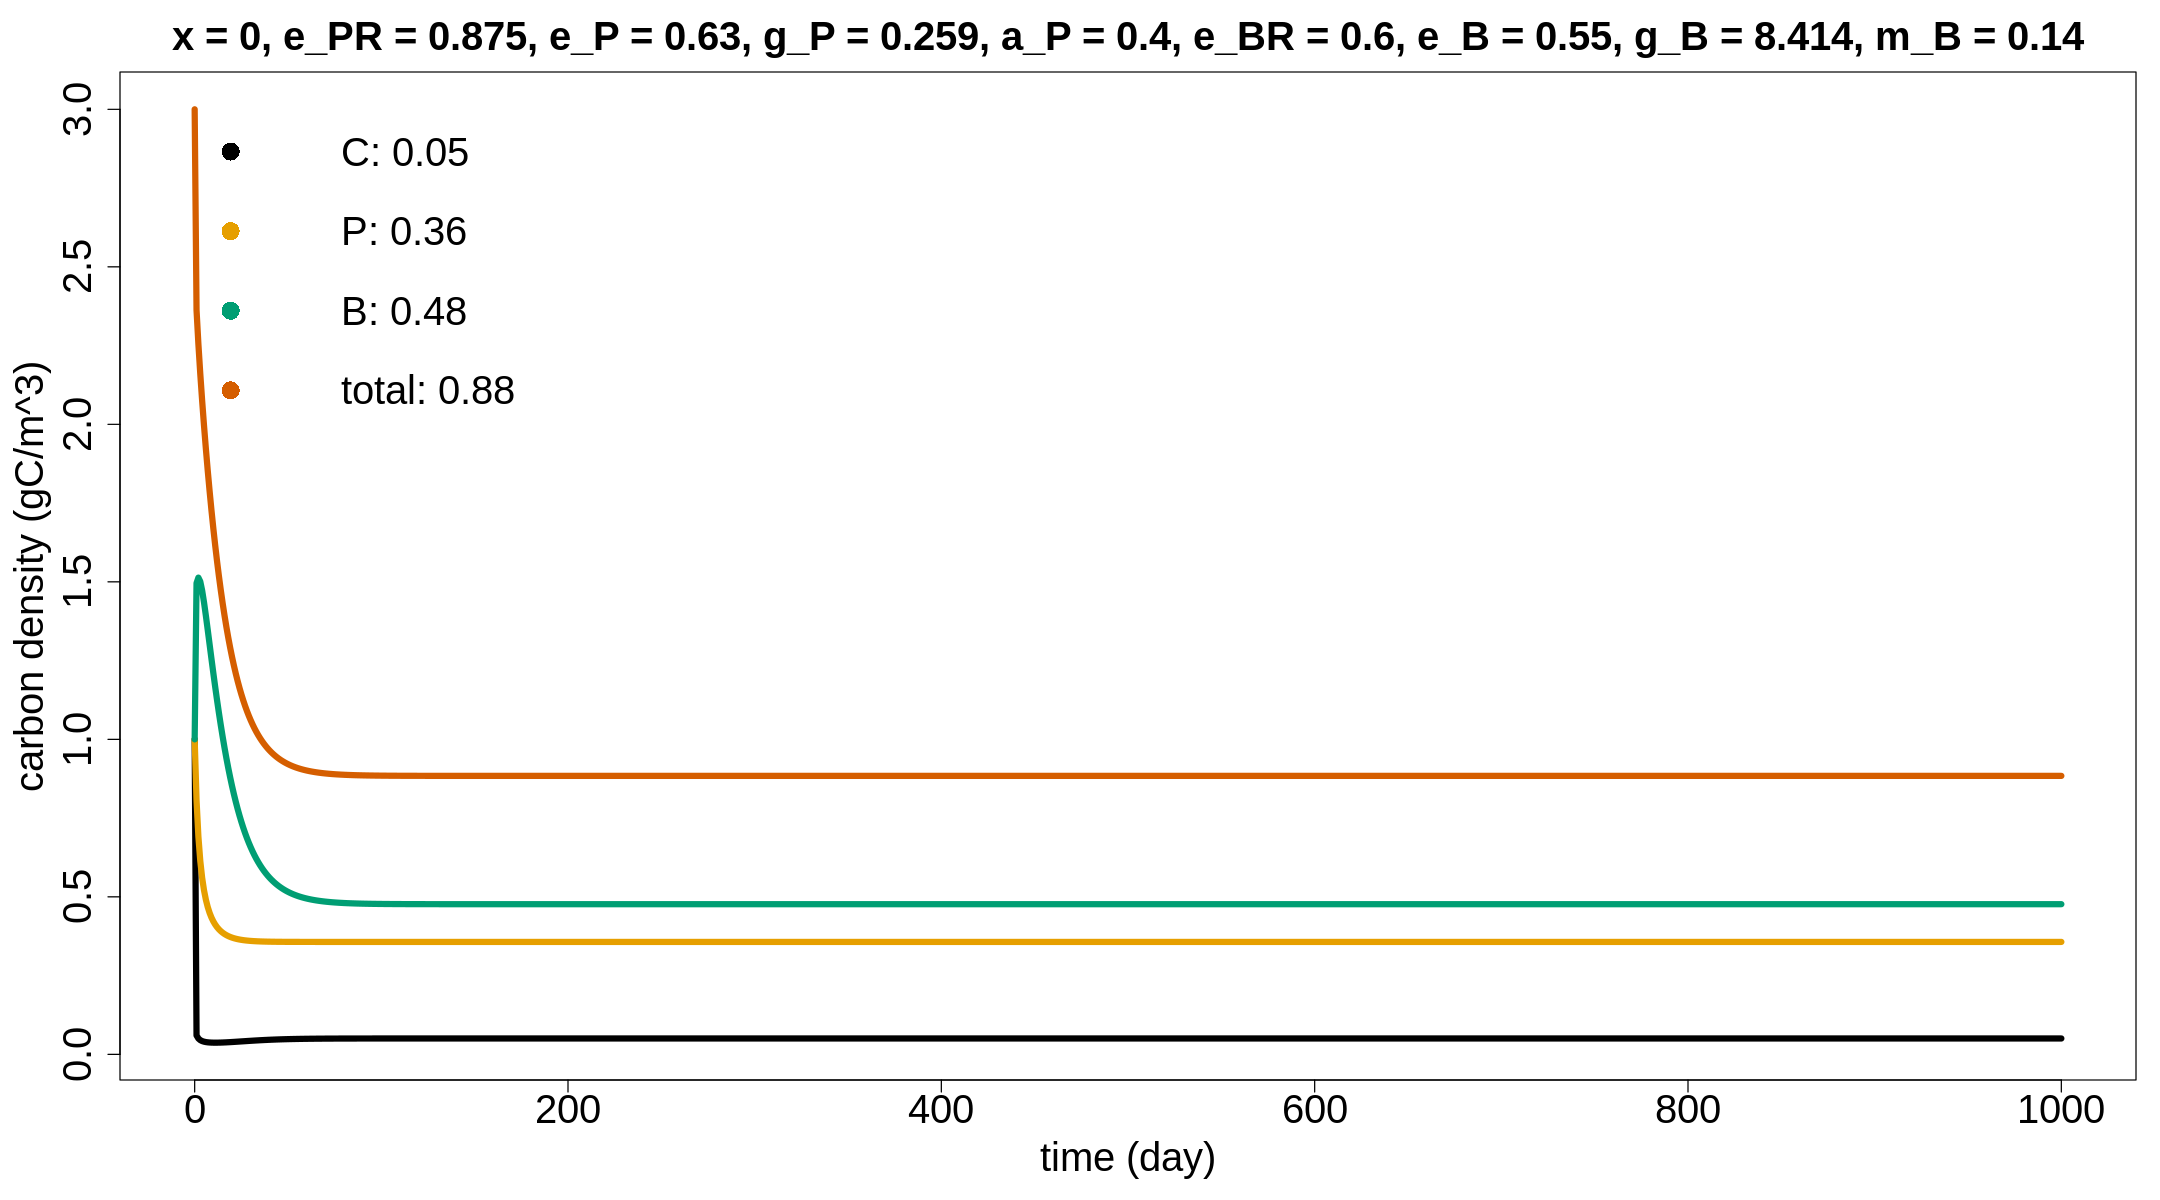

In [13]:
ebcDefault("l","h","l","h")

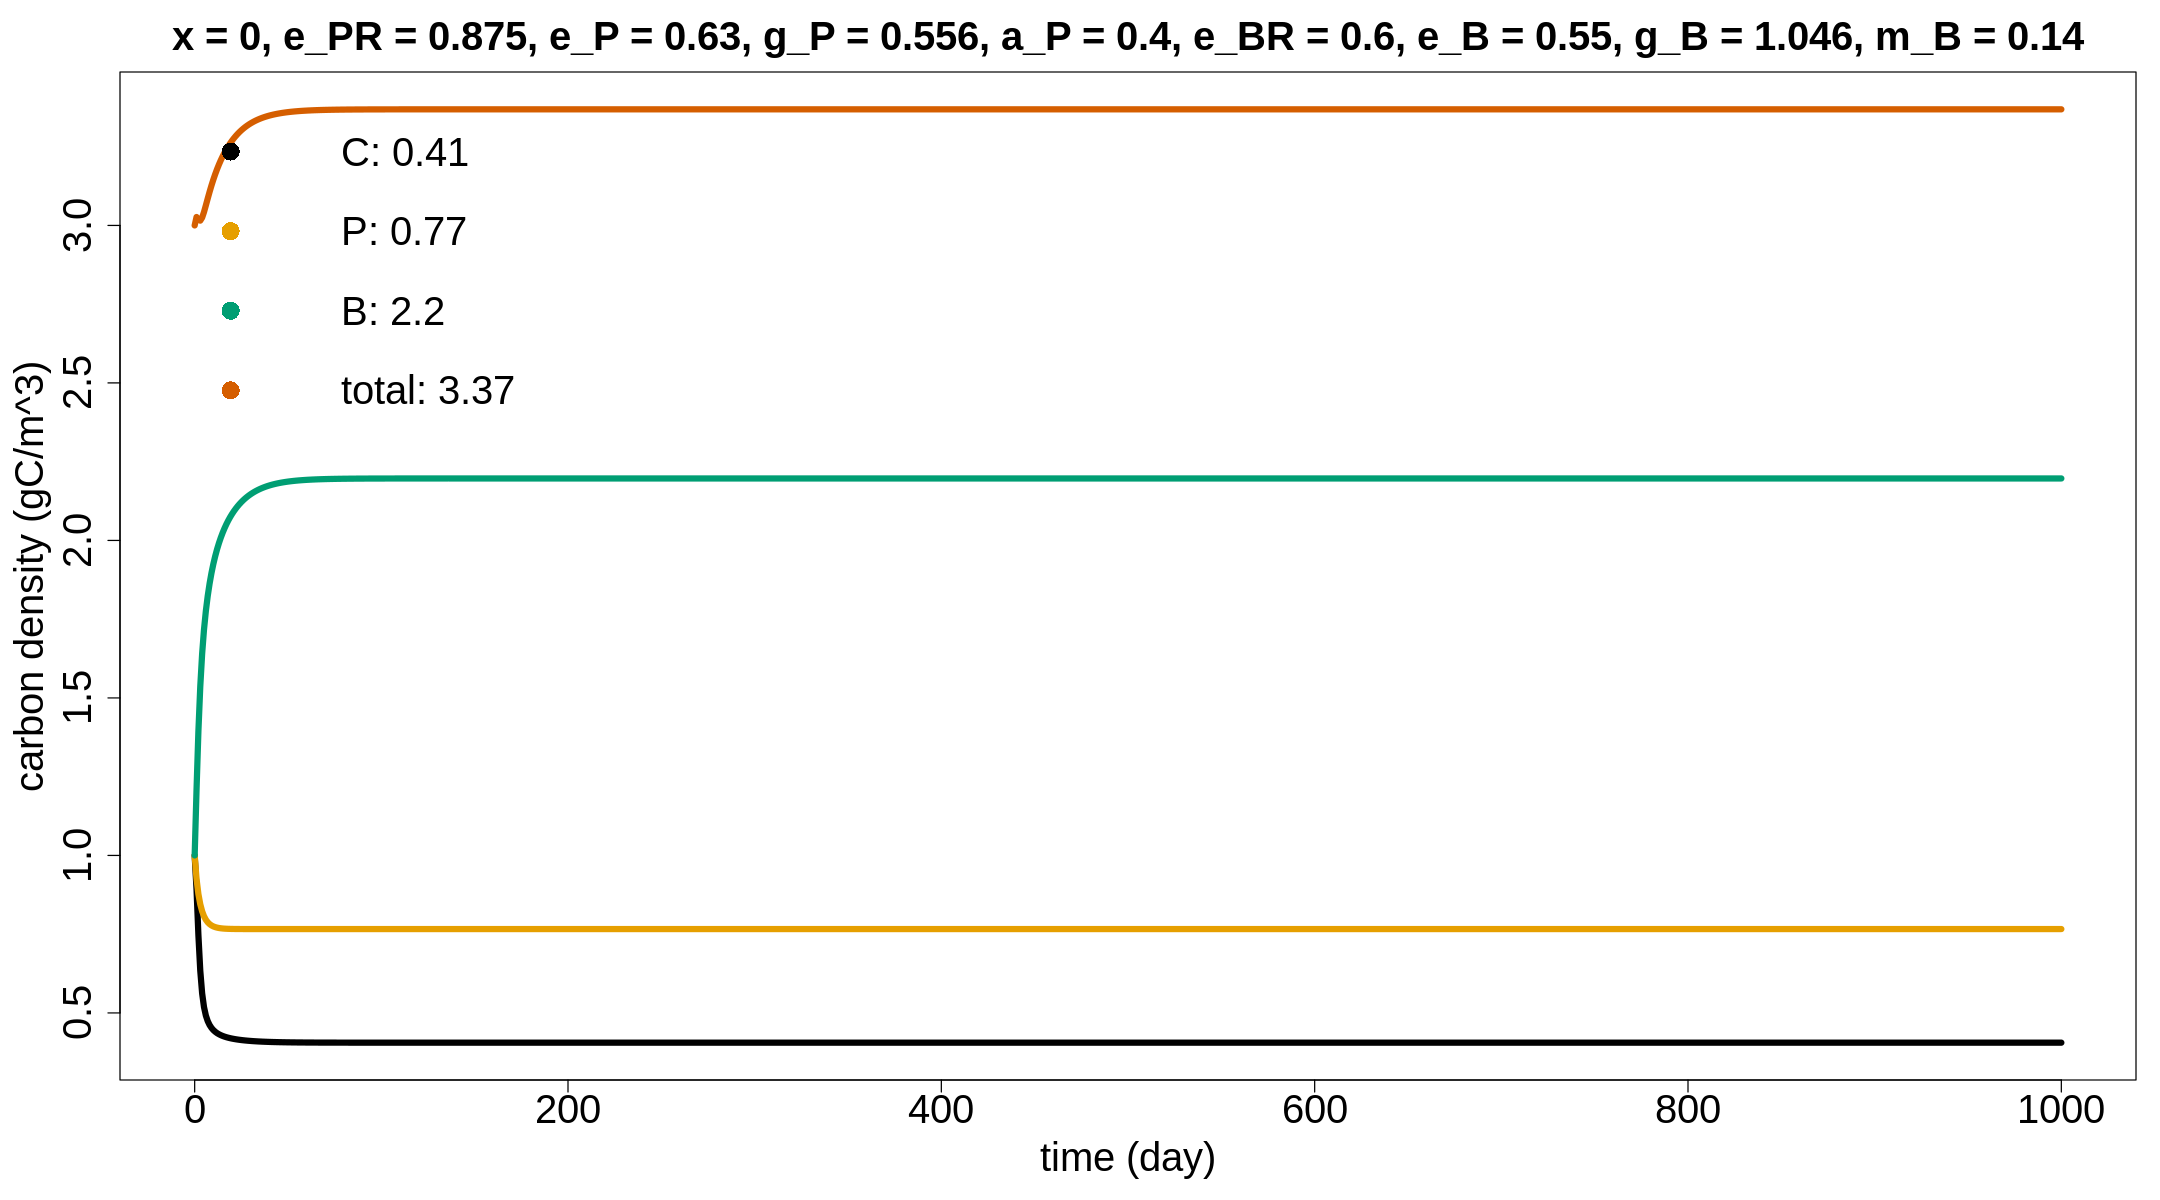

In [14]:
ebcDefault("l","h","h","l")

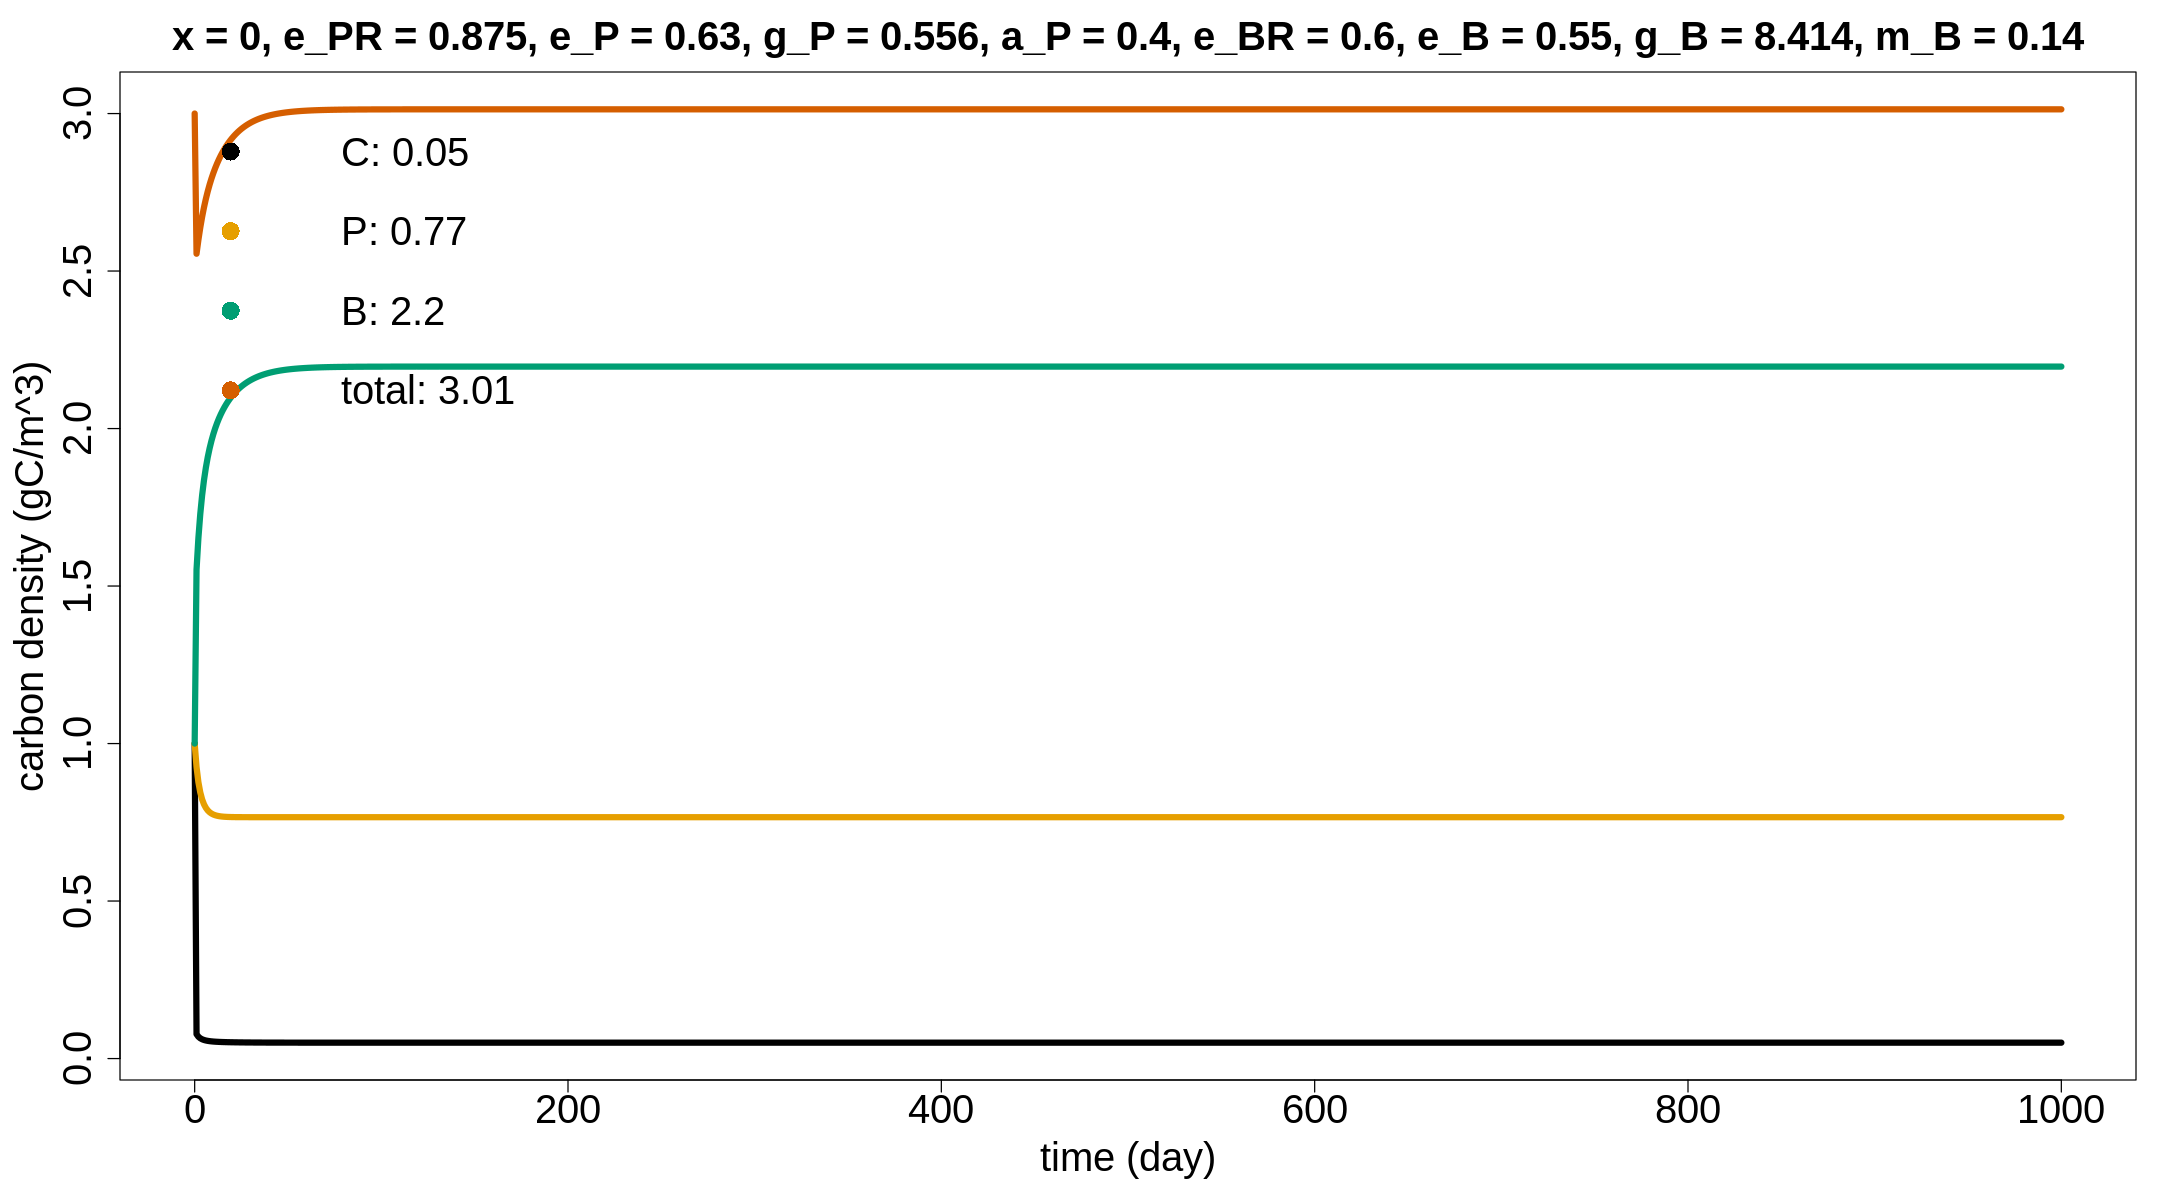

In [15]:
ebcDefault("l","h","h","h")

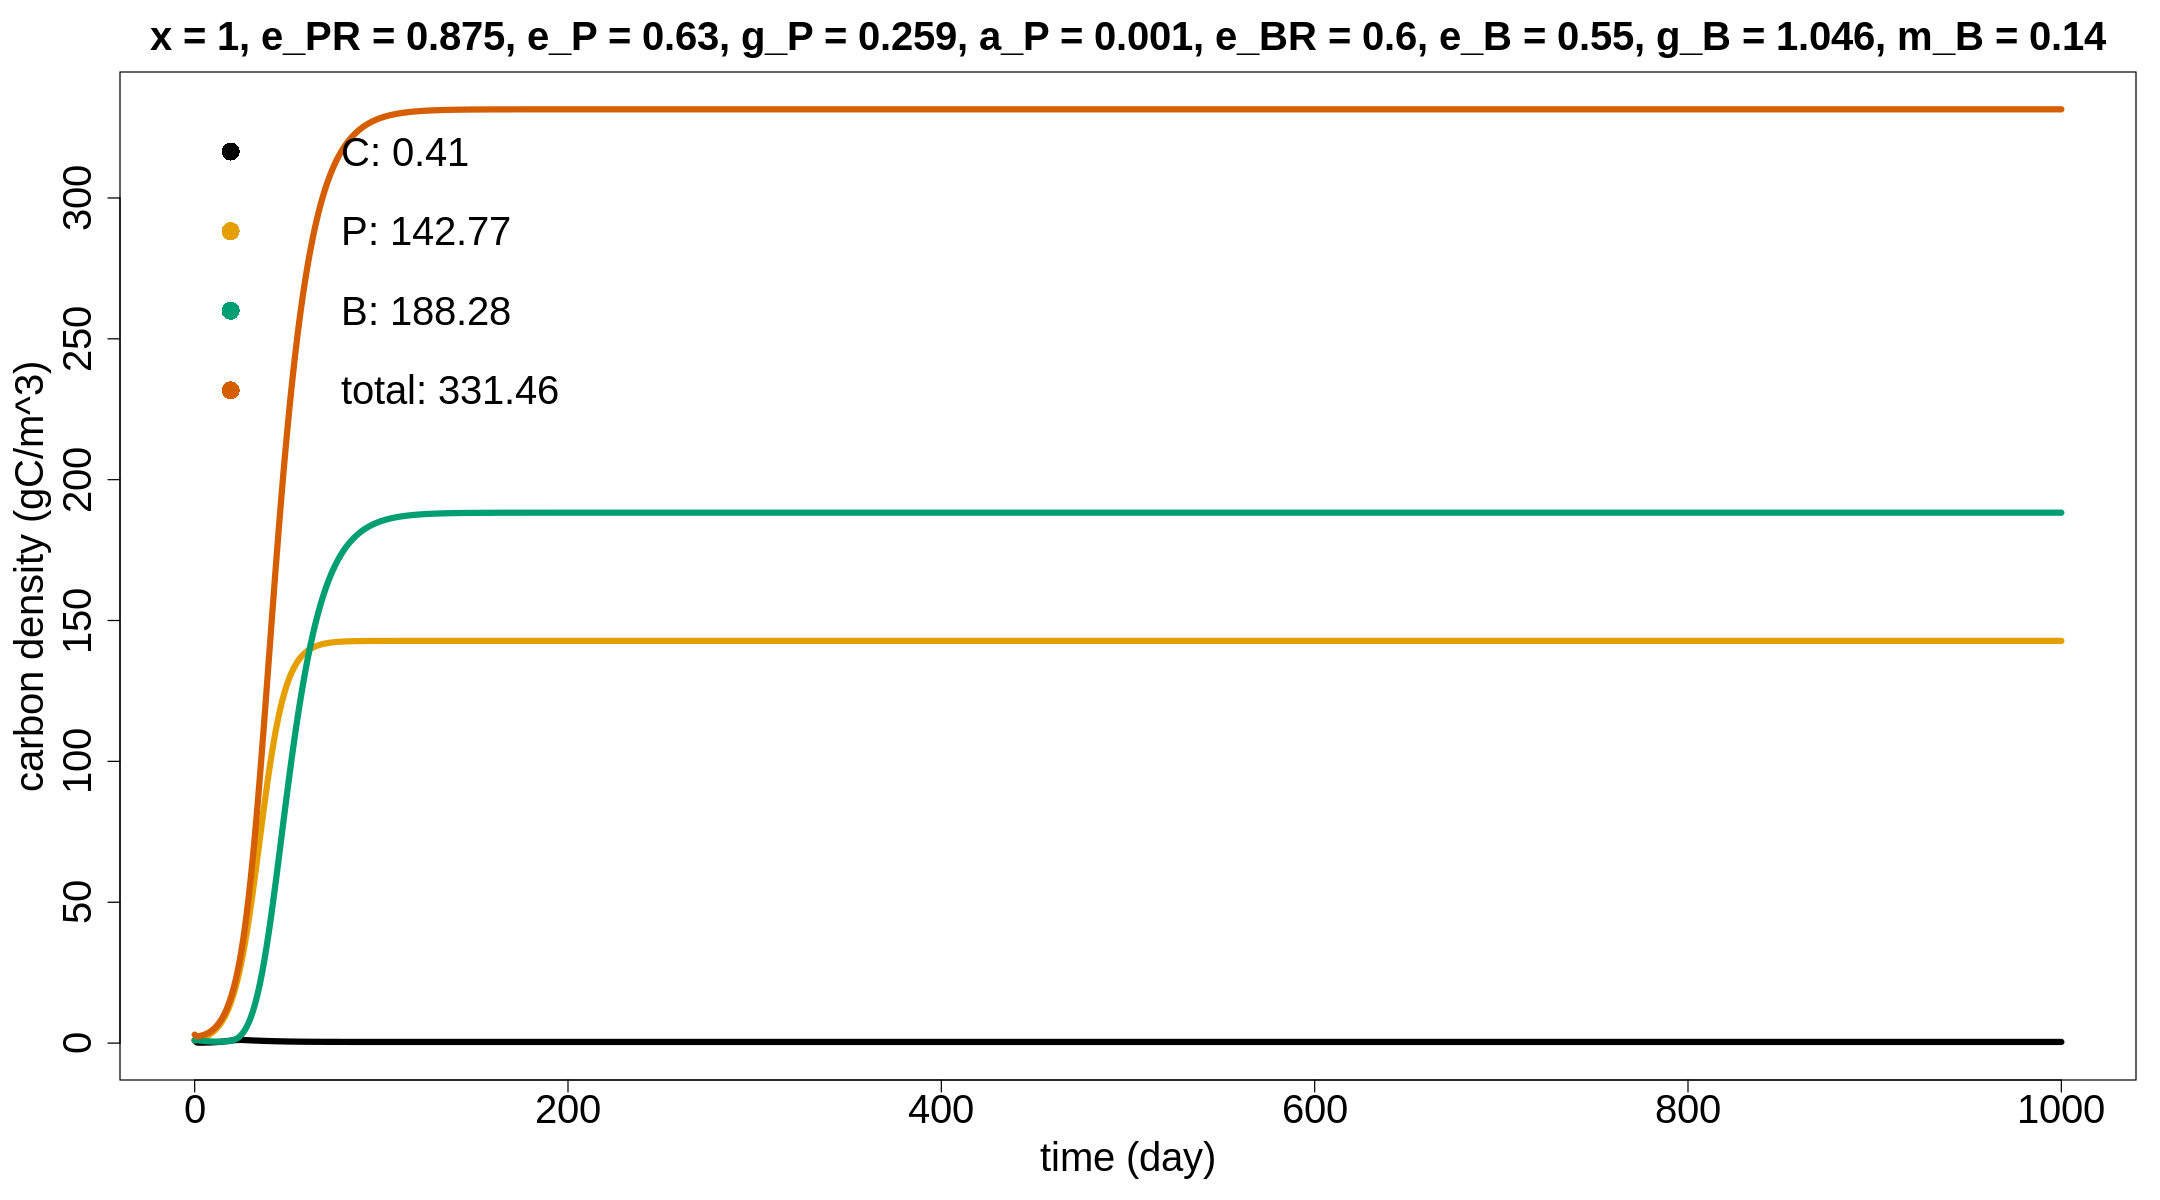

In [16]:
ebcDefault("h","l","l","l")

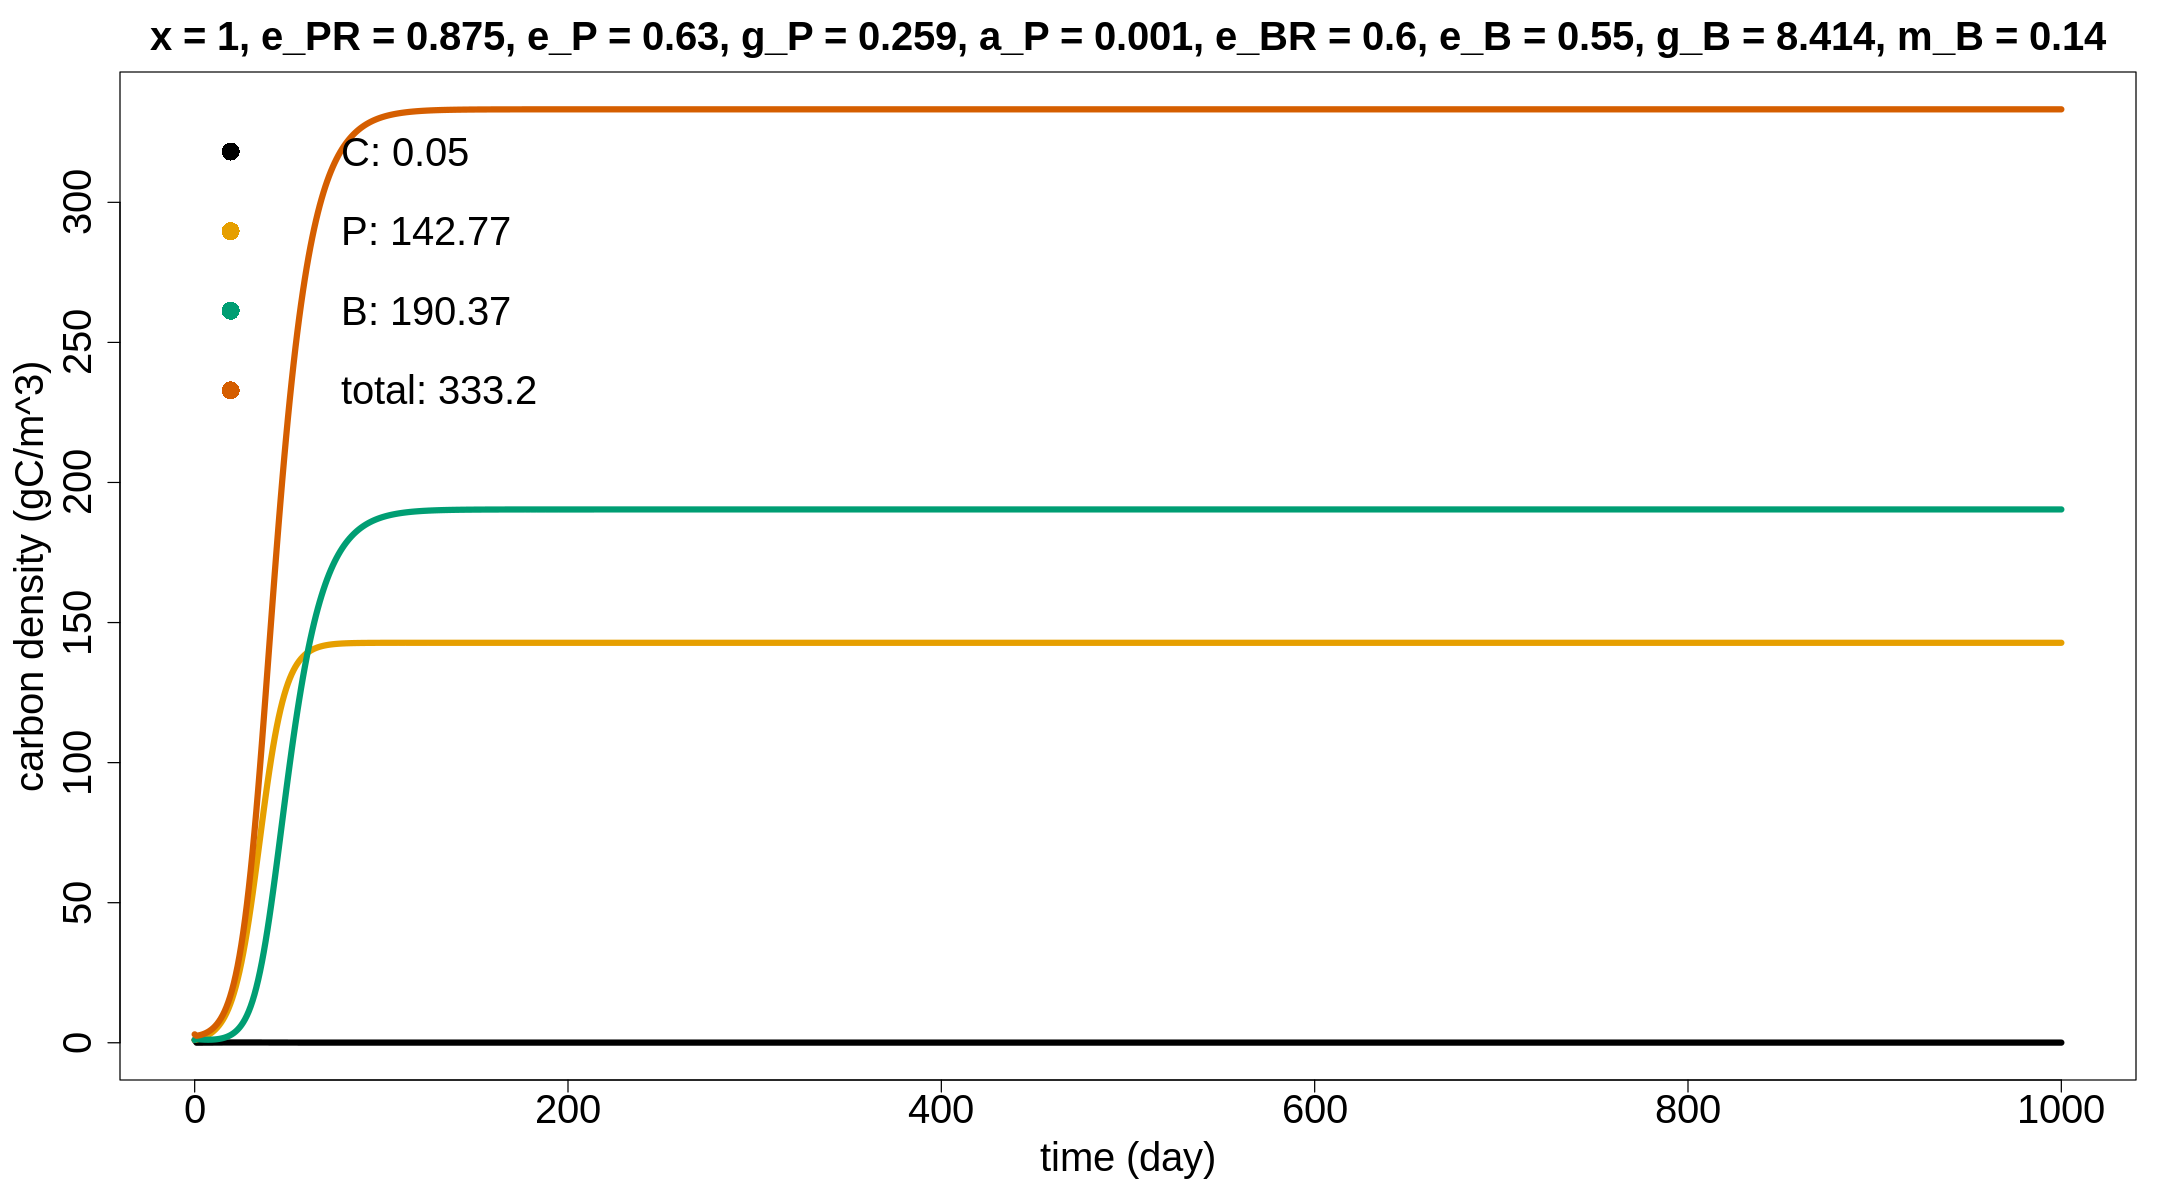

In [17]:
ebcDefault("h","l","l","h")

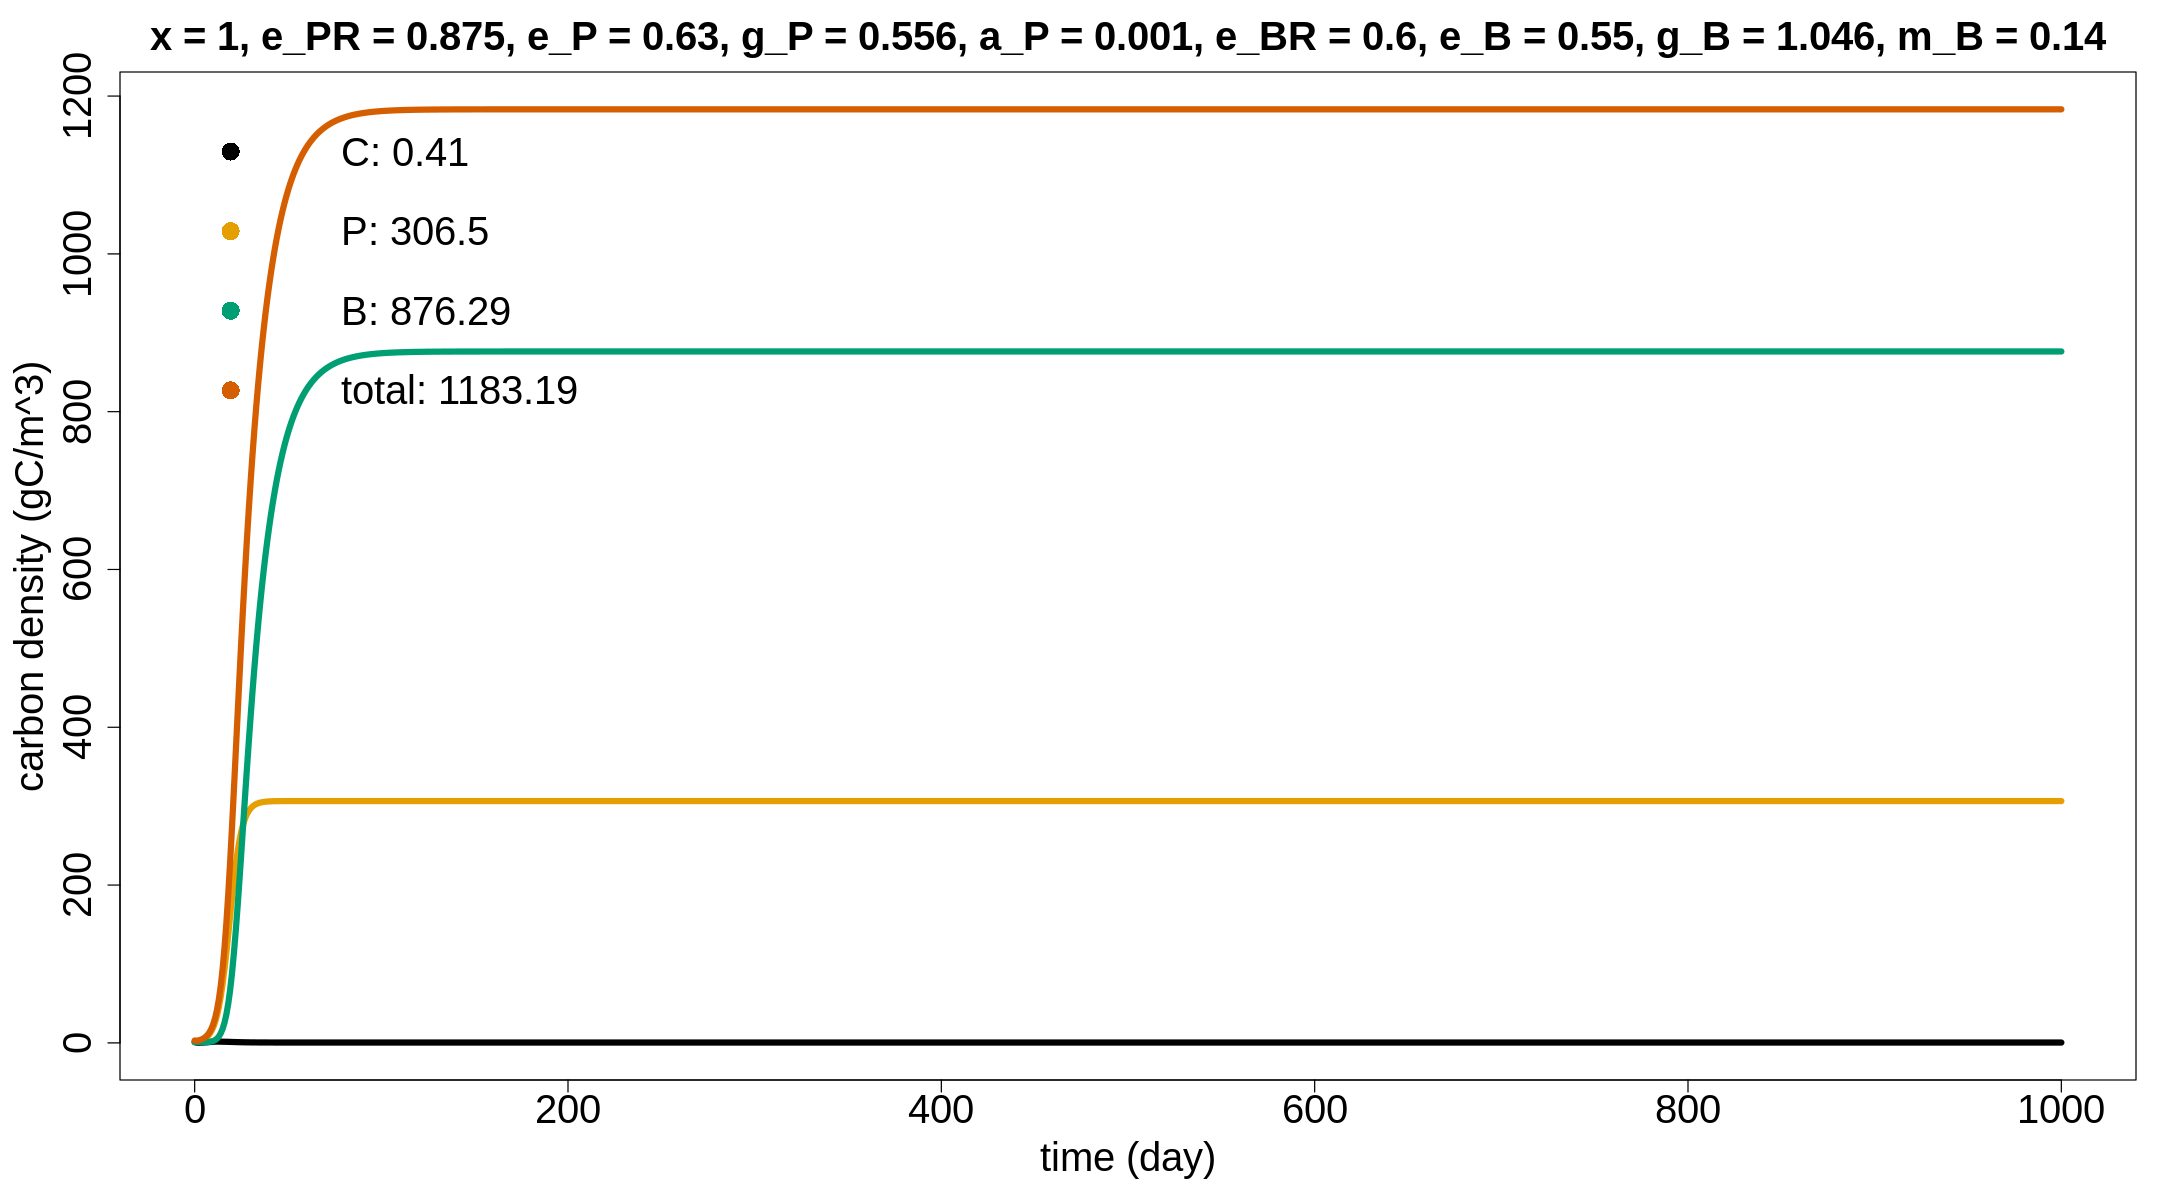

In [18]:
ebcDefault("h","l","h","l")

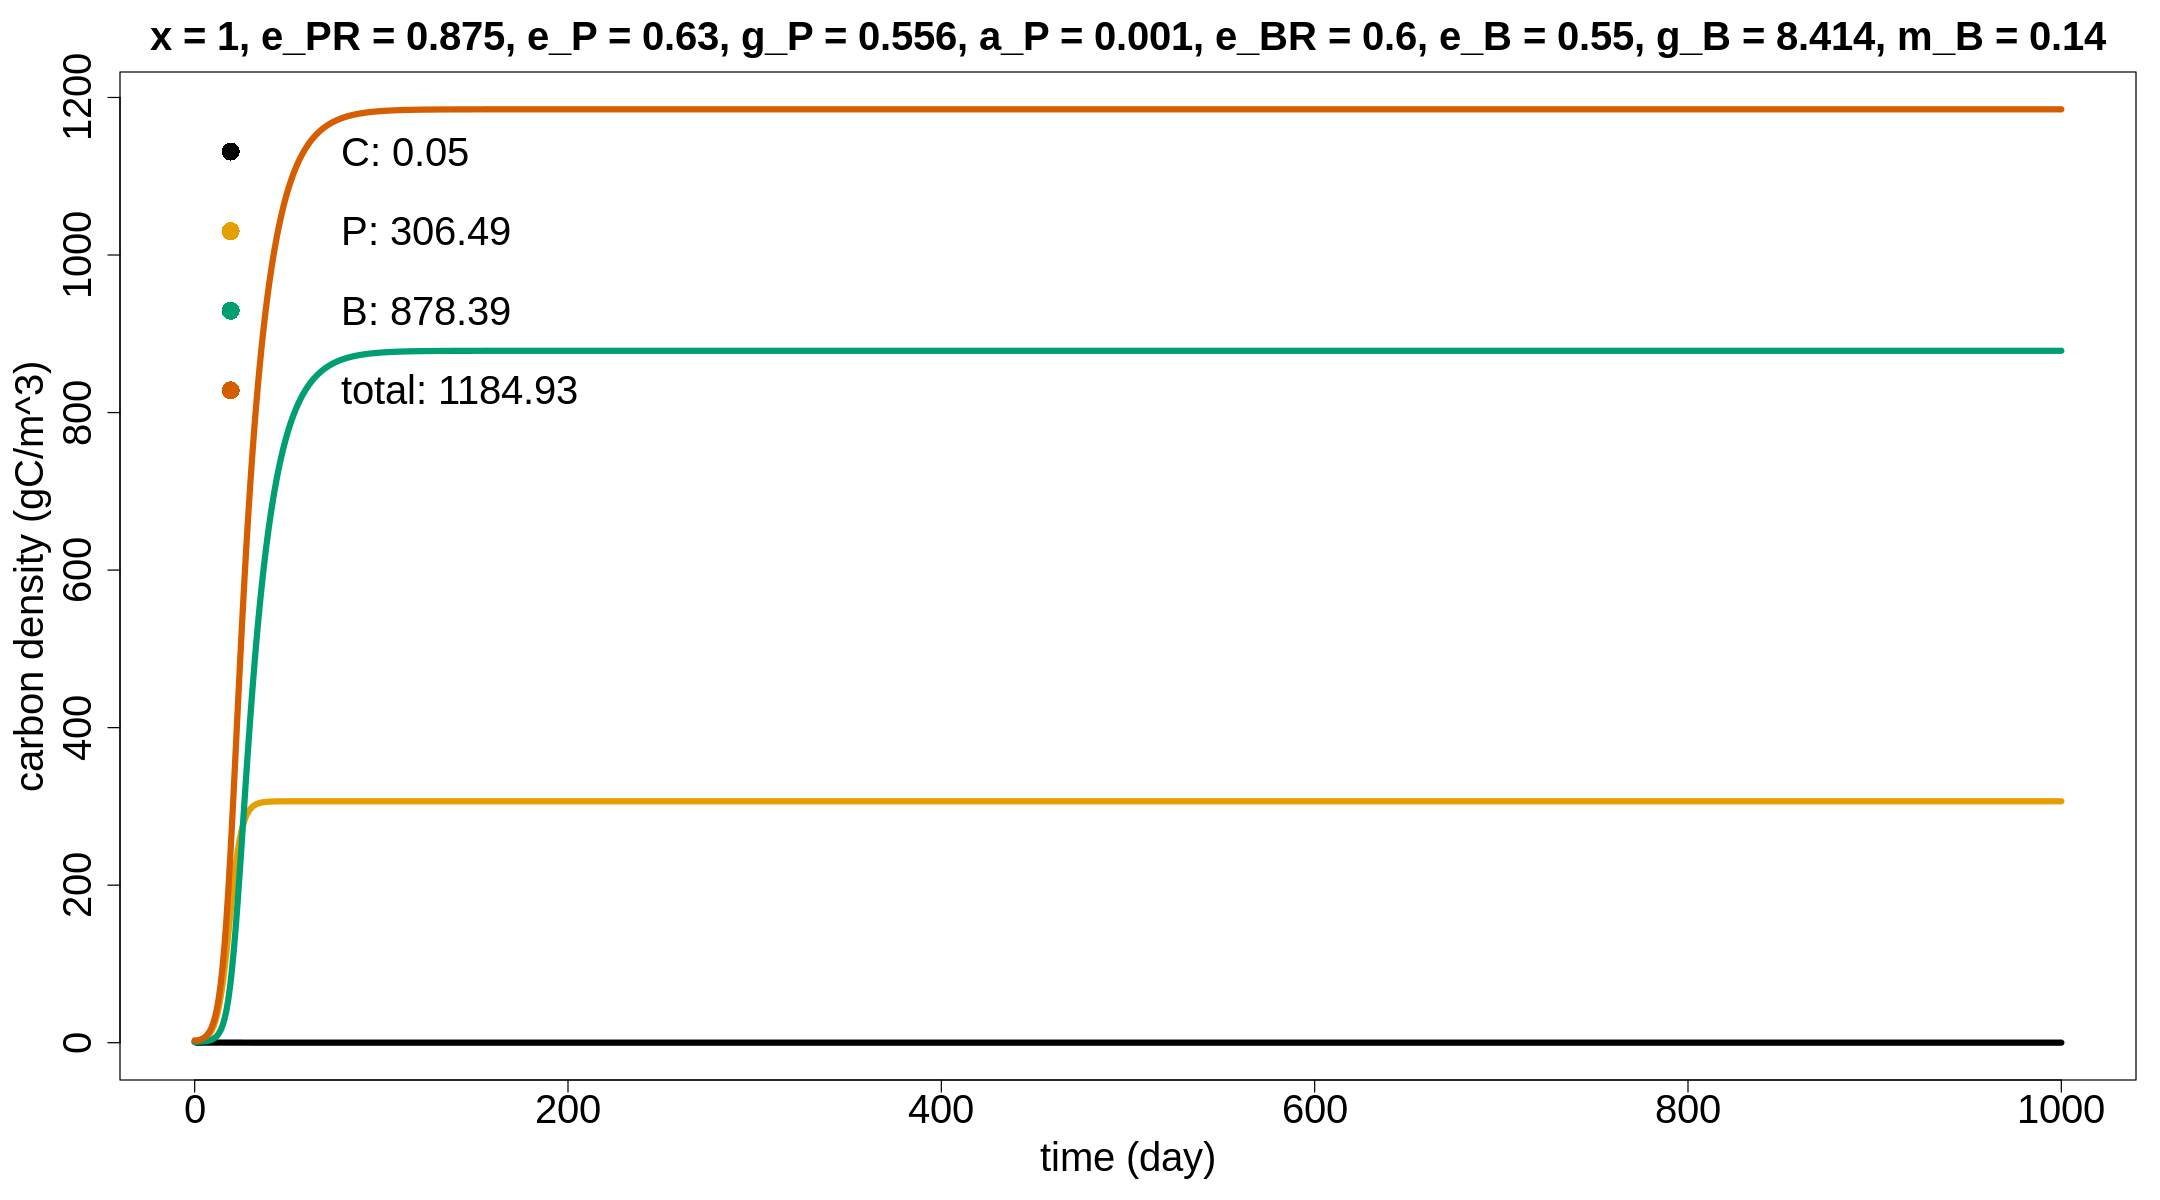

In [19]:
ebcDefault("h","l","h","h")

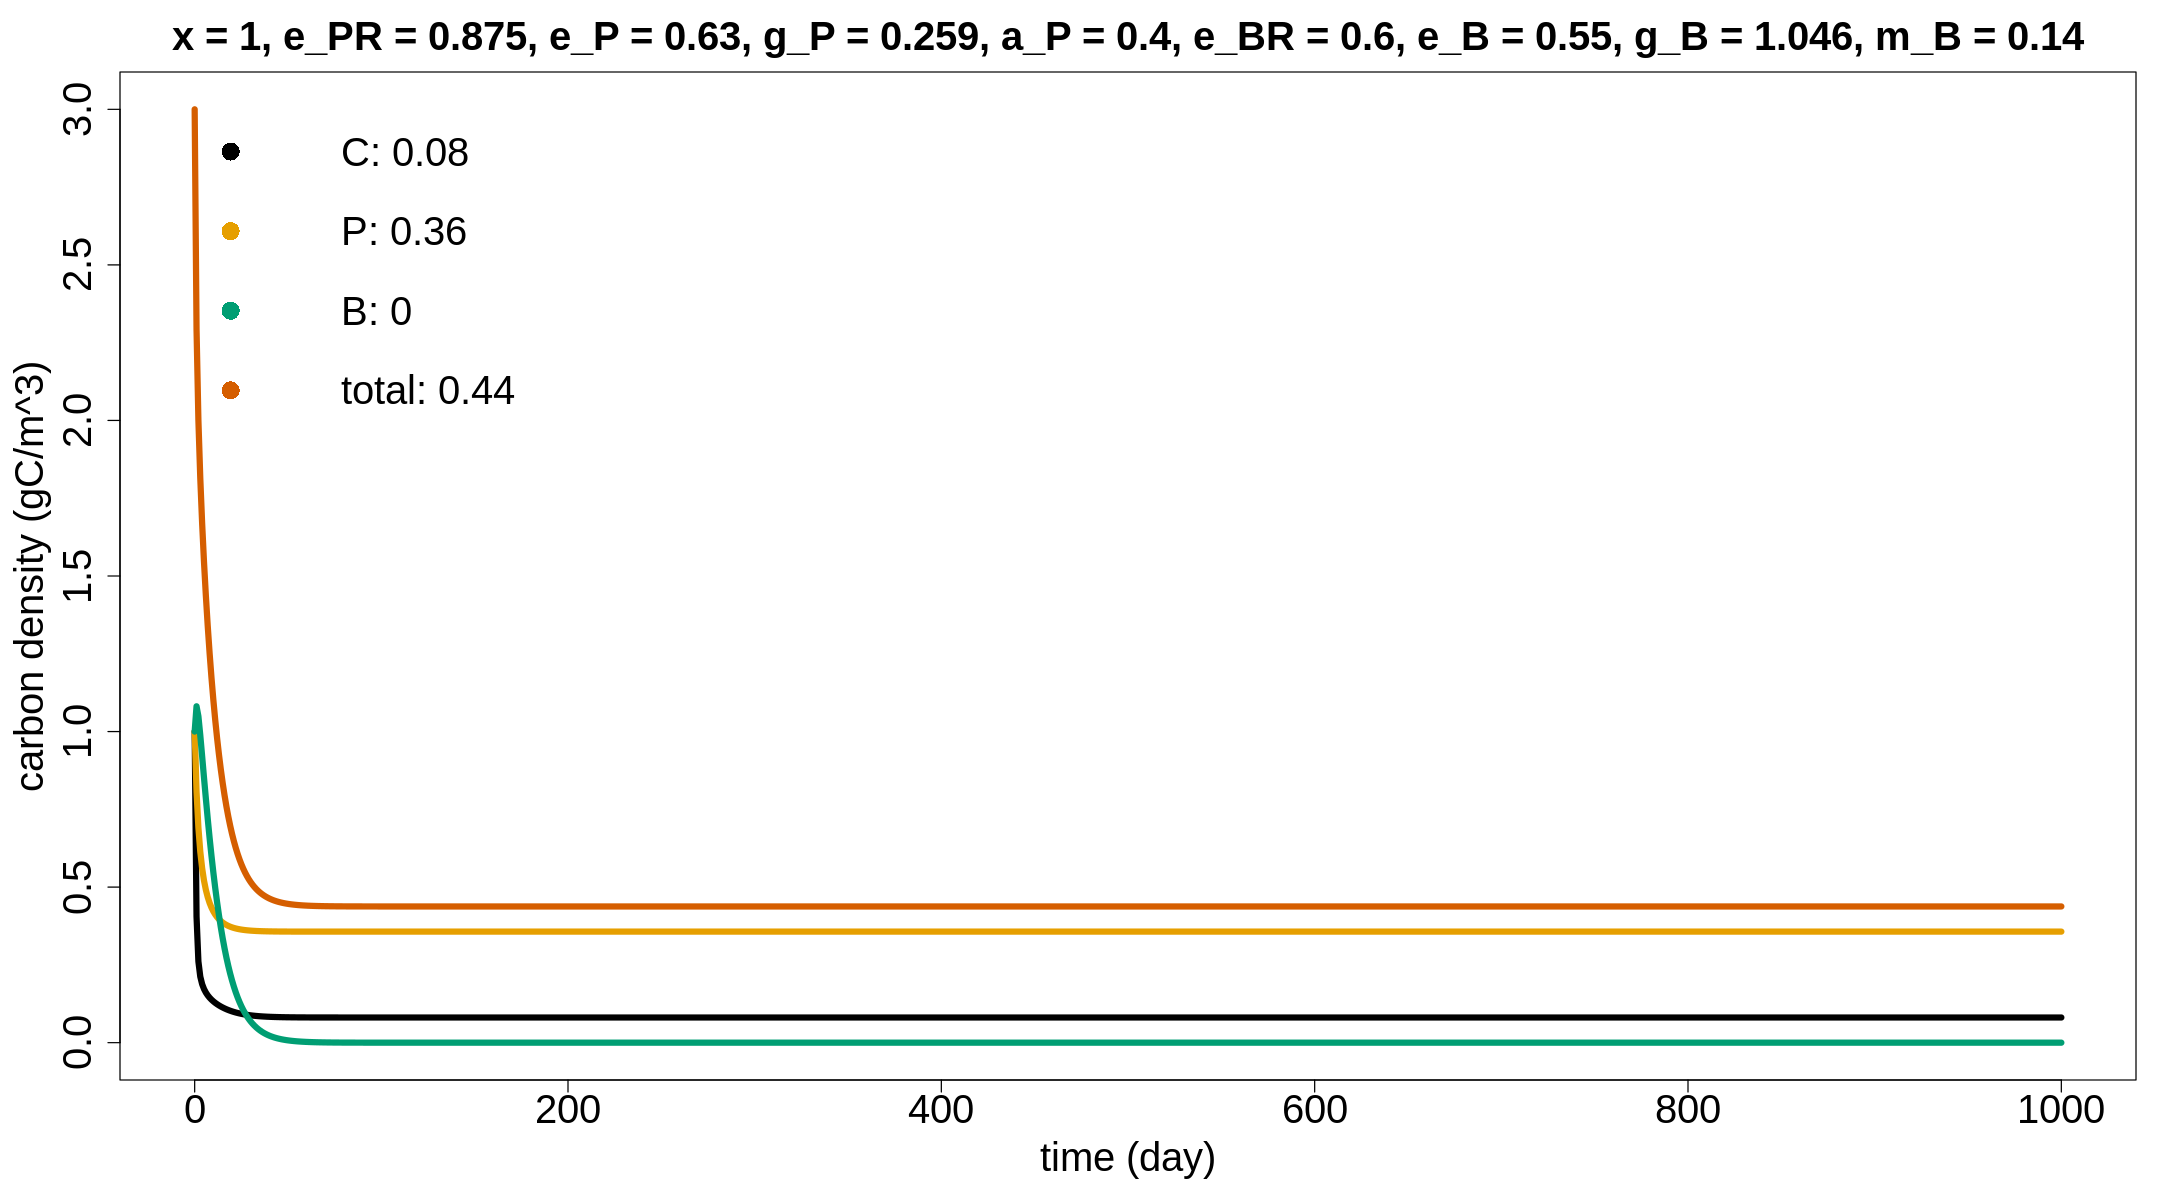

In [20]:
ebcDefault("h","h","l","l")

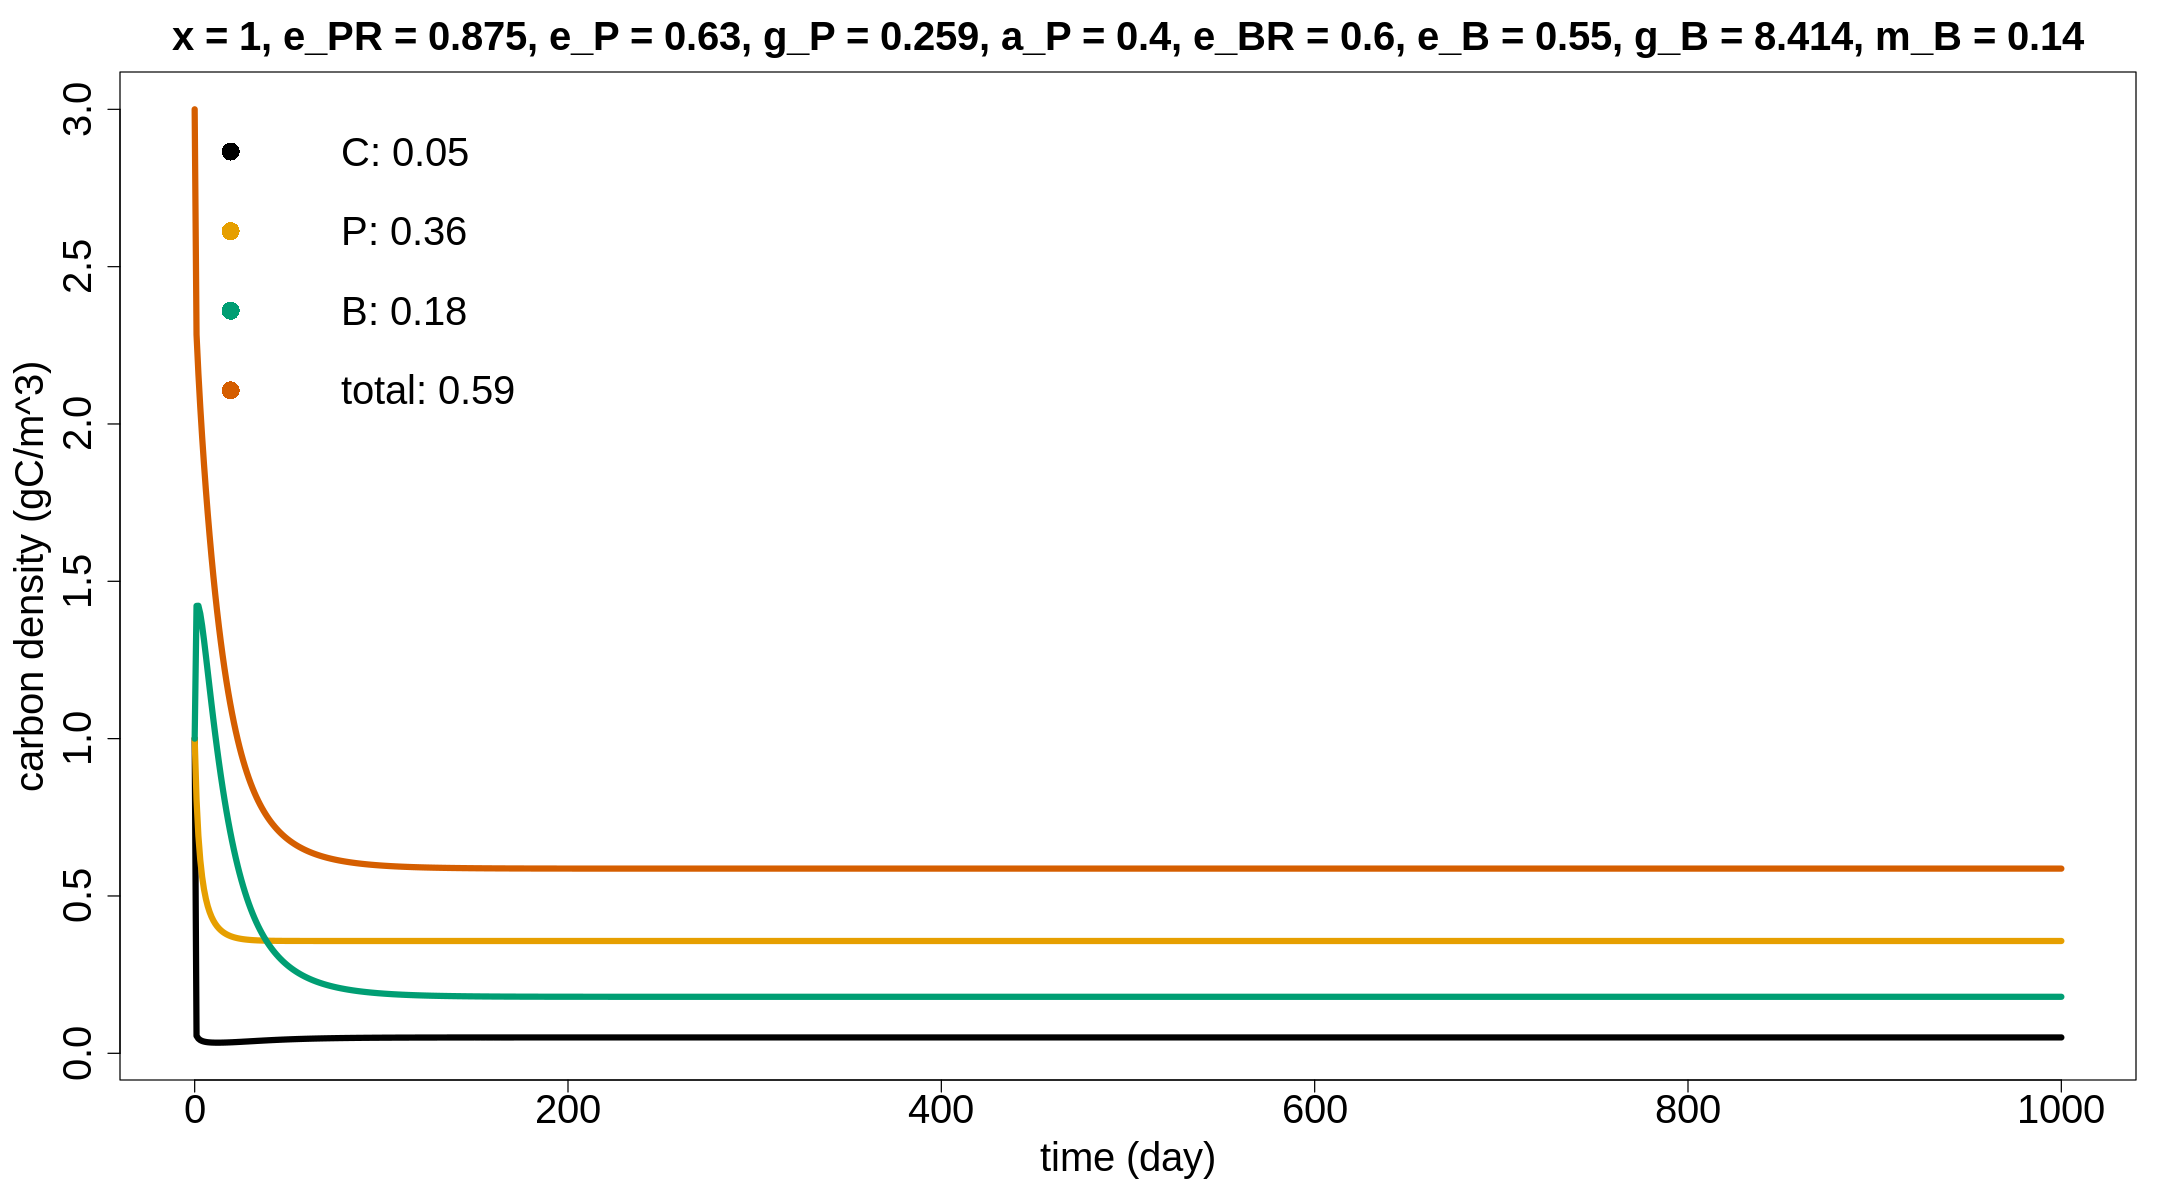

In [21]:
ebcDefault("h","h","l","h")

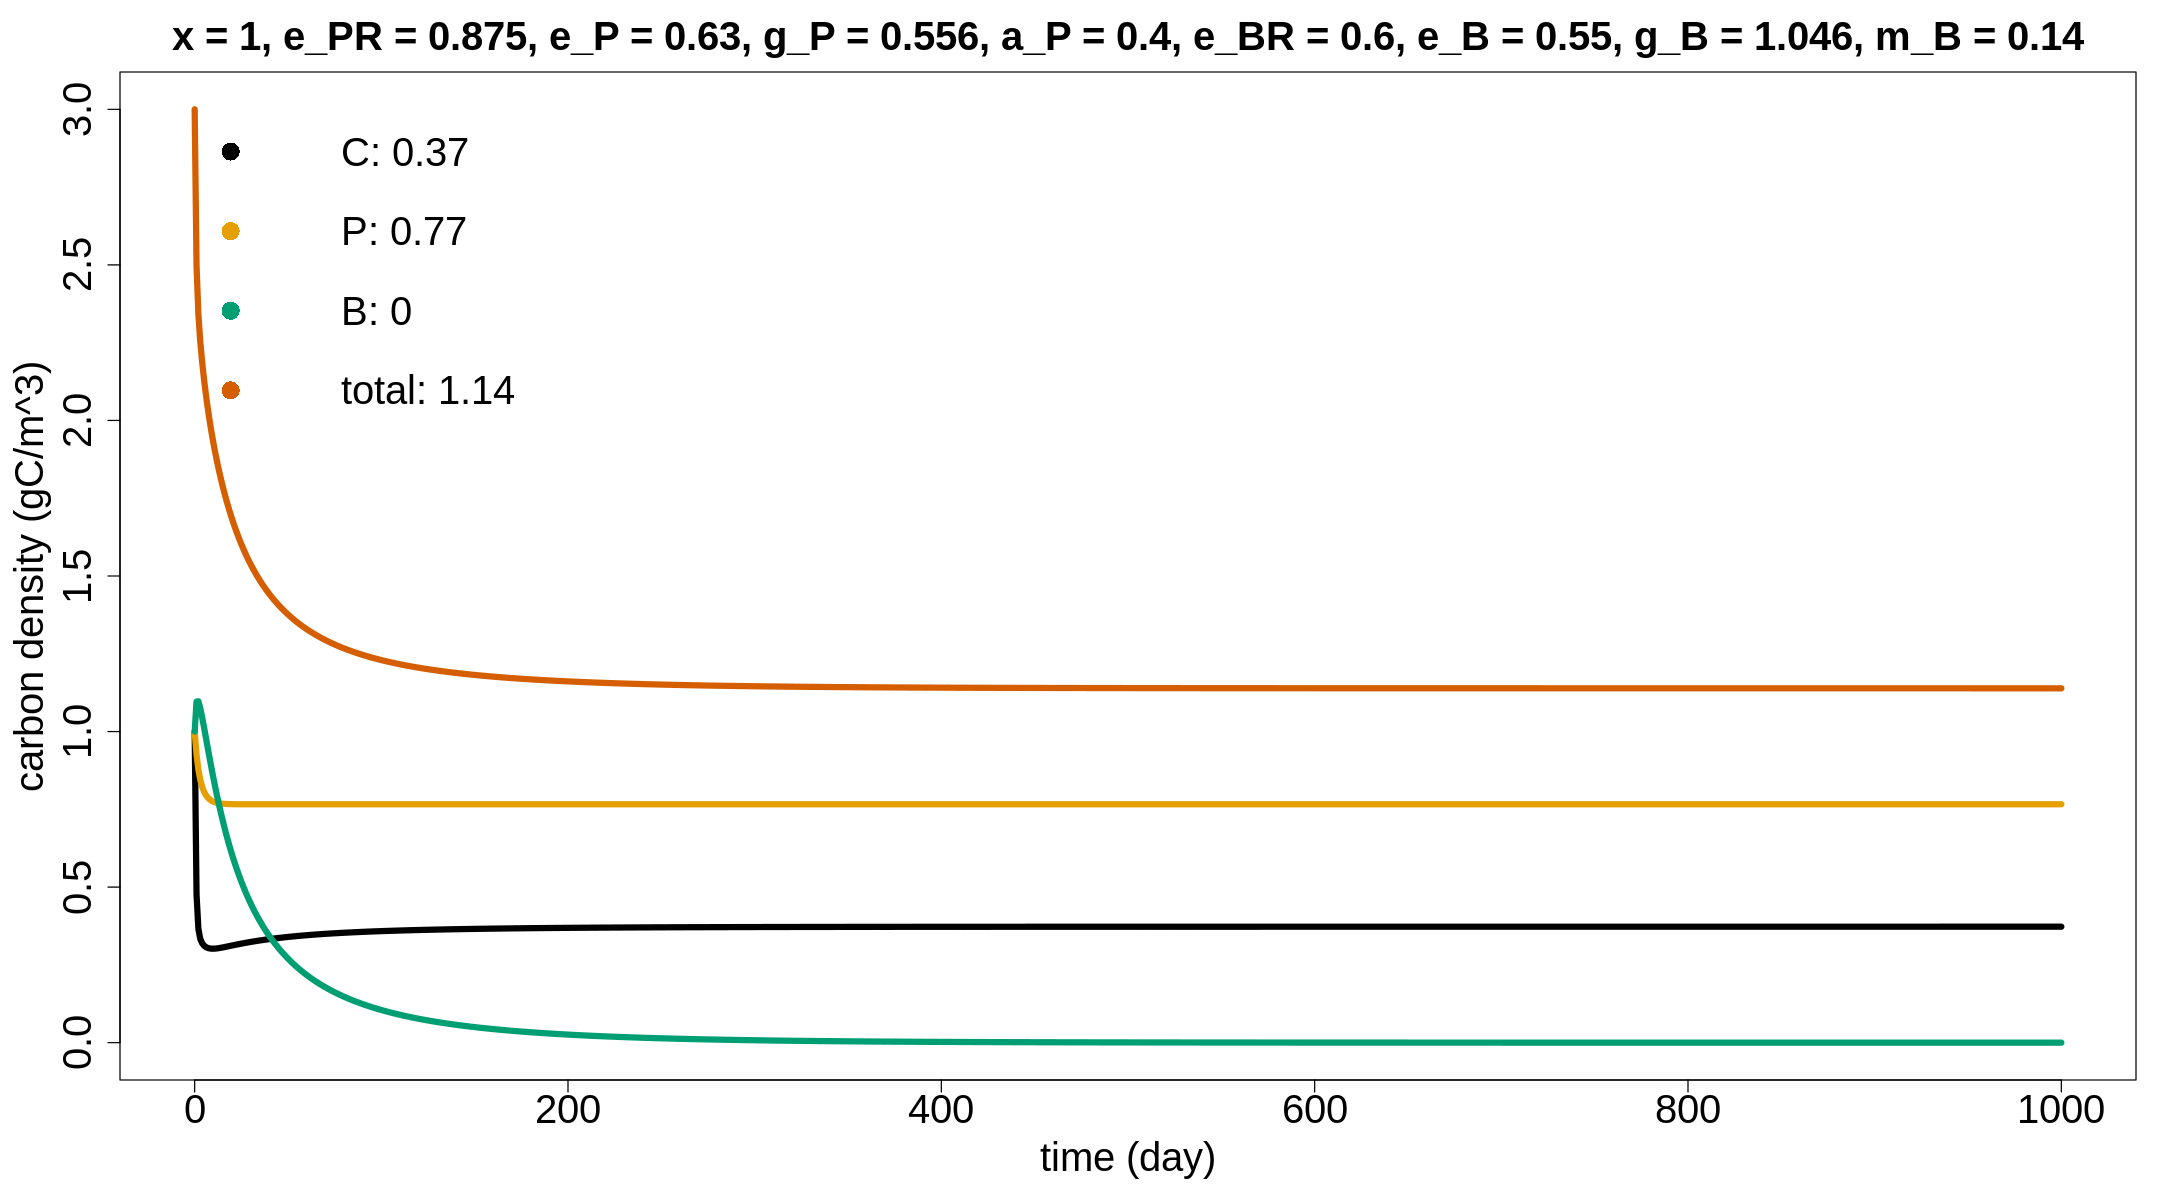

In [22]:
ebcDefault("h","h","h","l")

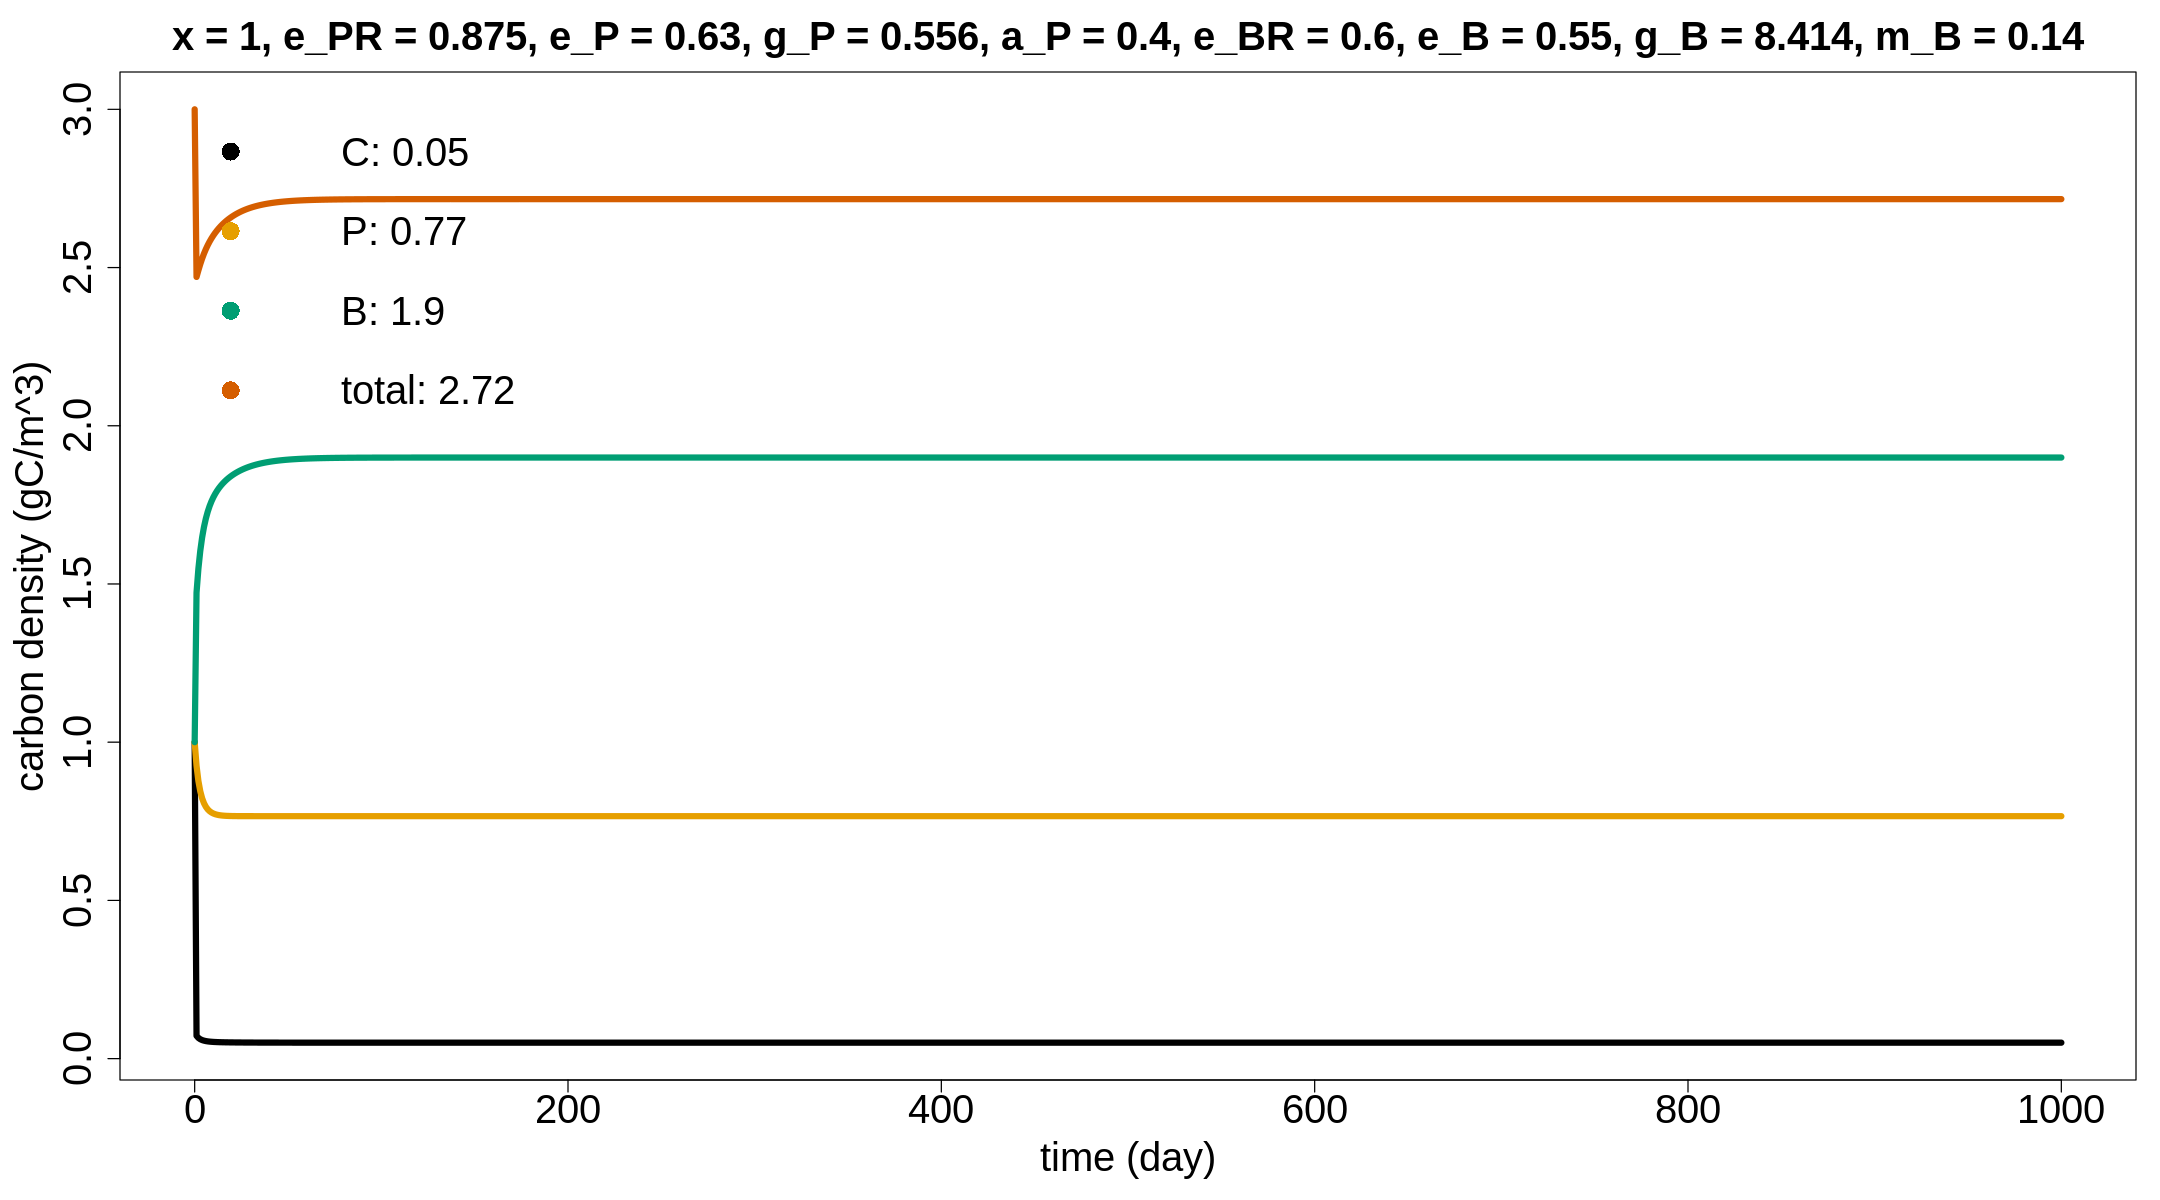

In [23]:
ebcDefault("h","h","h","h")

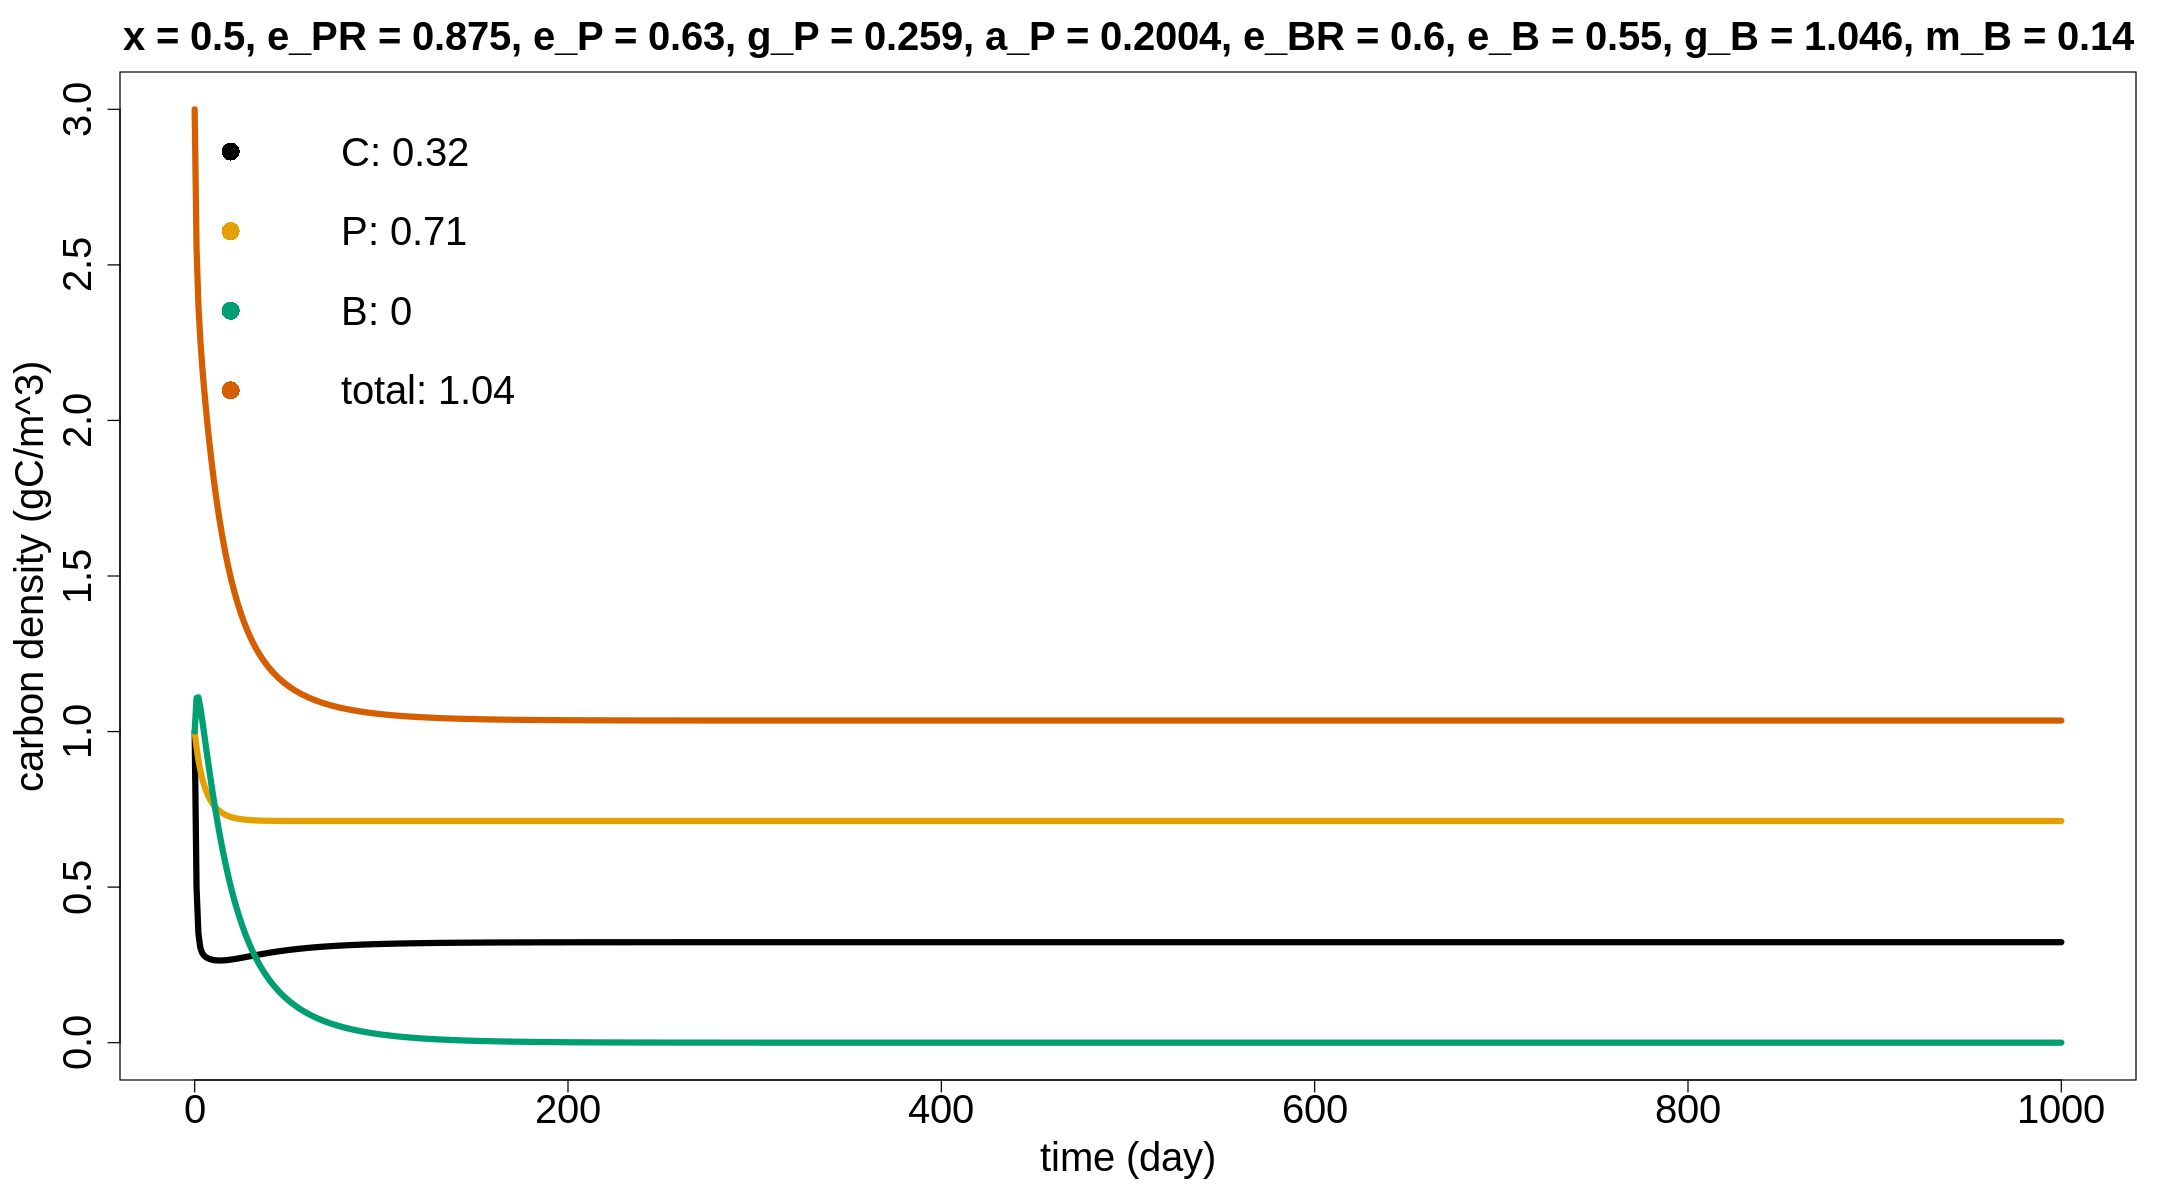

In [24]:
ebcDefault("m","m","l","l")

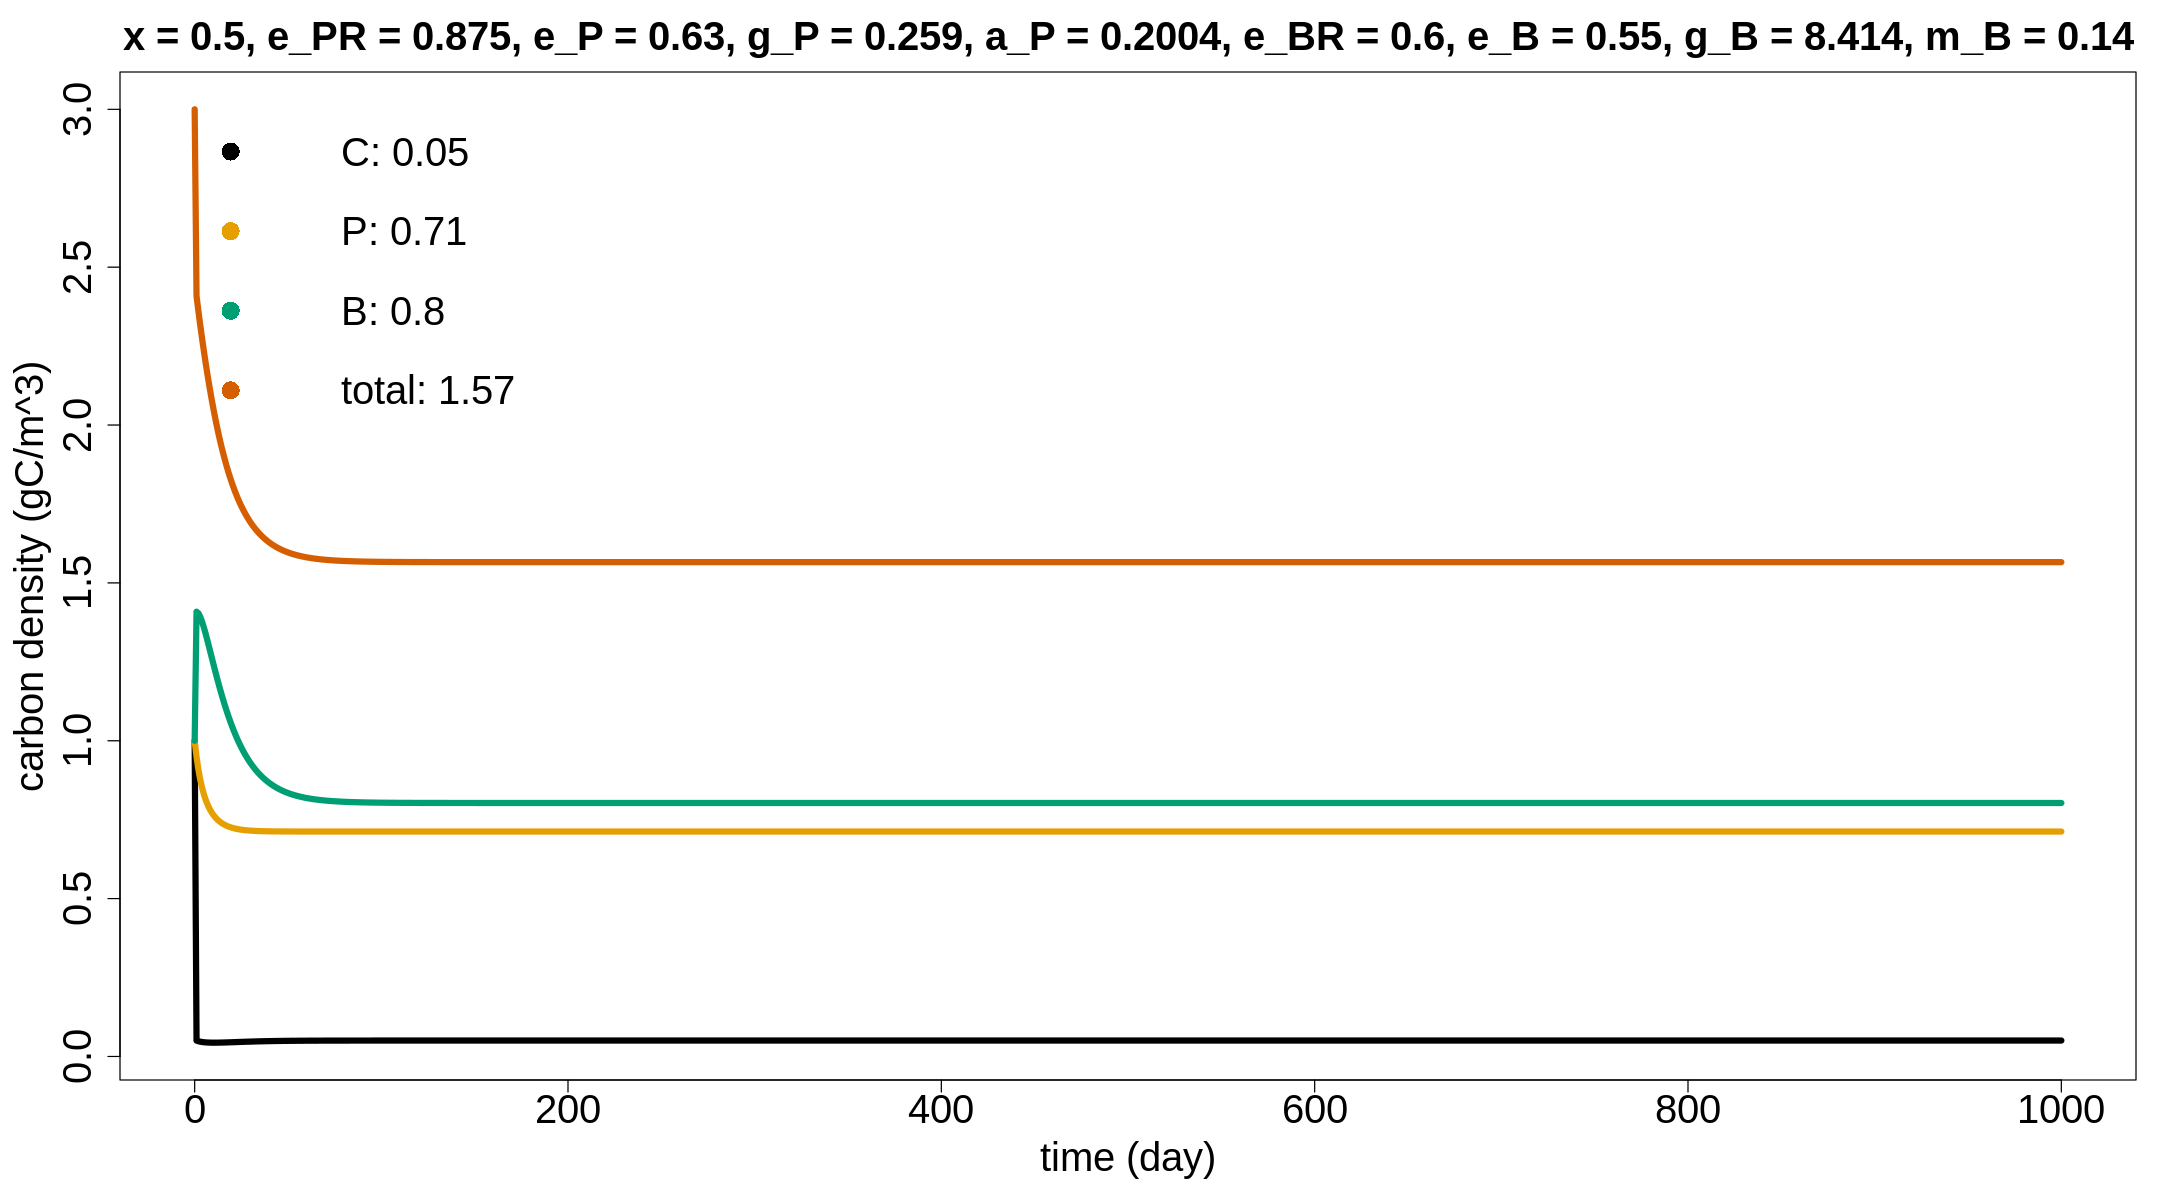

In [25]:
ebcDefault("m","m","l","h")

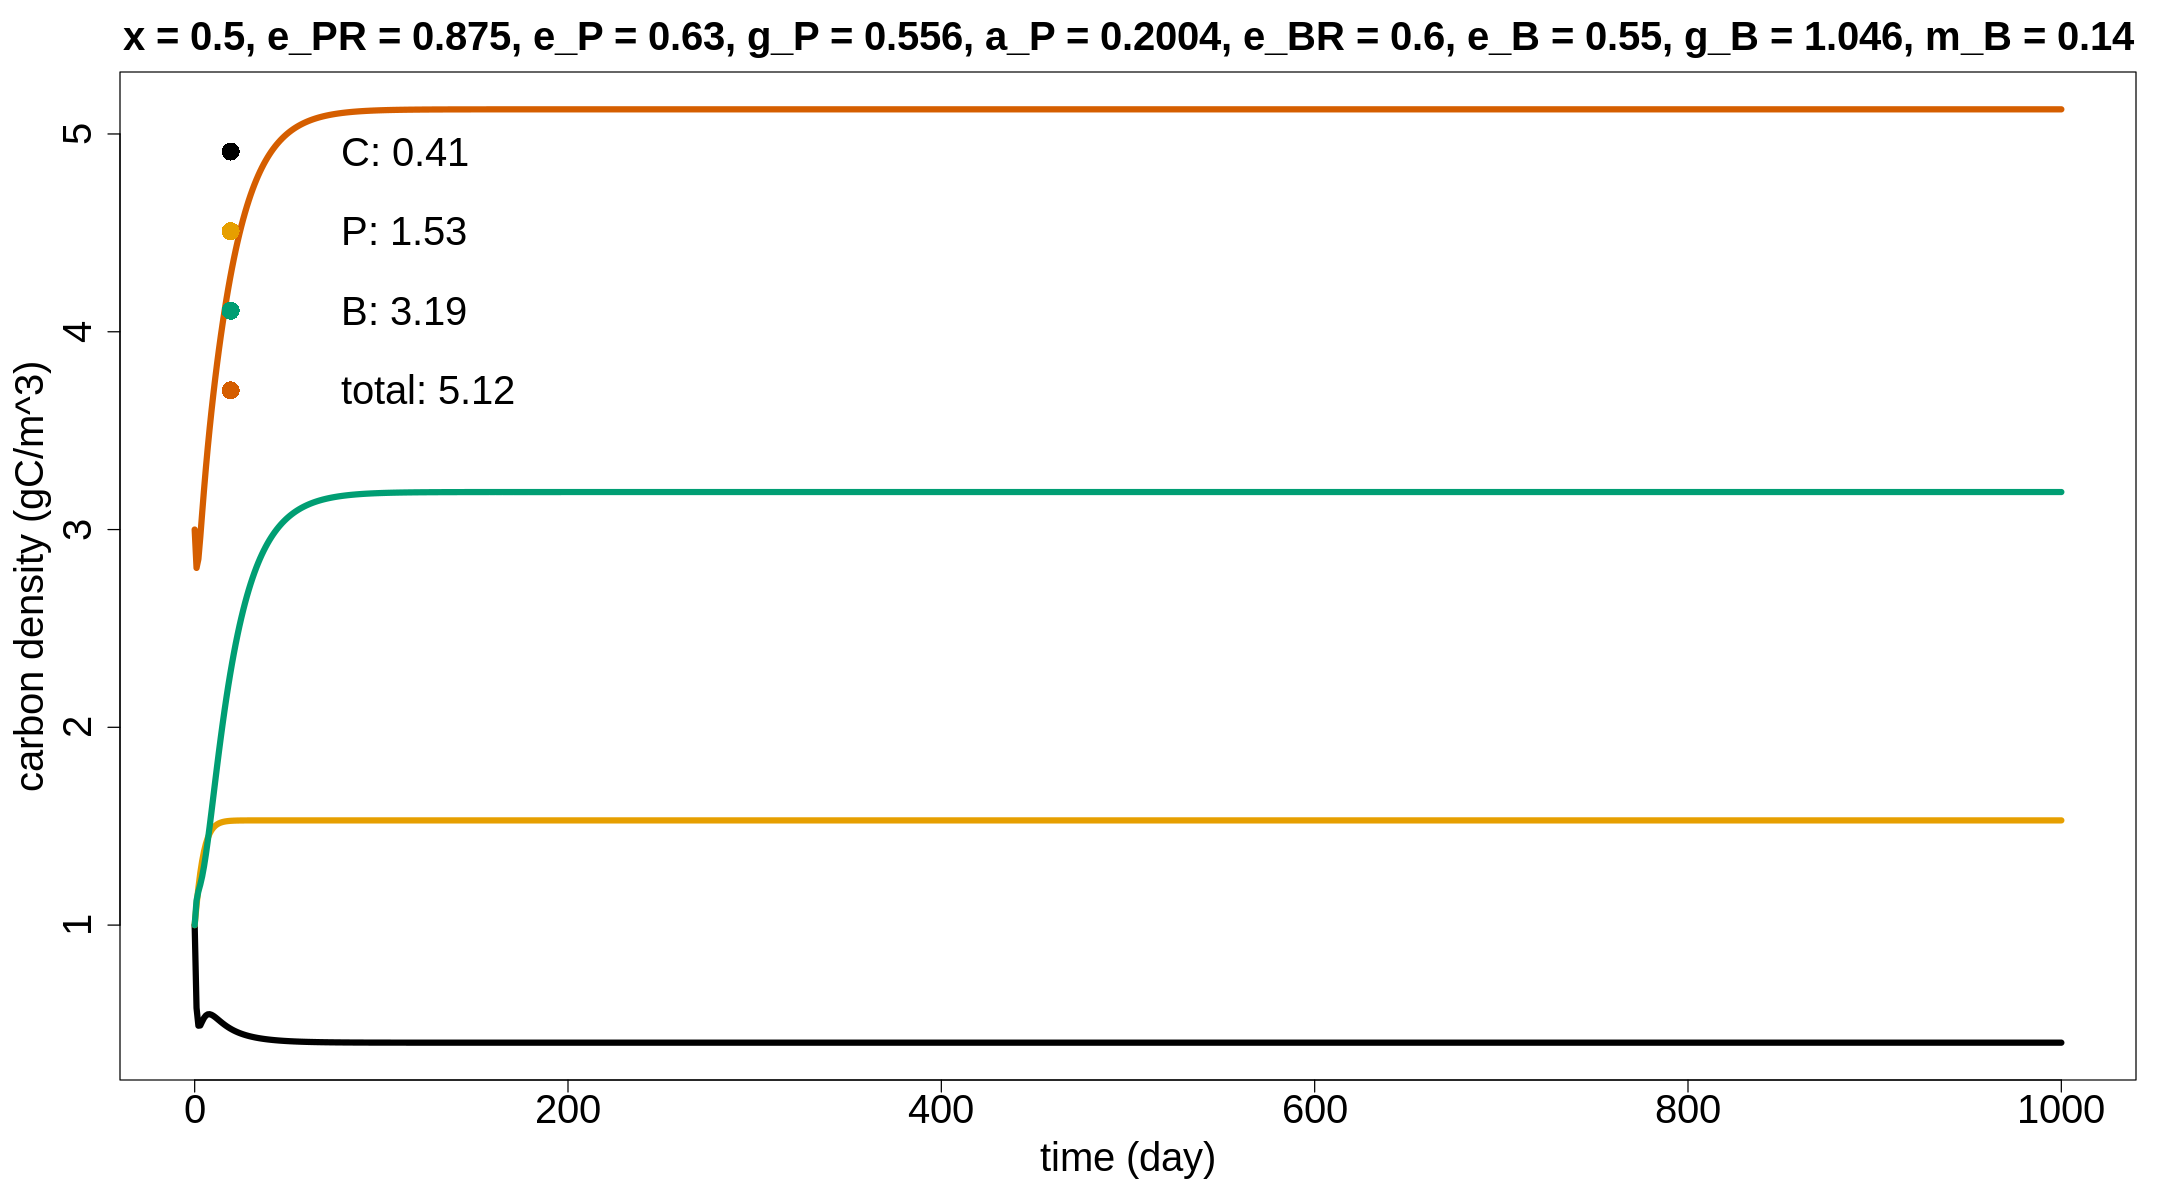

In [26]:
ebcDefault("m","m","h","l")

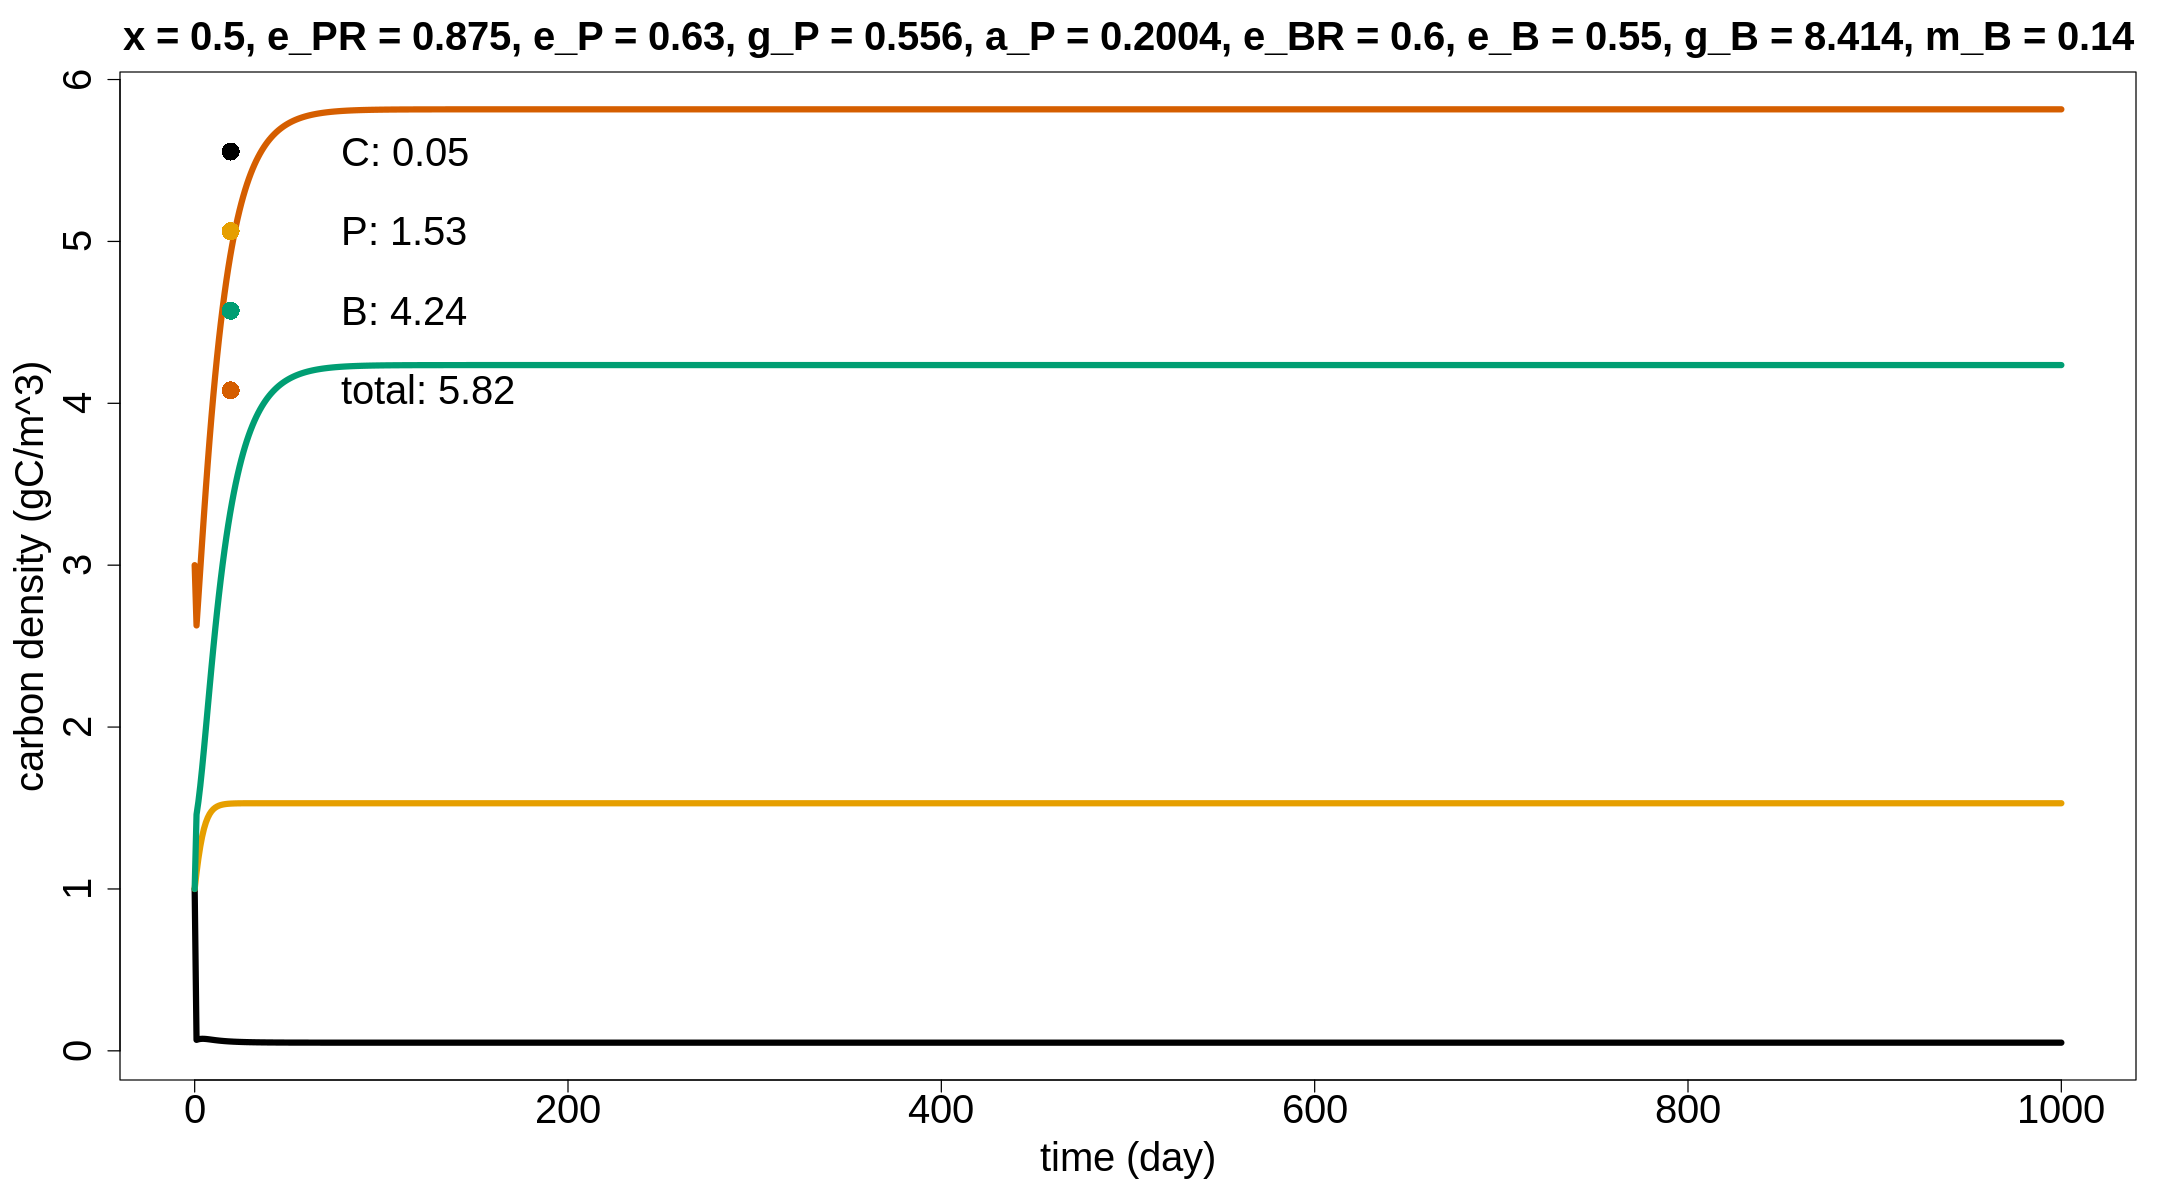

In [27]:
ebcDefault("m","m","h","h")

# contour result plotting
## env set-up

In [28]:
library(lattice)
#rAw = read.csv("../result/maxYield_0.0.csv", header=T)
rAw = read.csv("../result/maxYield_all.csv", header=T)
uNiqRAW = vector(mode='list')
for(i in 1:9){uNiqRAW[[i]]<-unique(rAw[,i])};rm(i)
uNiqRAW

[[1]]
  [1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

[[2]]
[1] 0.875

[[3]]
[1] 0.63

[[4]]
 [1] 0.2590 0.2888 0.3184 0.3481 0.3780 0.4075 0.4373 0.4670 0.4966 0.5264
[11] 0.5560

[[5]]
 [1] 0.0010 0.0409 0.0808 0.1207 0.1606 0.2004 0.2404 0.2803 0.3203 0.3600
[11] 0.4000

[[6]]
[1] 0.6

[[7]]
[1] 0.55

[[8]]
  [1] 0.707 0.790 0.873 0.956 1.039 1.122 1.205 1.288 1.371 1.454 1.537 1.620
 [13] 1.703 1.786 1.869 1.952 2.035 2.120 2.201 2.285 2.367 2.451 2.533 2.617
 [25] 2.700 2.783 2.865 2.950 3.031 3.115 3.197 3.281 3.363 3.447 3.530 3.613
 [37] 3.695 3.780 3.861 3.945 4.027 4.110 4.195 4.277 4.360 4.445 4.527 4.610
 [49] 4.690 4.777 4.860 4.940 5.023 5.110 5.190 5.273 5.355 5.440 5.523 5.605
 [61] 5.688 5.773 5.855 5.938 6.020 6.105 6.188 6.270 6.350 6.438 6.520 6.600
 [73] 6.684 6.770 6.850 6.934 7.016 7.100 7.184 7.266 7.350 7.434 7.516 7.598
 [85] 7.684 7.766 7.848 7.930 8.016 8.090 8.180 8.266 8.340 8.430 8.516 8.590
 [97] 8.680 8.760 8.840 8.930 9.010

[[9]]
[1] 0.14

## functions

In [29]:
gPBmap = function(zaXis=13, parameter=c(1,1,1,0,1,1,1,0,1), data=rAw, uniqFac=uNiqRAW){
    ## check parameter input valid
    for(i in 1:length(uniqFac)){if(parameter[i]>length(uniqFac[[i]])){
        parameter[i] = length(uniqFac[[i]])
        cat(paste0("parameter ",i," out of bounds, switching to max index ",length(uniqFac[[i]]),"\n"))
    }};rm(i)
    
    ## identify xy axis
    xyAxis = which(parameter==0)
    
    ## dataframe trim, set title
    tiTle = paste0("Density of ",colnames(data)[zaXis]," (gC/m3)\n")
    for(i in 1:length(uniqFac)){if(i%in%xyAxis==F){
        data = data[which(data[,i]==uniqFac[[i]][parameter[i]]),]
        tiTle = paste0(tiTle,", ",colnames(data)[i],"=",uniqFac[[i]][parameter[i]])
    }};rm(i)
    
    ## levelplot
    contourplot(data[,zaXis]~data[,xyAxis[1]]*data[,xyAxis[2]], xlab=colnames(data)[xyAxis[1]], ylab=colnames(data)[xyAxis[2]], main=tiTle, col.regions = rev(gray(30:90/100)), scales=list(x=list(cex=3), y=list(cex=3)))
}

In [30]:
gPBDefault = function(z=13, x="l", aP="l", data=rAw, uniqFac=uNiqRAW){## l/m/h
    para=rep(NA,2)
    if(x=="l"){para[1]=1}else if(x=="h"){para[1]=length(uniqFac[[1]])}else{para[1]=ceiling(length(uniqFac[[1]])/2)}
    if(aP=="l"){para[2]=1}else if(aP=="h"){para[2]=length(uniqFac[[5]])}else{para[2]=ceiling(length(uniqFac[[5]])/2)}
    gPBmap(z,c(para[1],1,1,0,para[2],1,1,0,1),data=data,uniqFac=uniqFac)
}

## situations

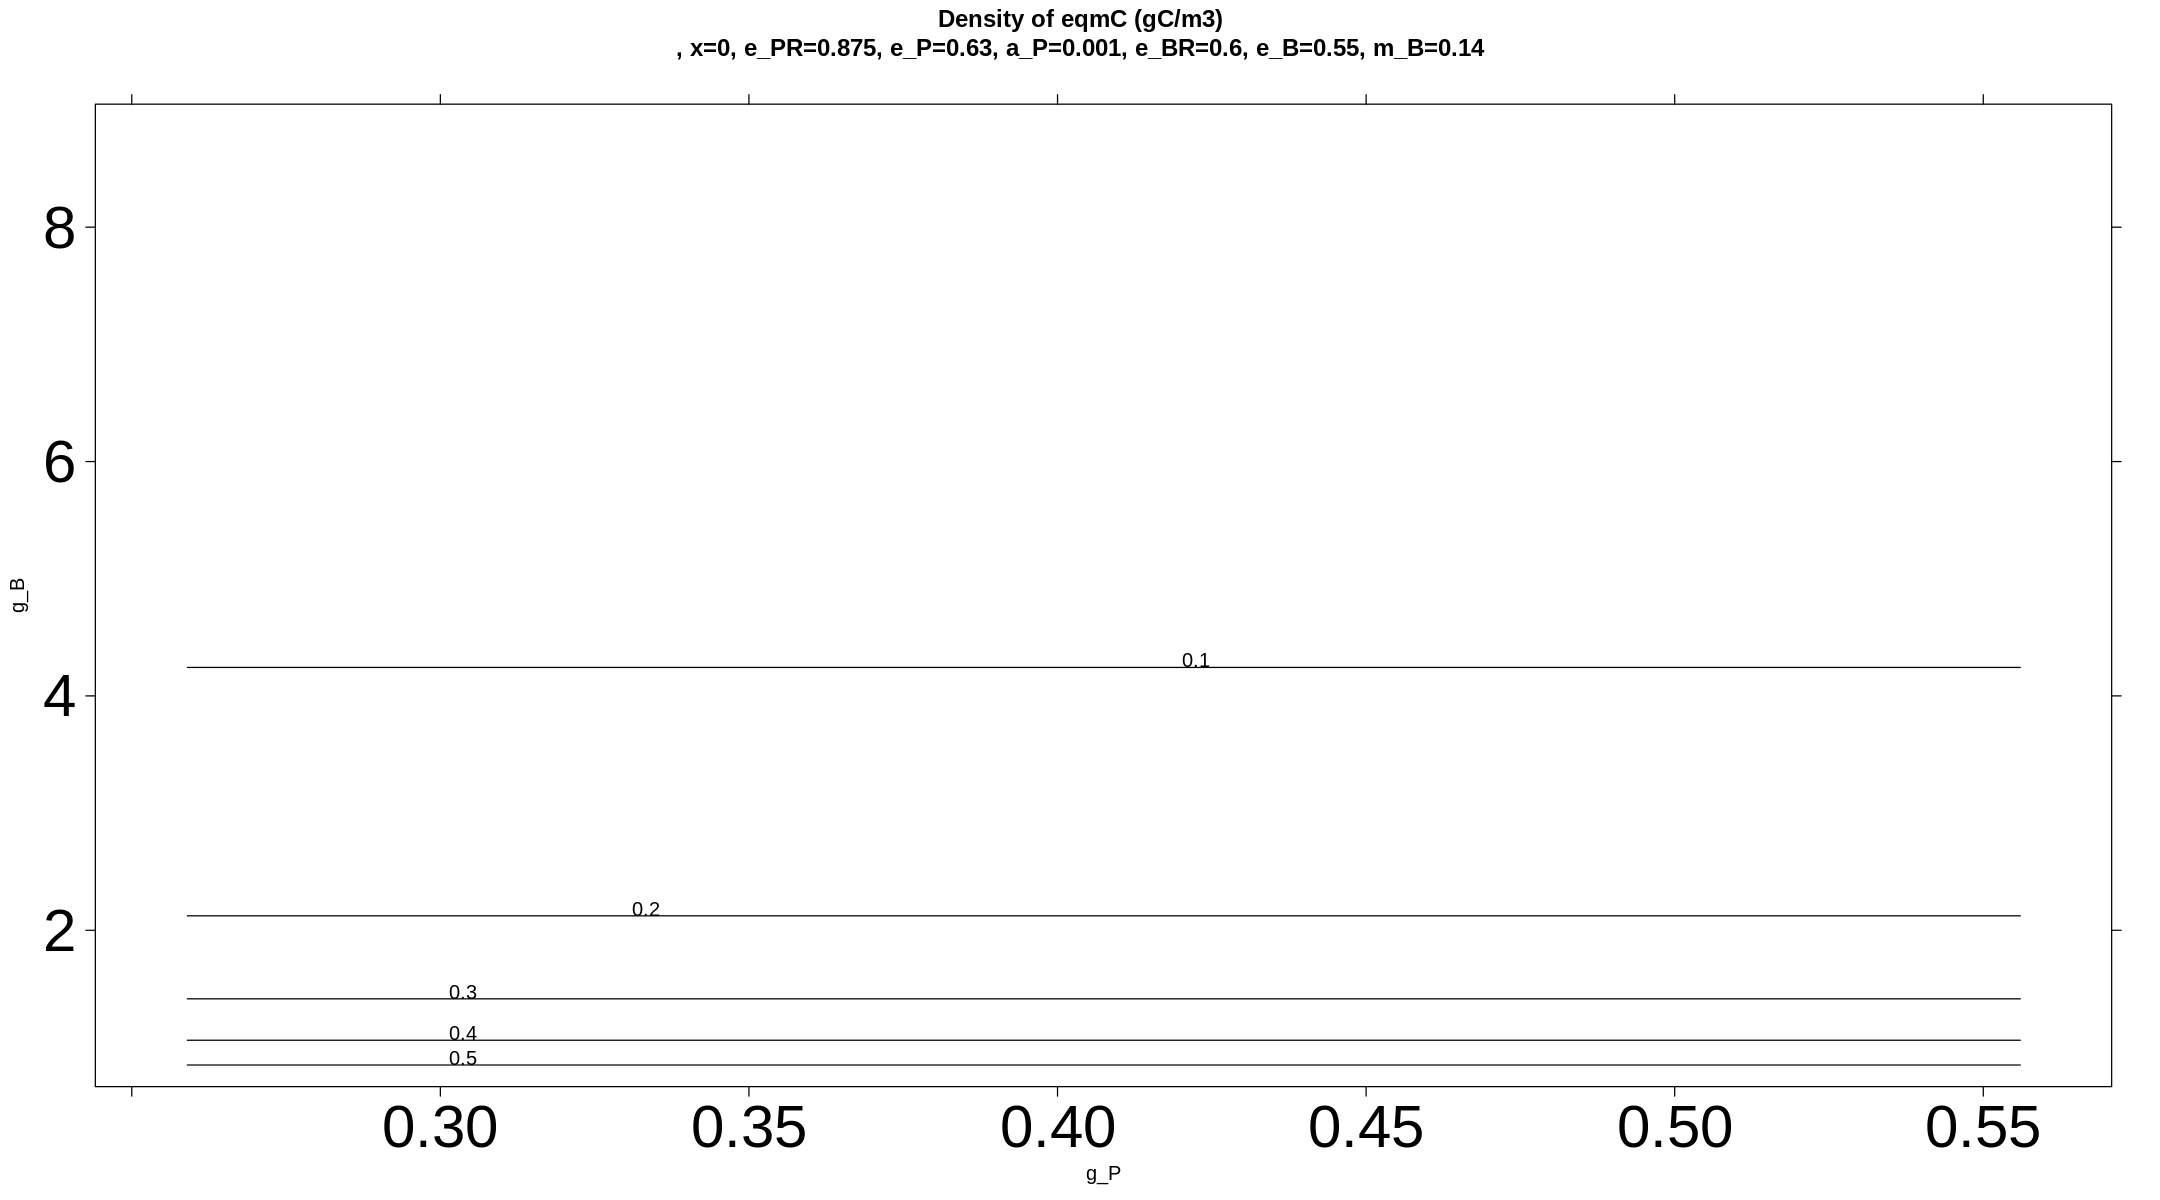

In [31]:
gPBDefault(10,"l","l")

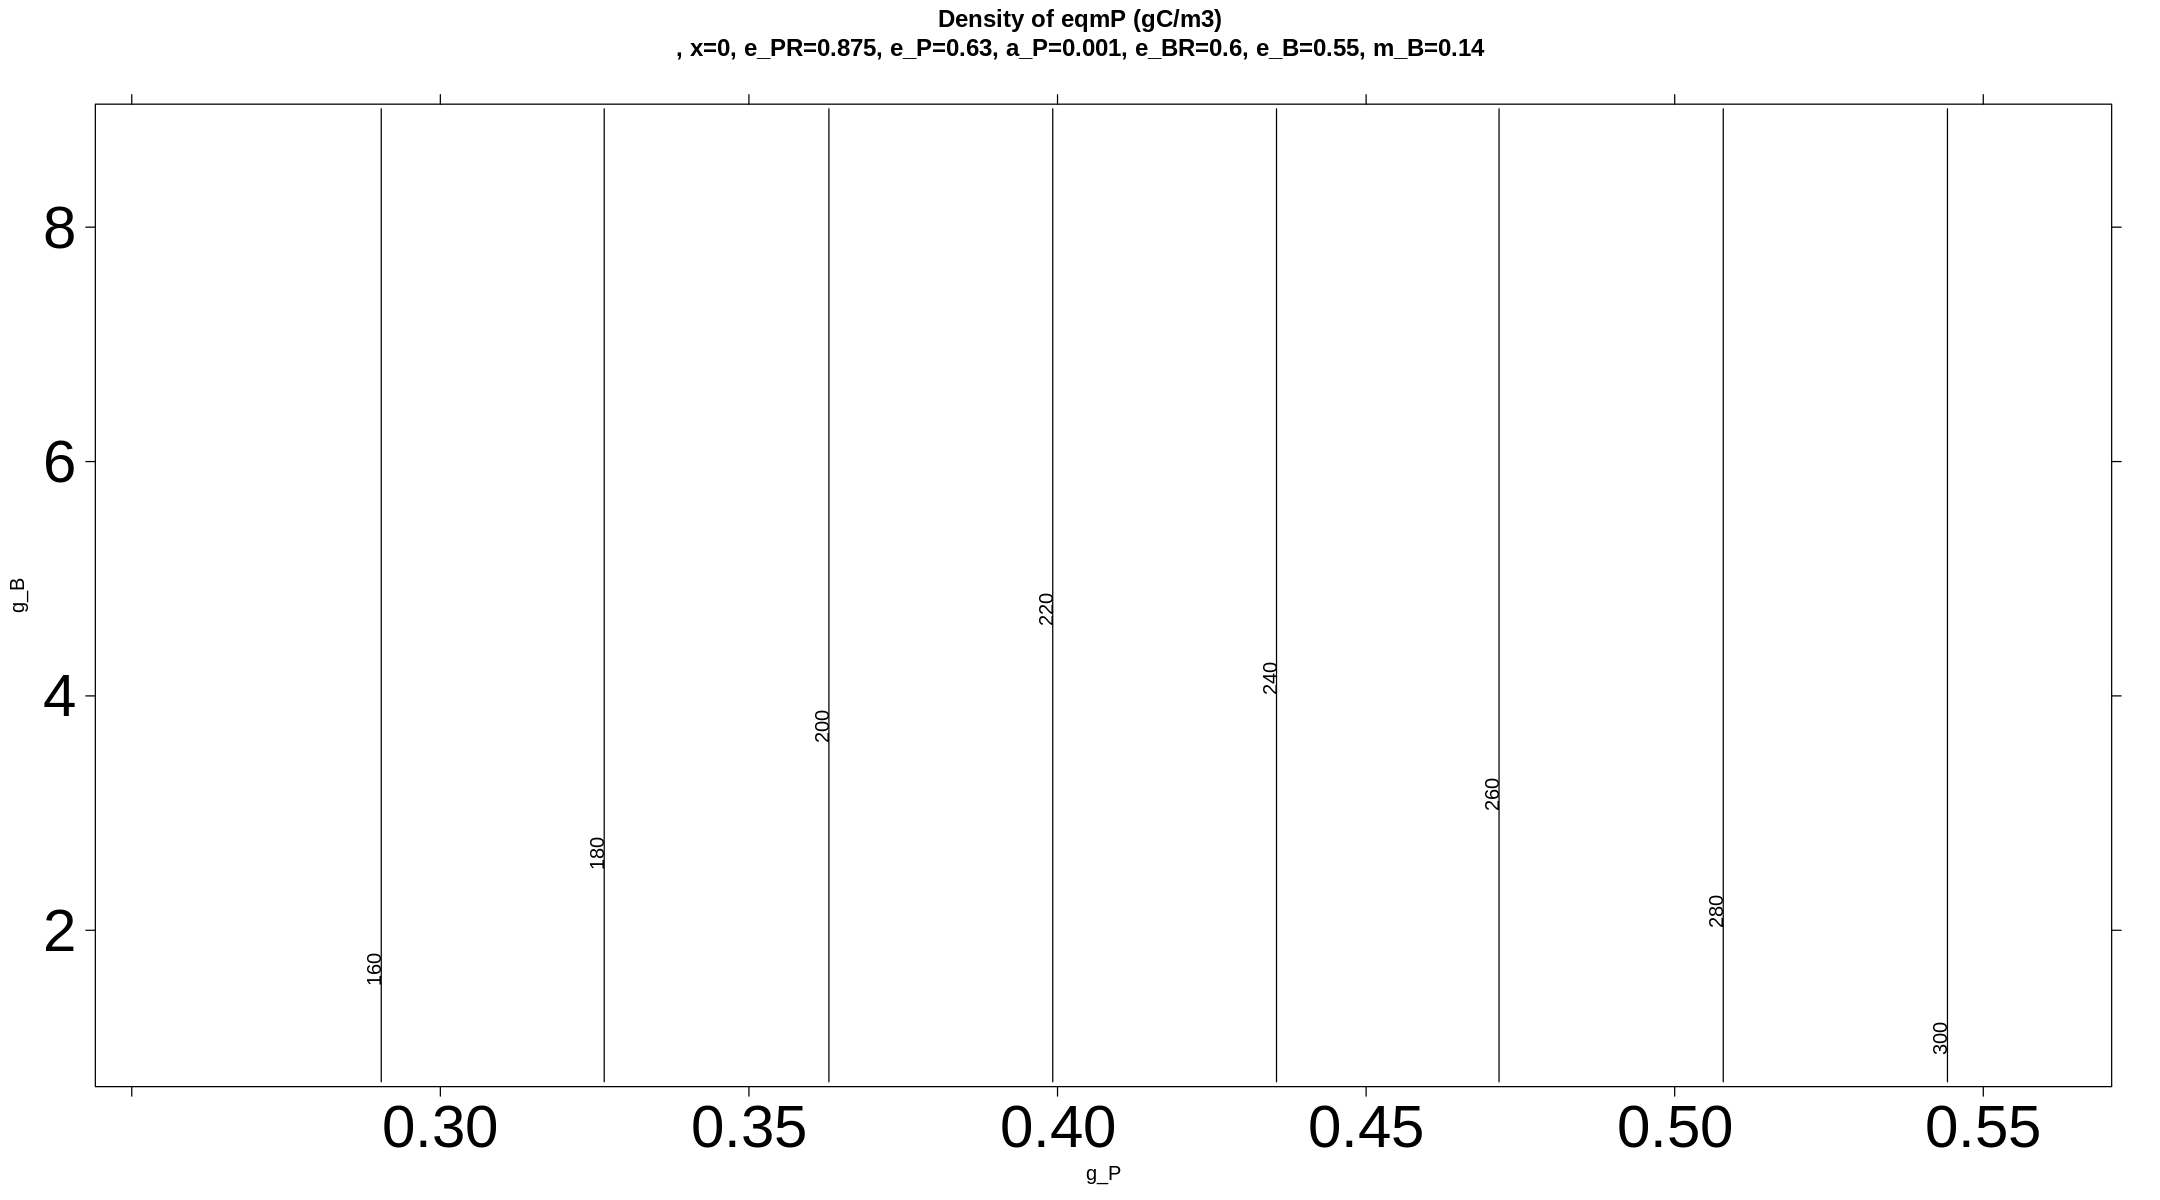

In [32]:
gPBDefault(11,"l","l")

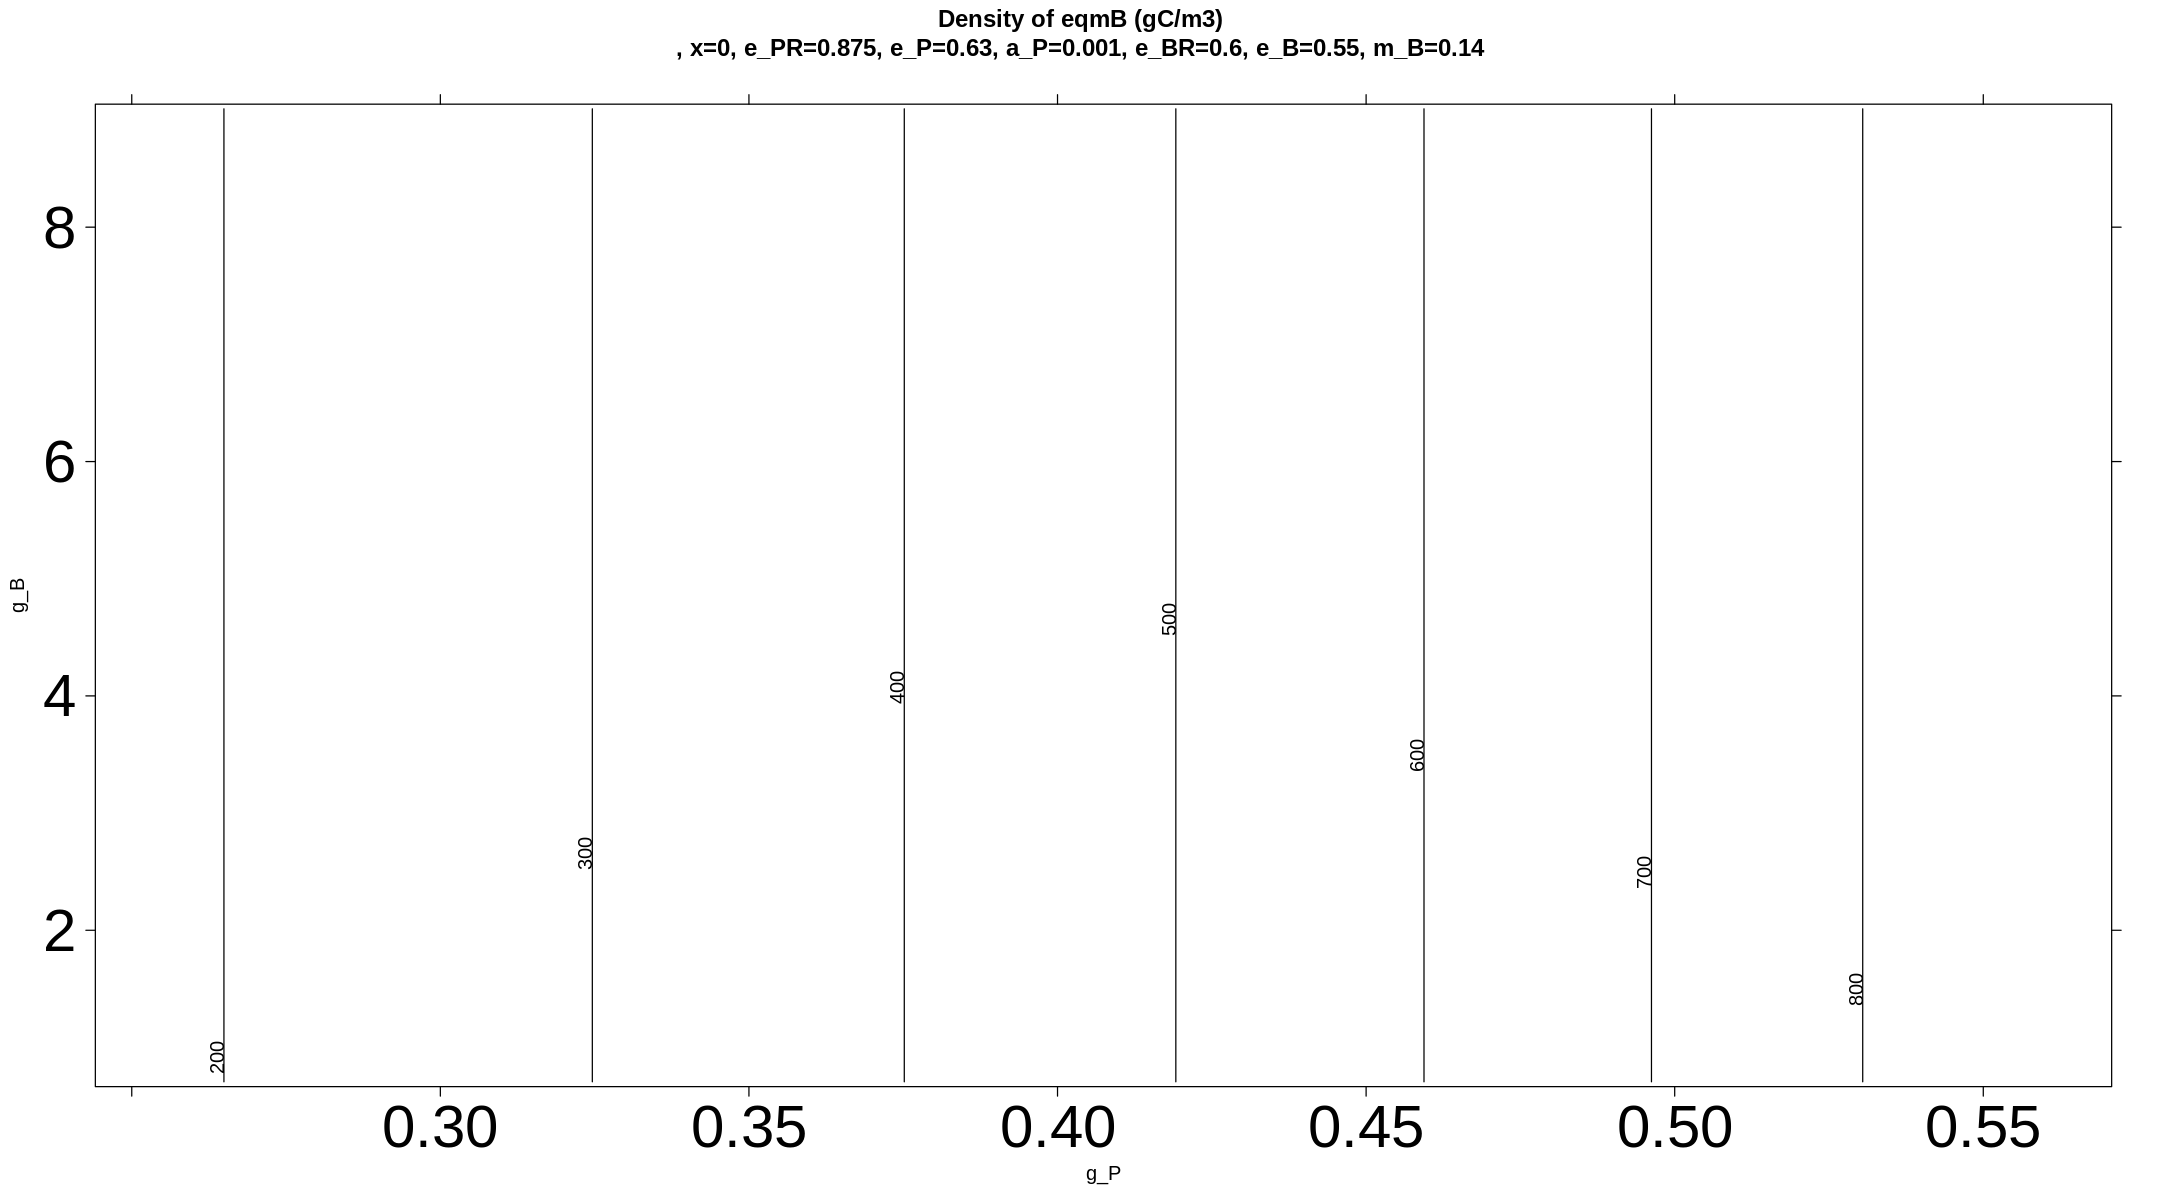

In [33]:
gPBDefault(12,"l","l")

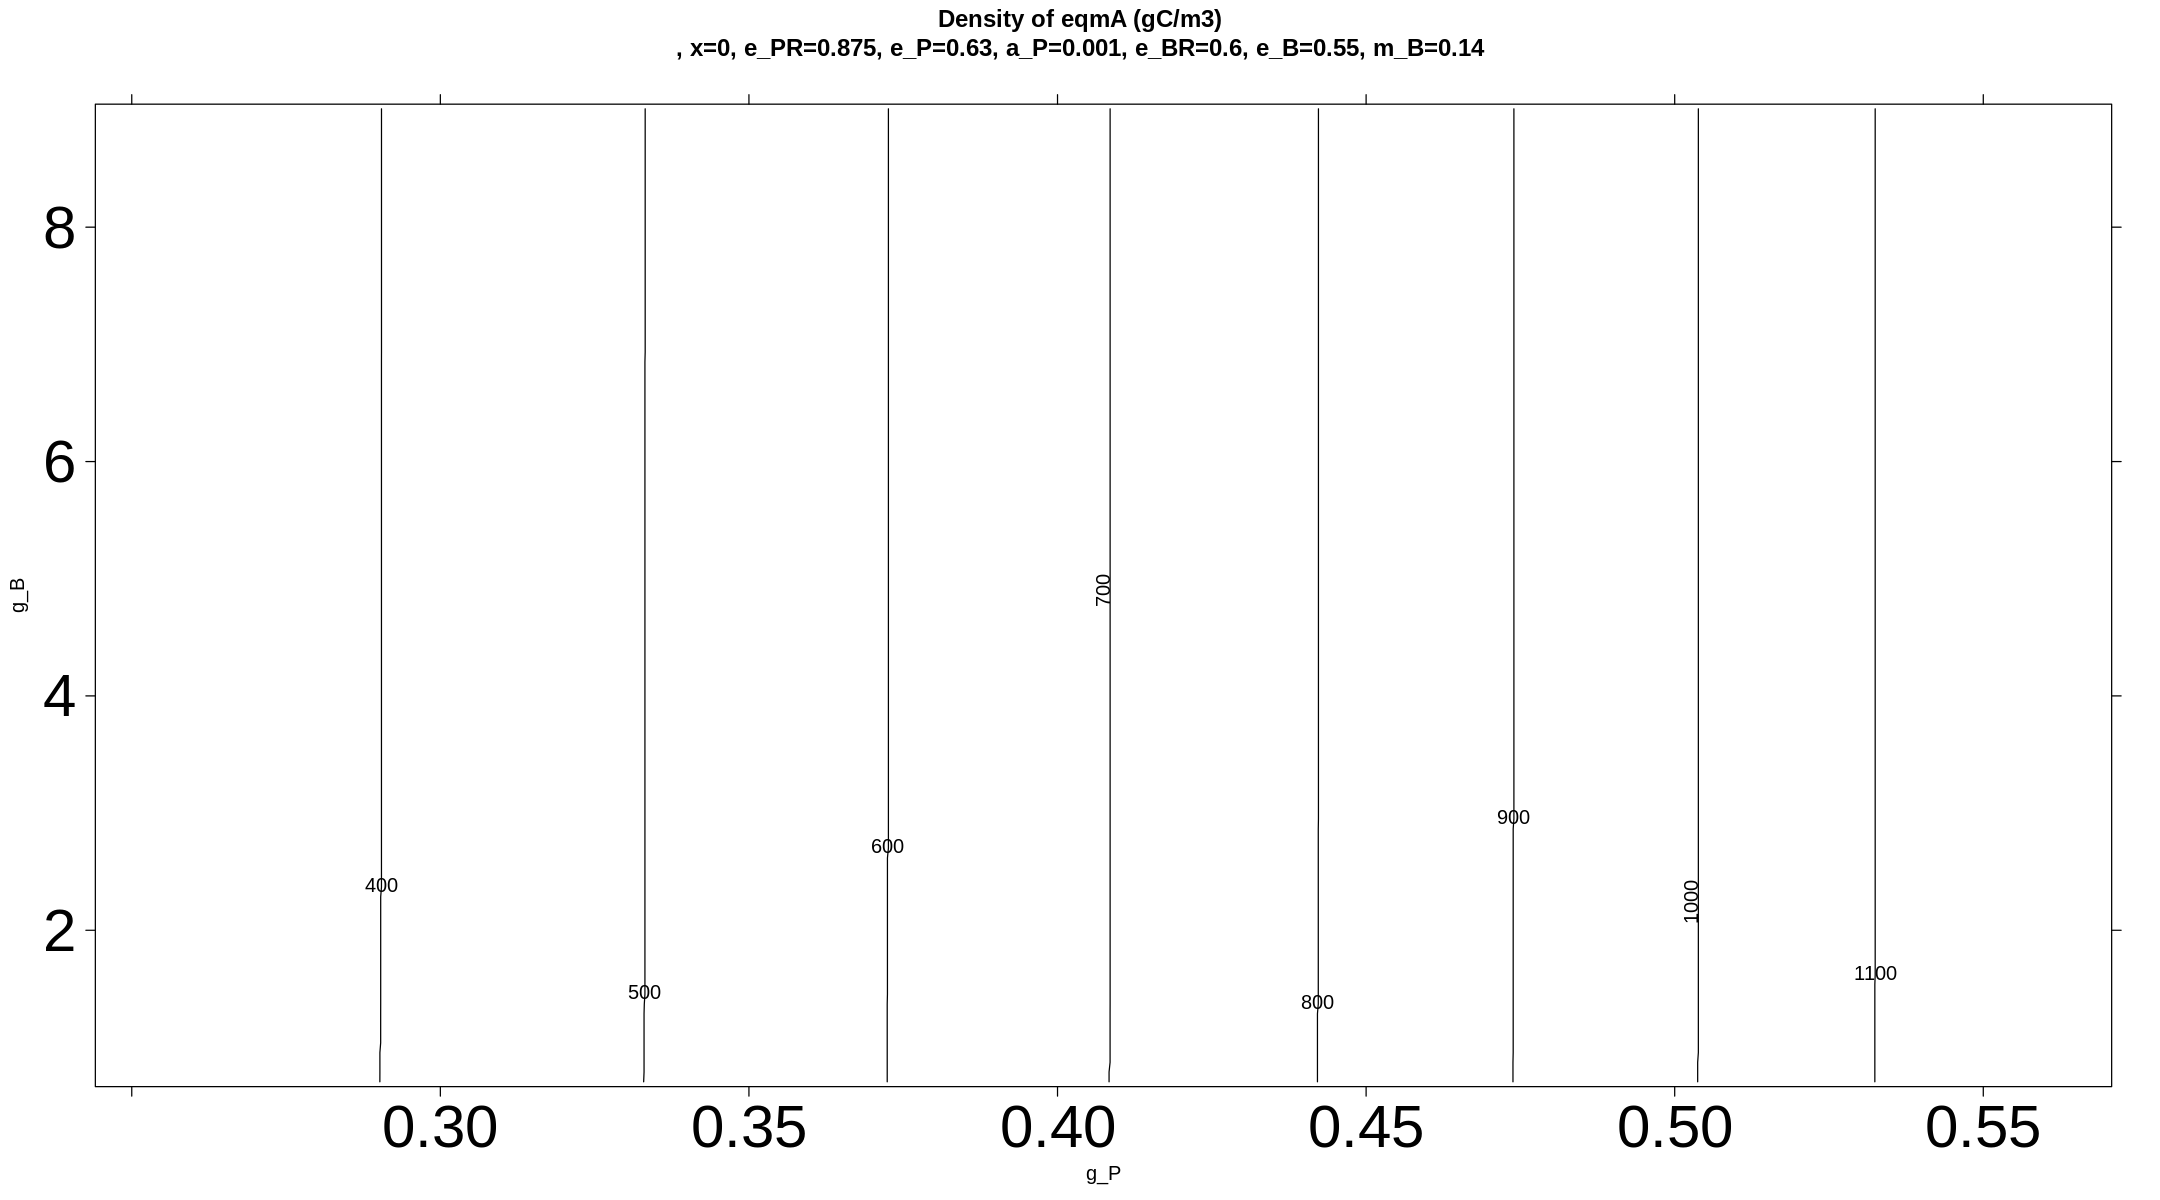

In [34]:
gPBDefault(13,"l","l")

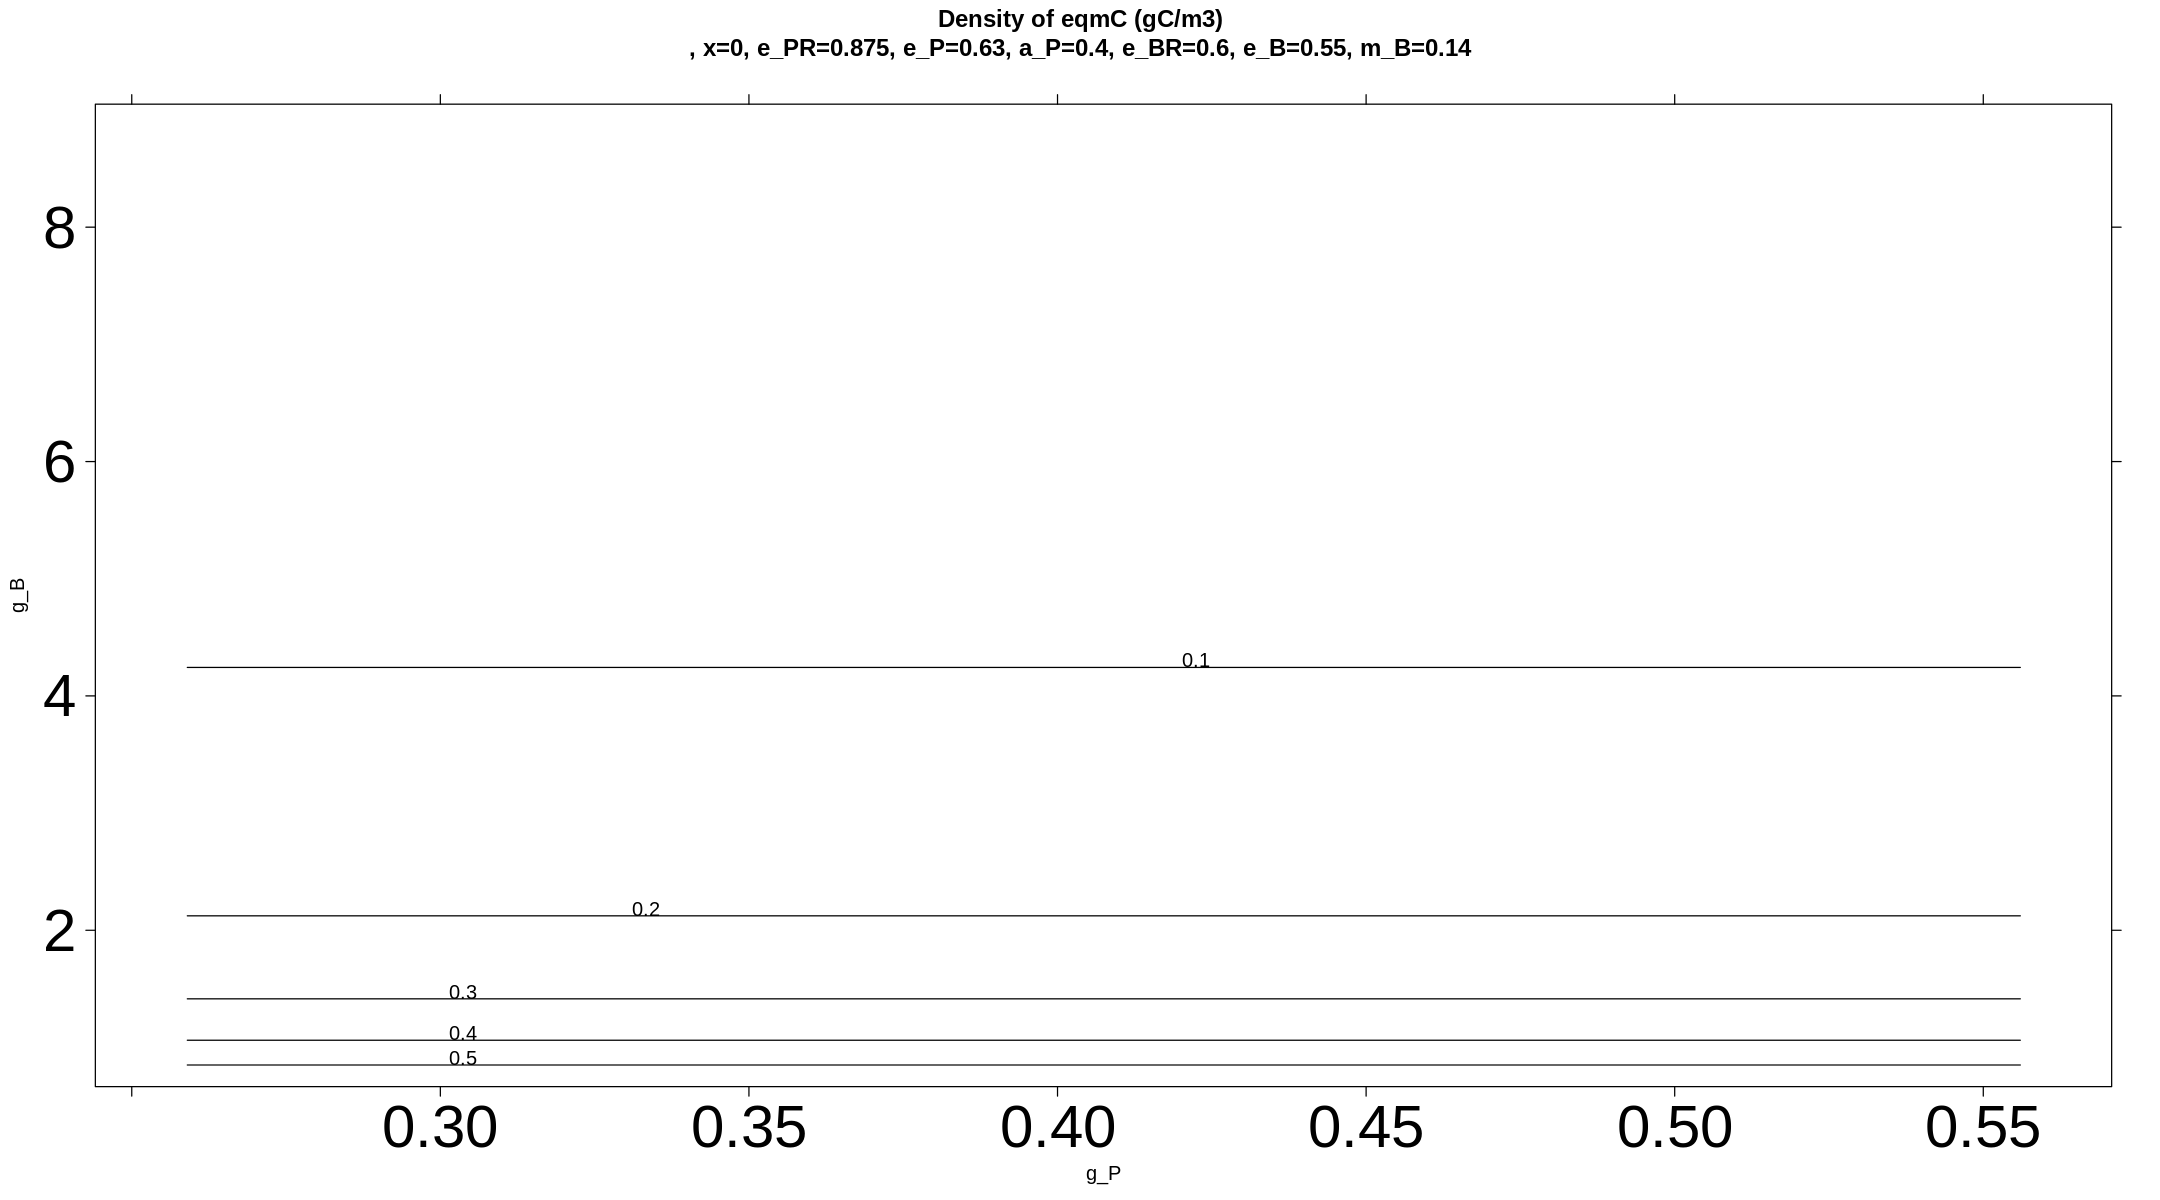

In [35]:
gPBDefault(10,"l","h")

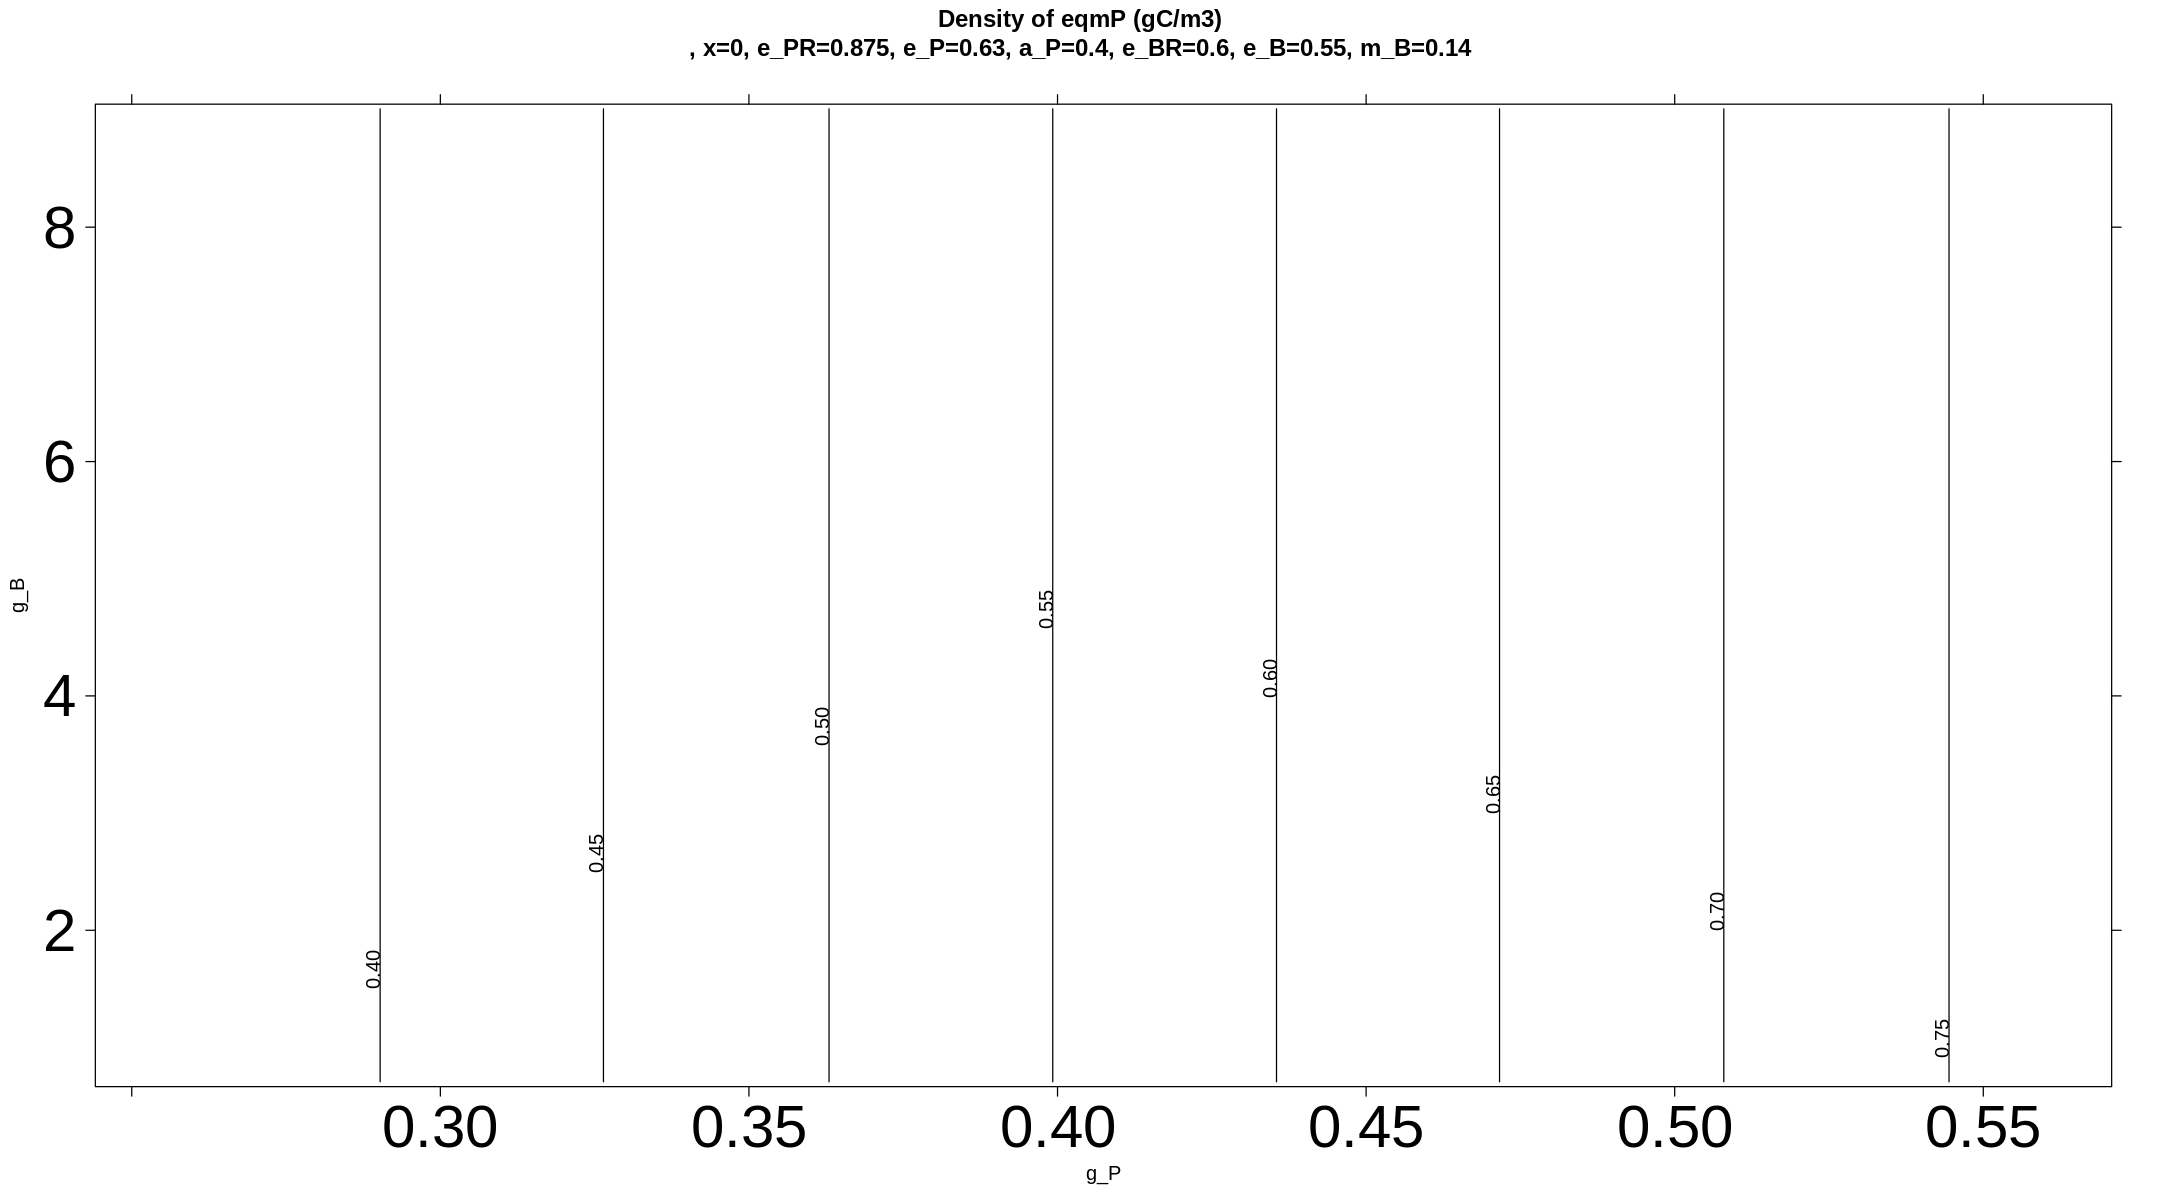

In [36]:
gPBDefault(11,"l","h")

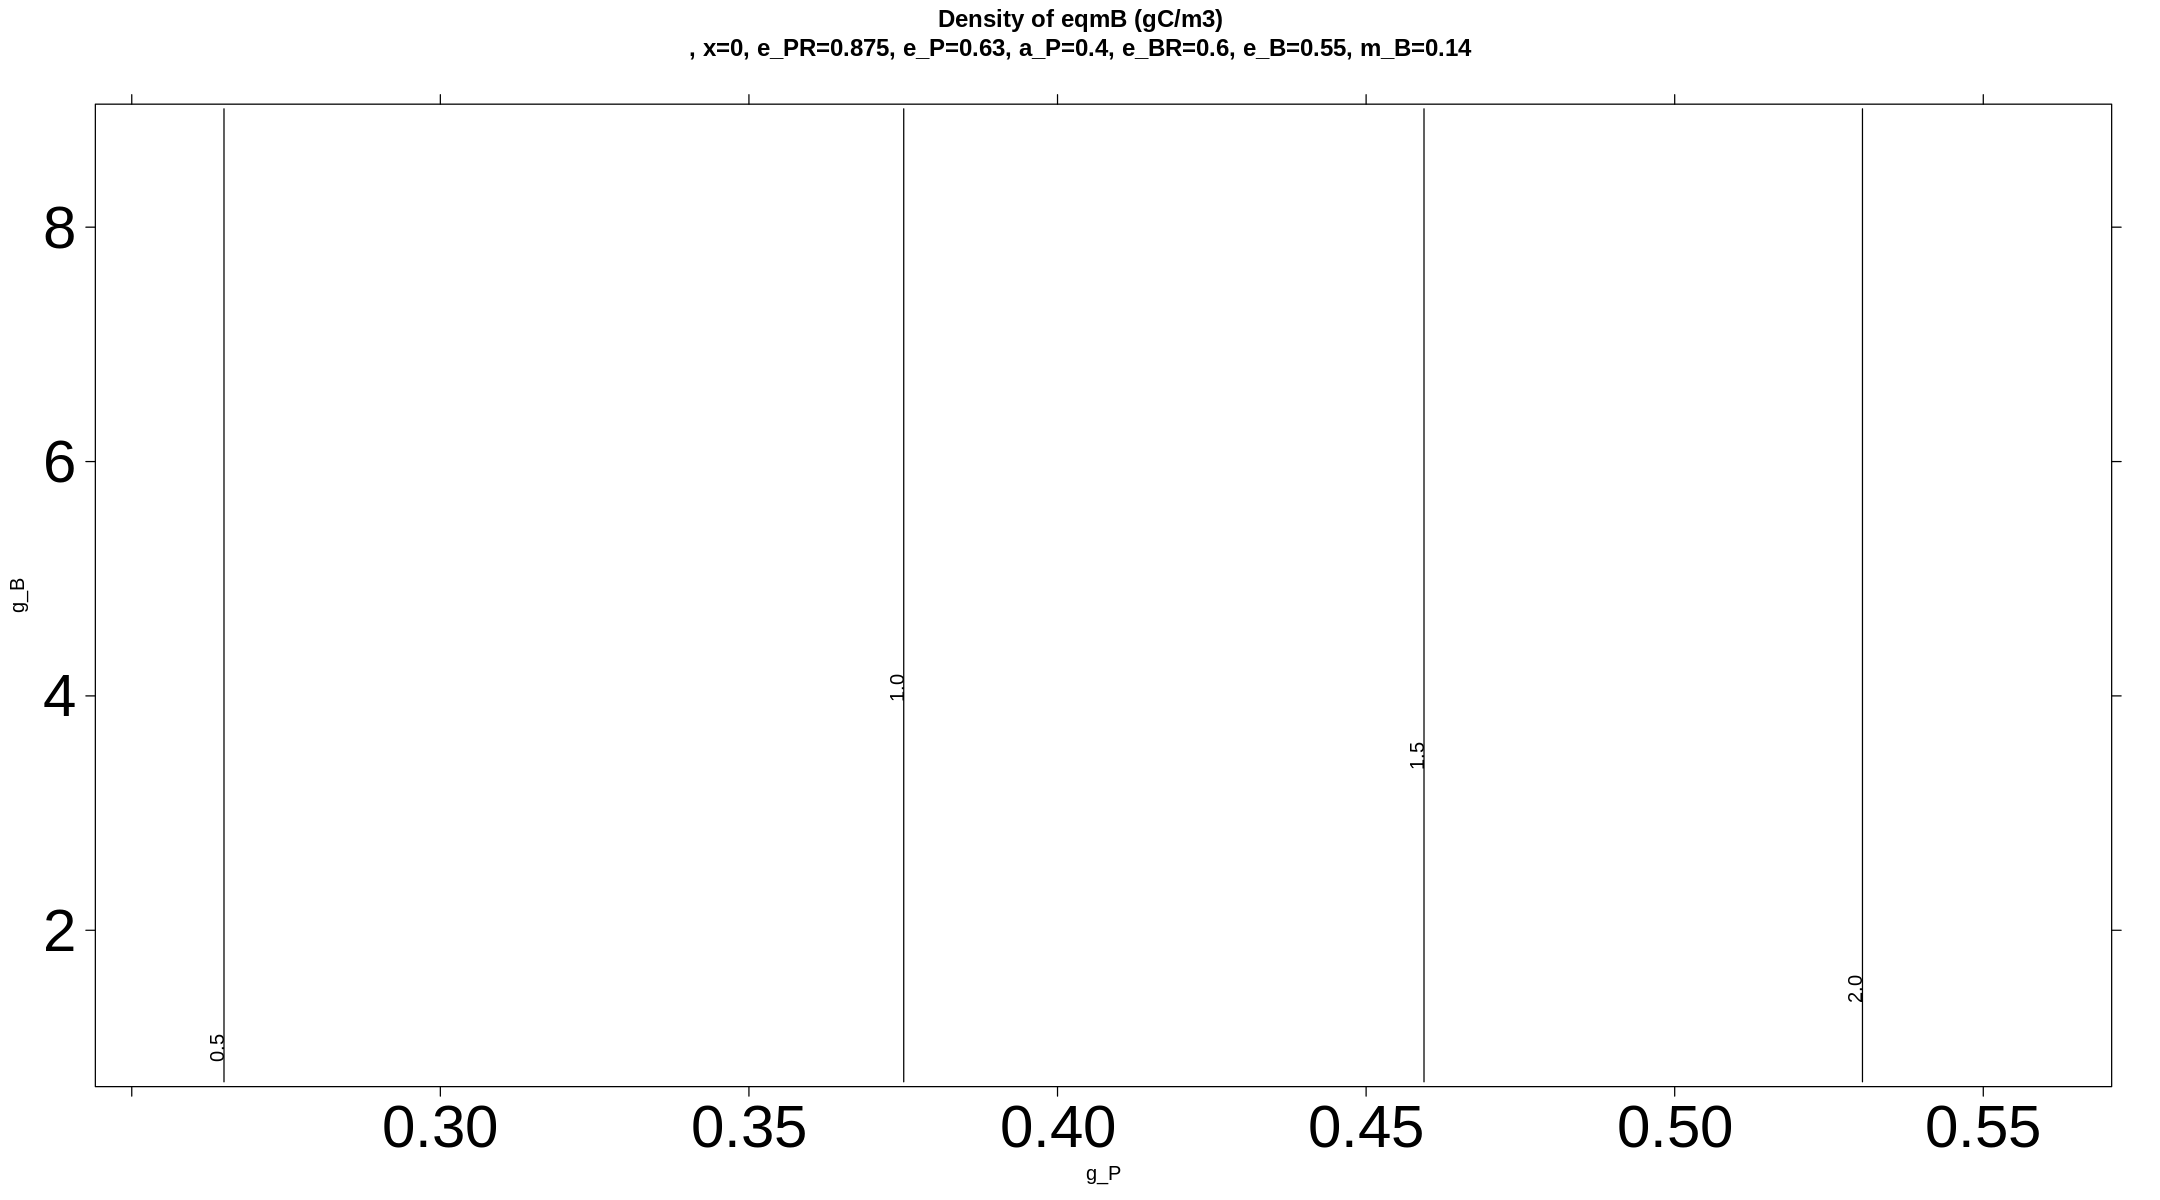

In [37]:
gPBDefault(12,"l","h")

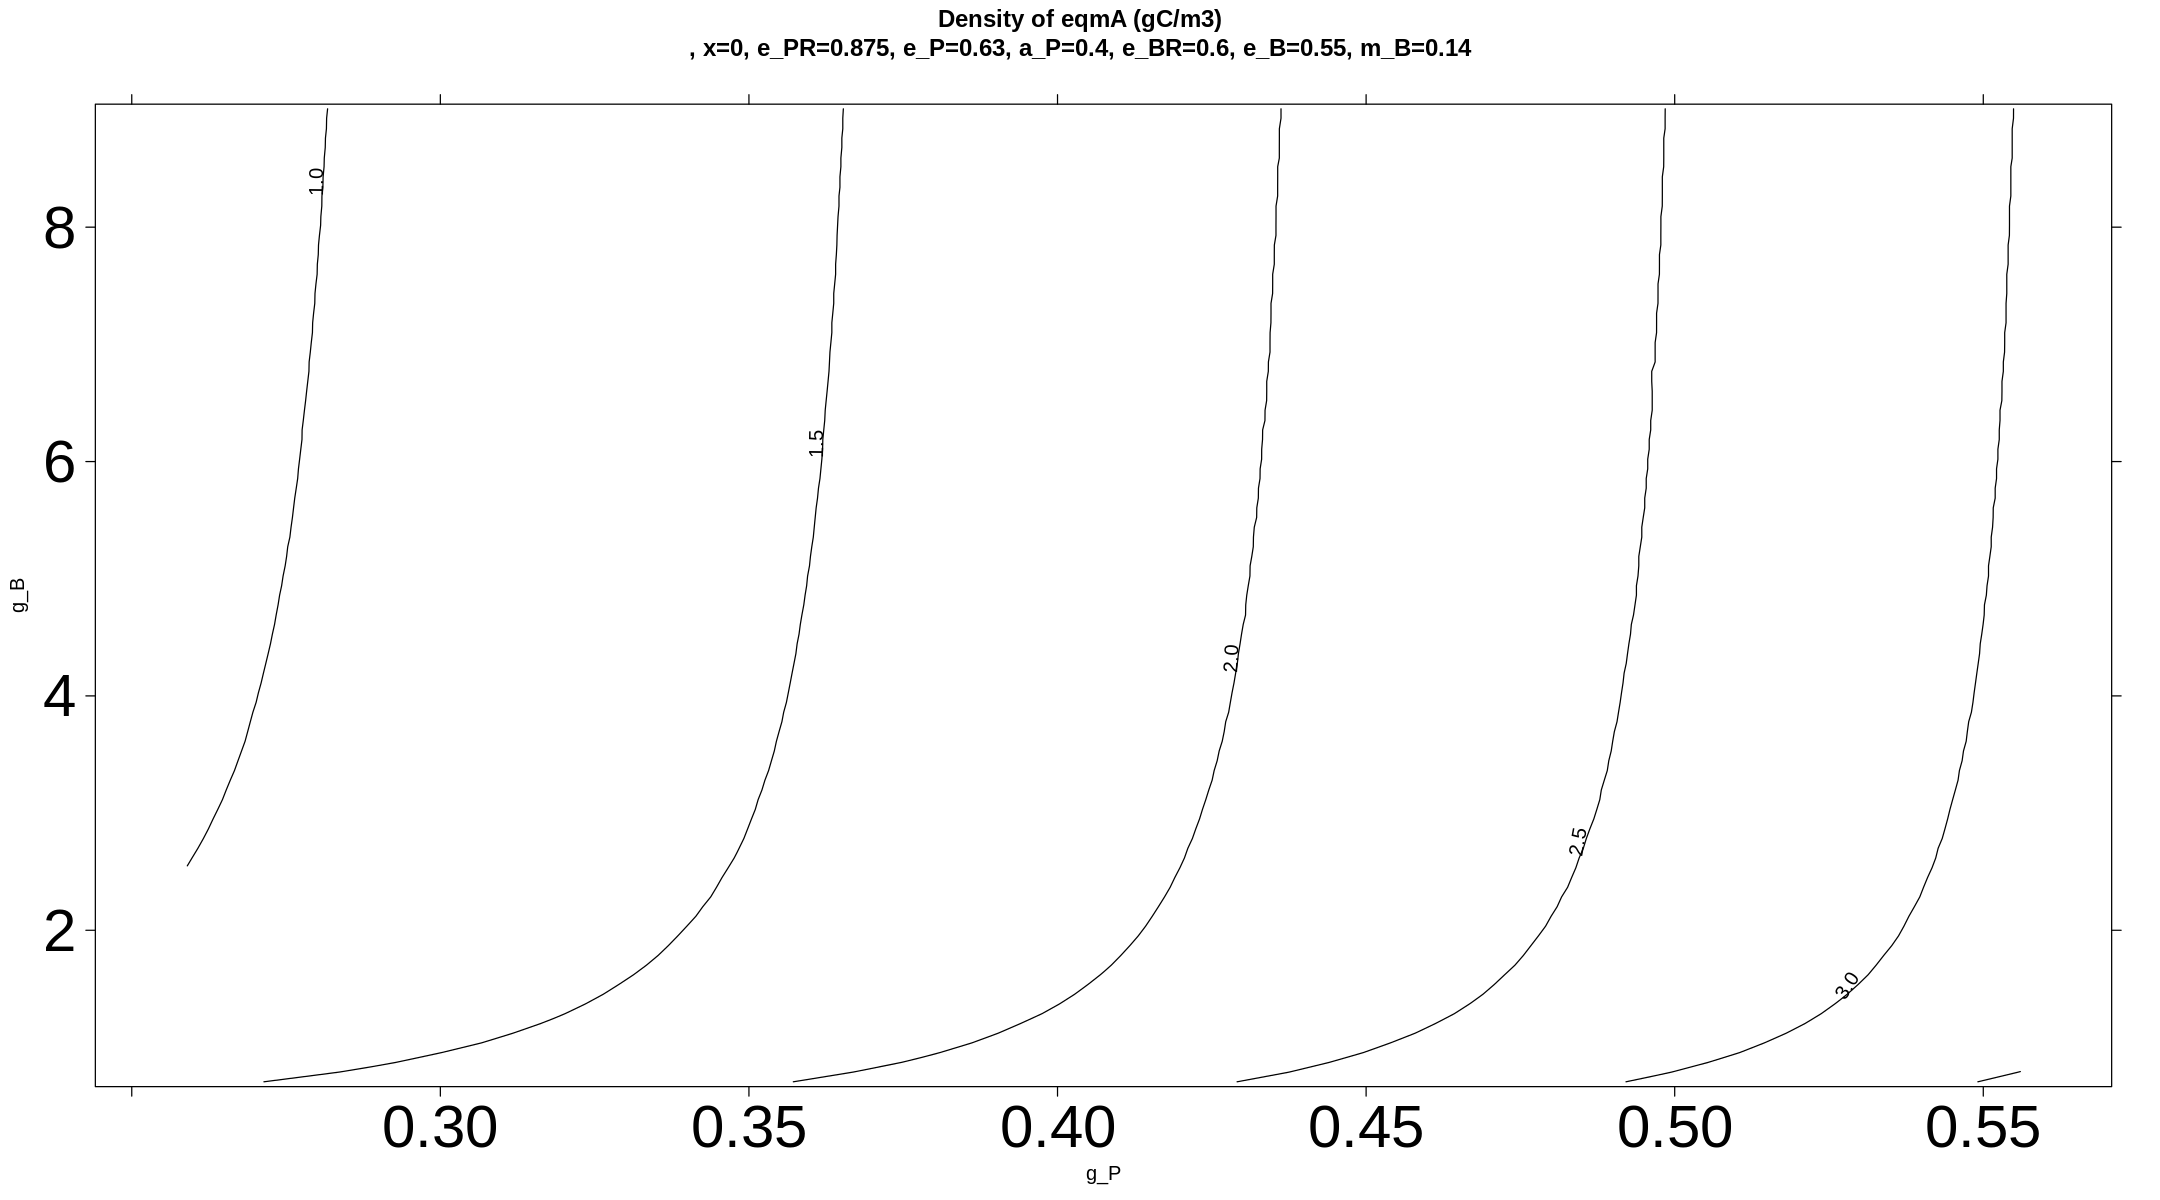

In [38]:
gPBDefault(13,"l","h")

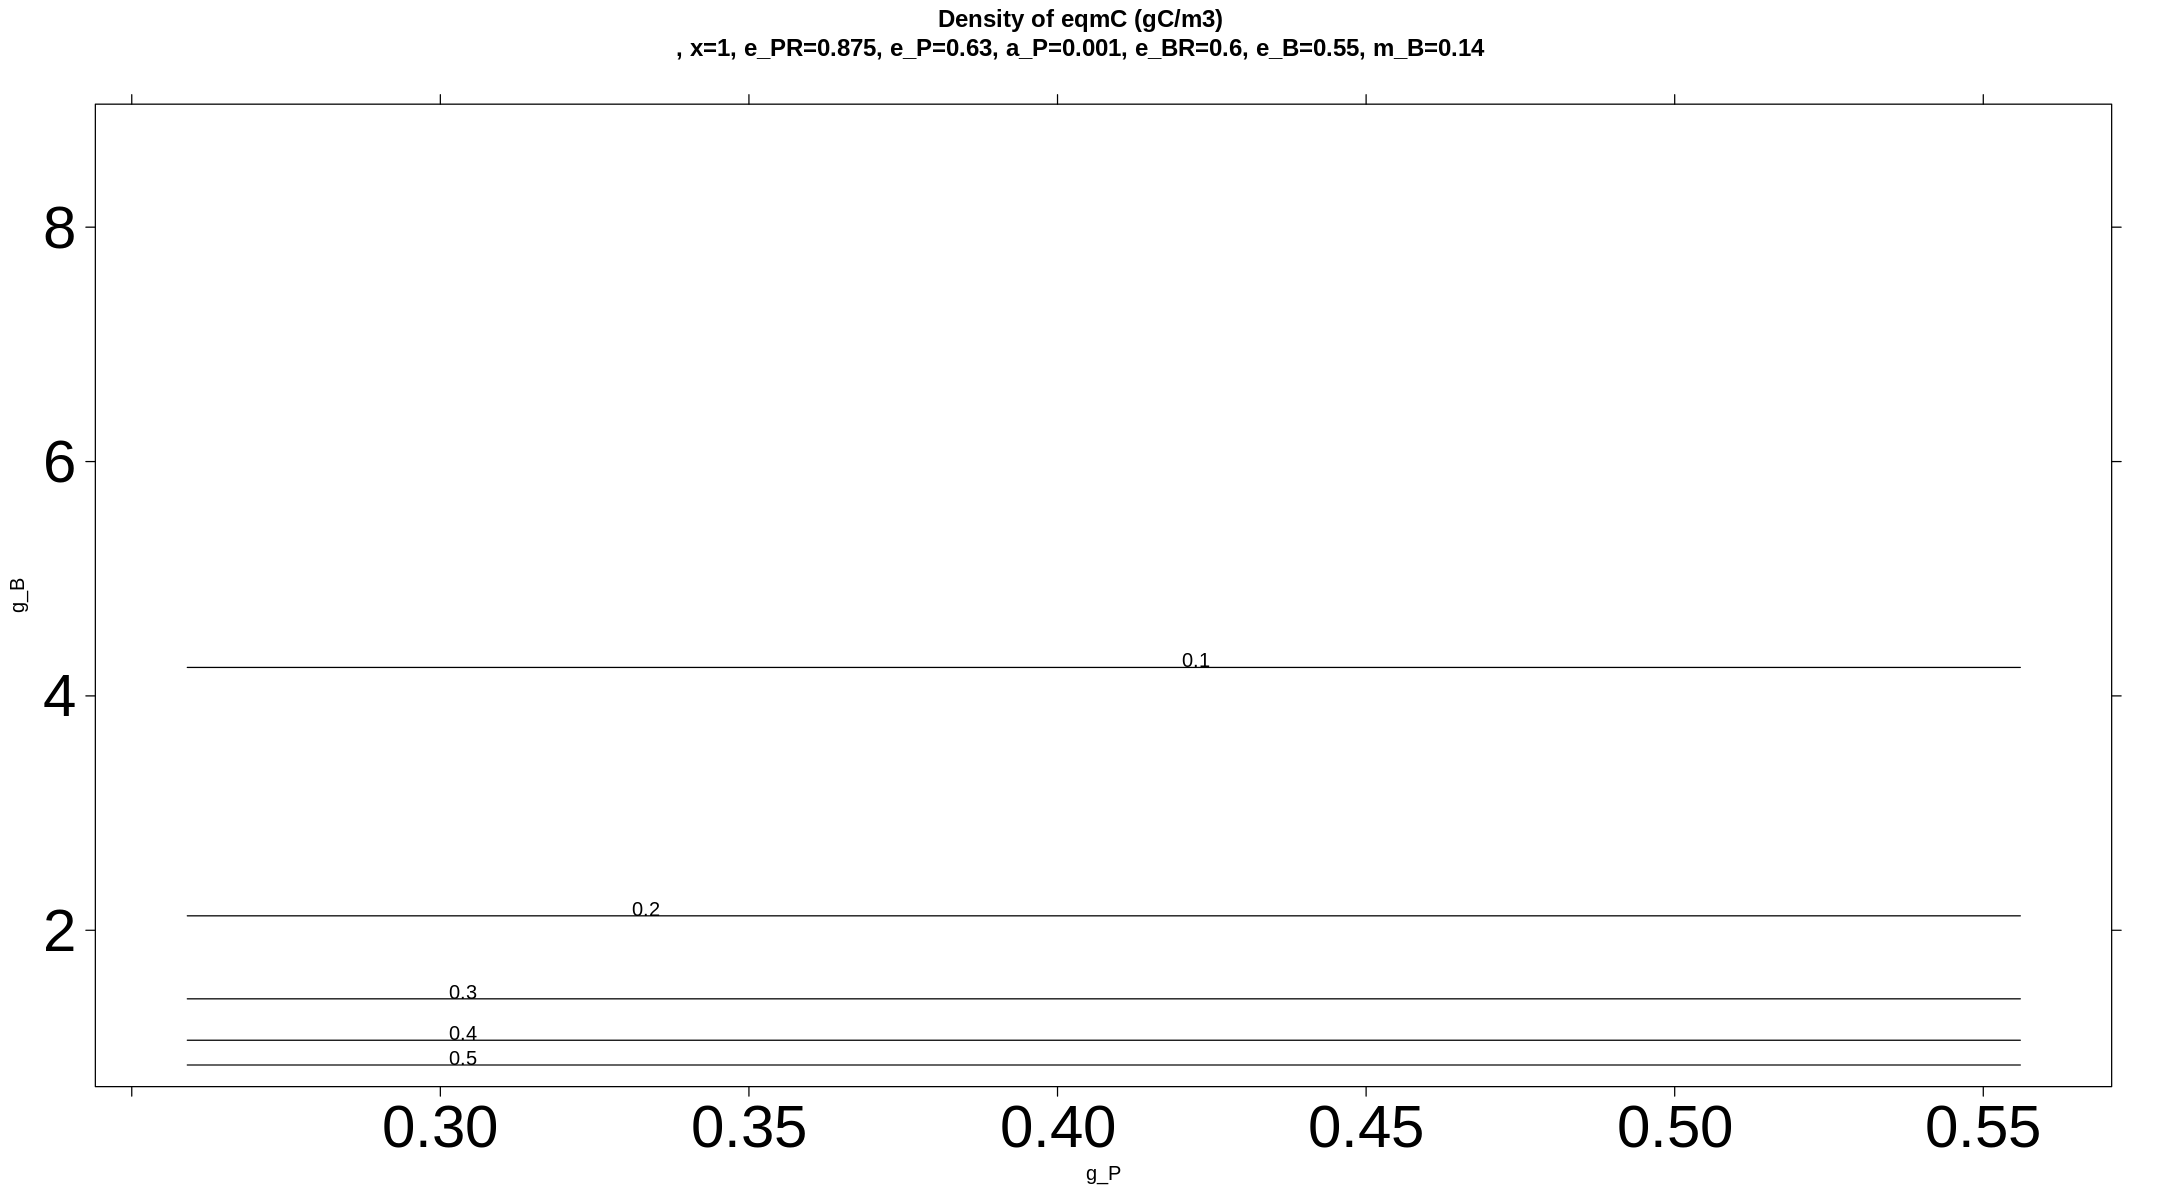

In [39]:
gPBDefault(10,"h","l")

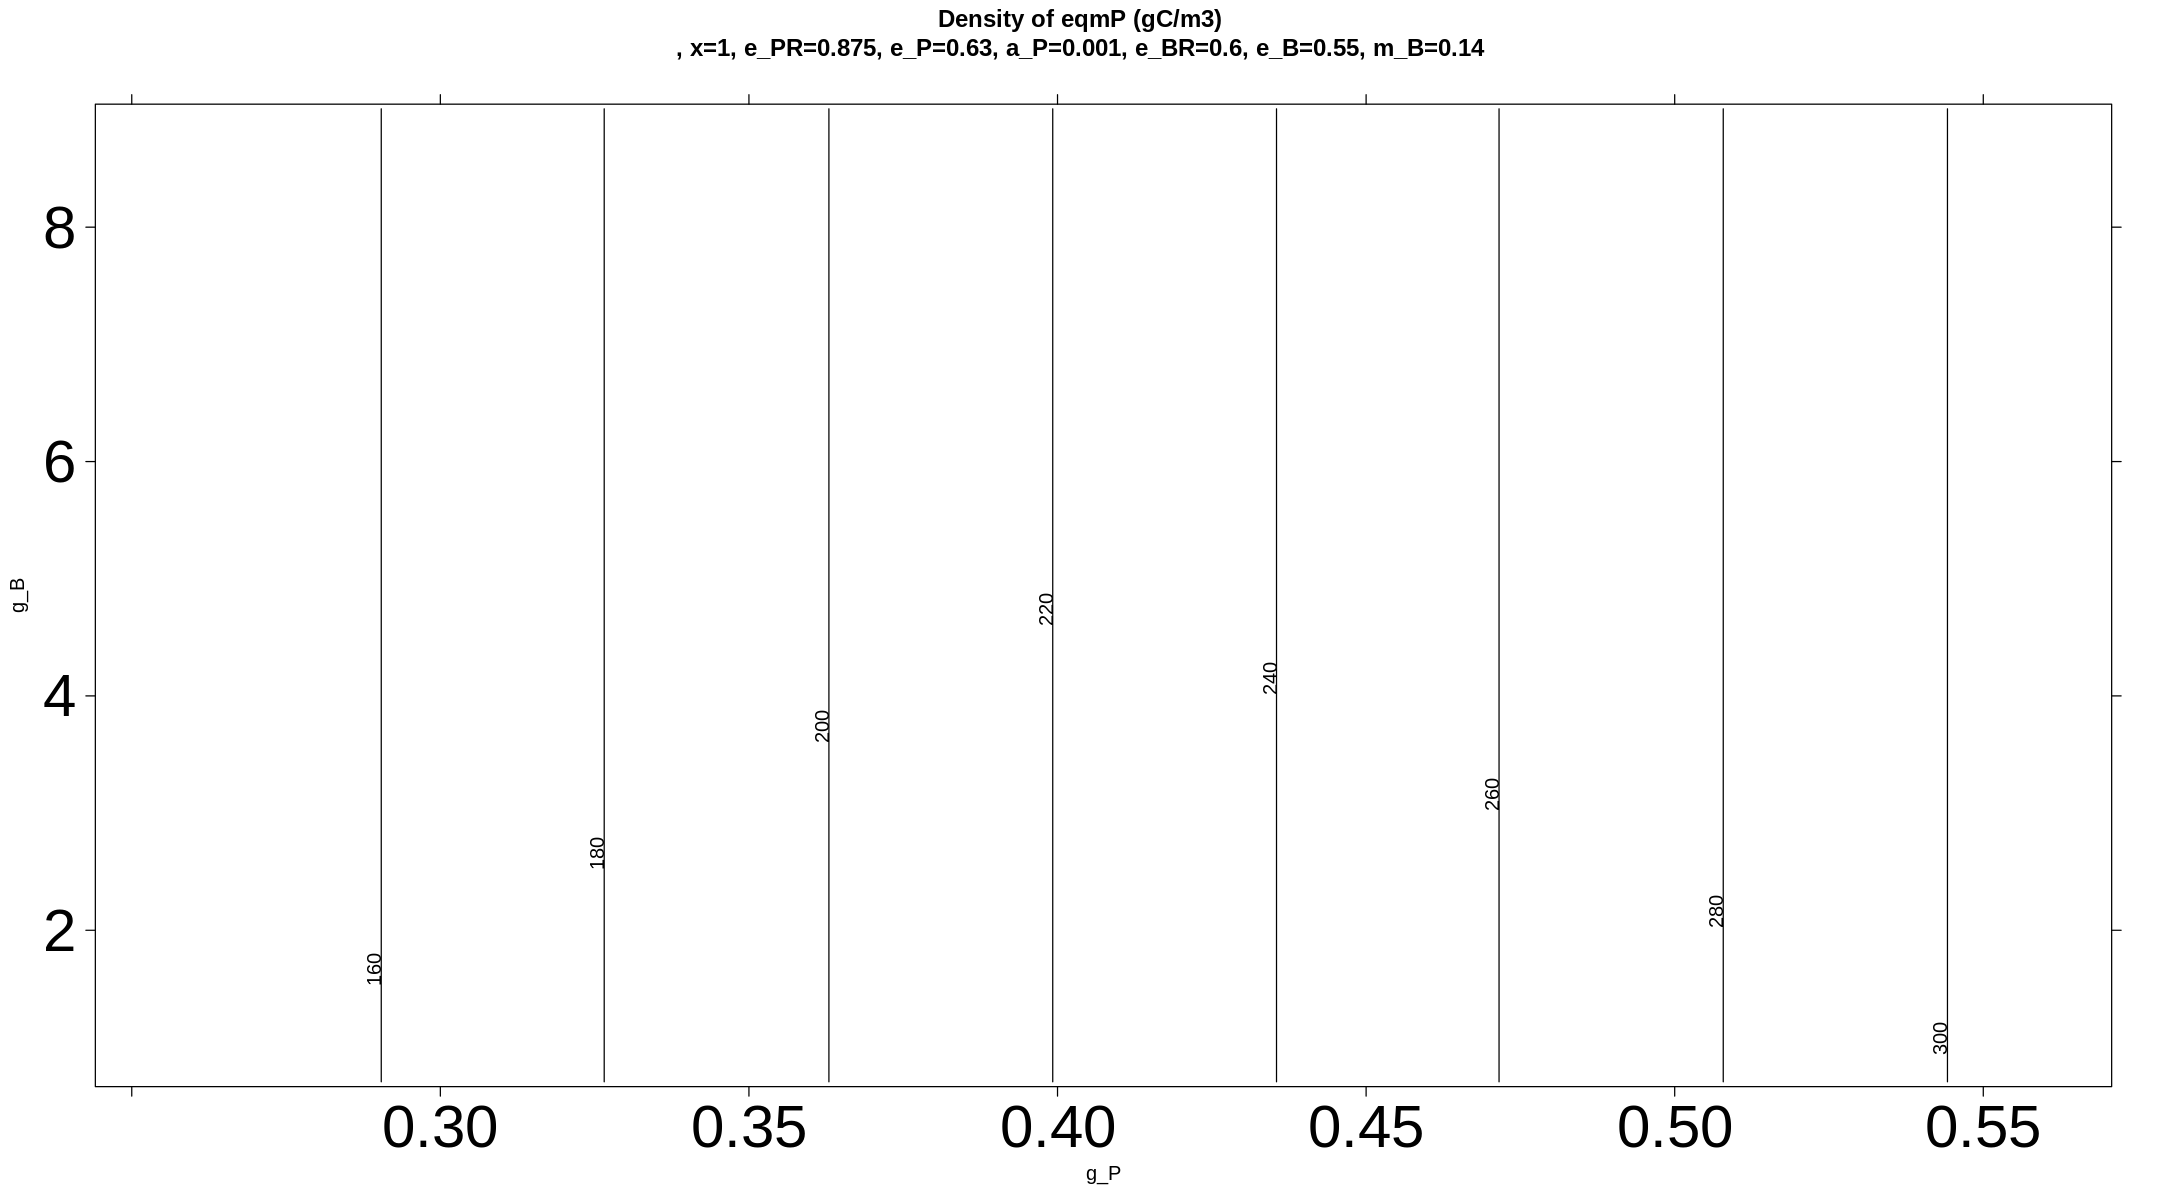

In [40]:
gPBDefault(11,"h","l")

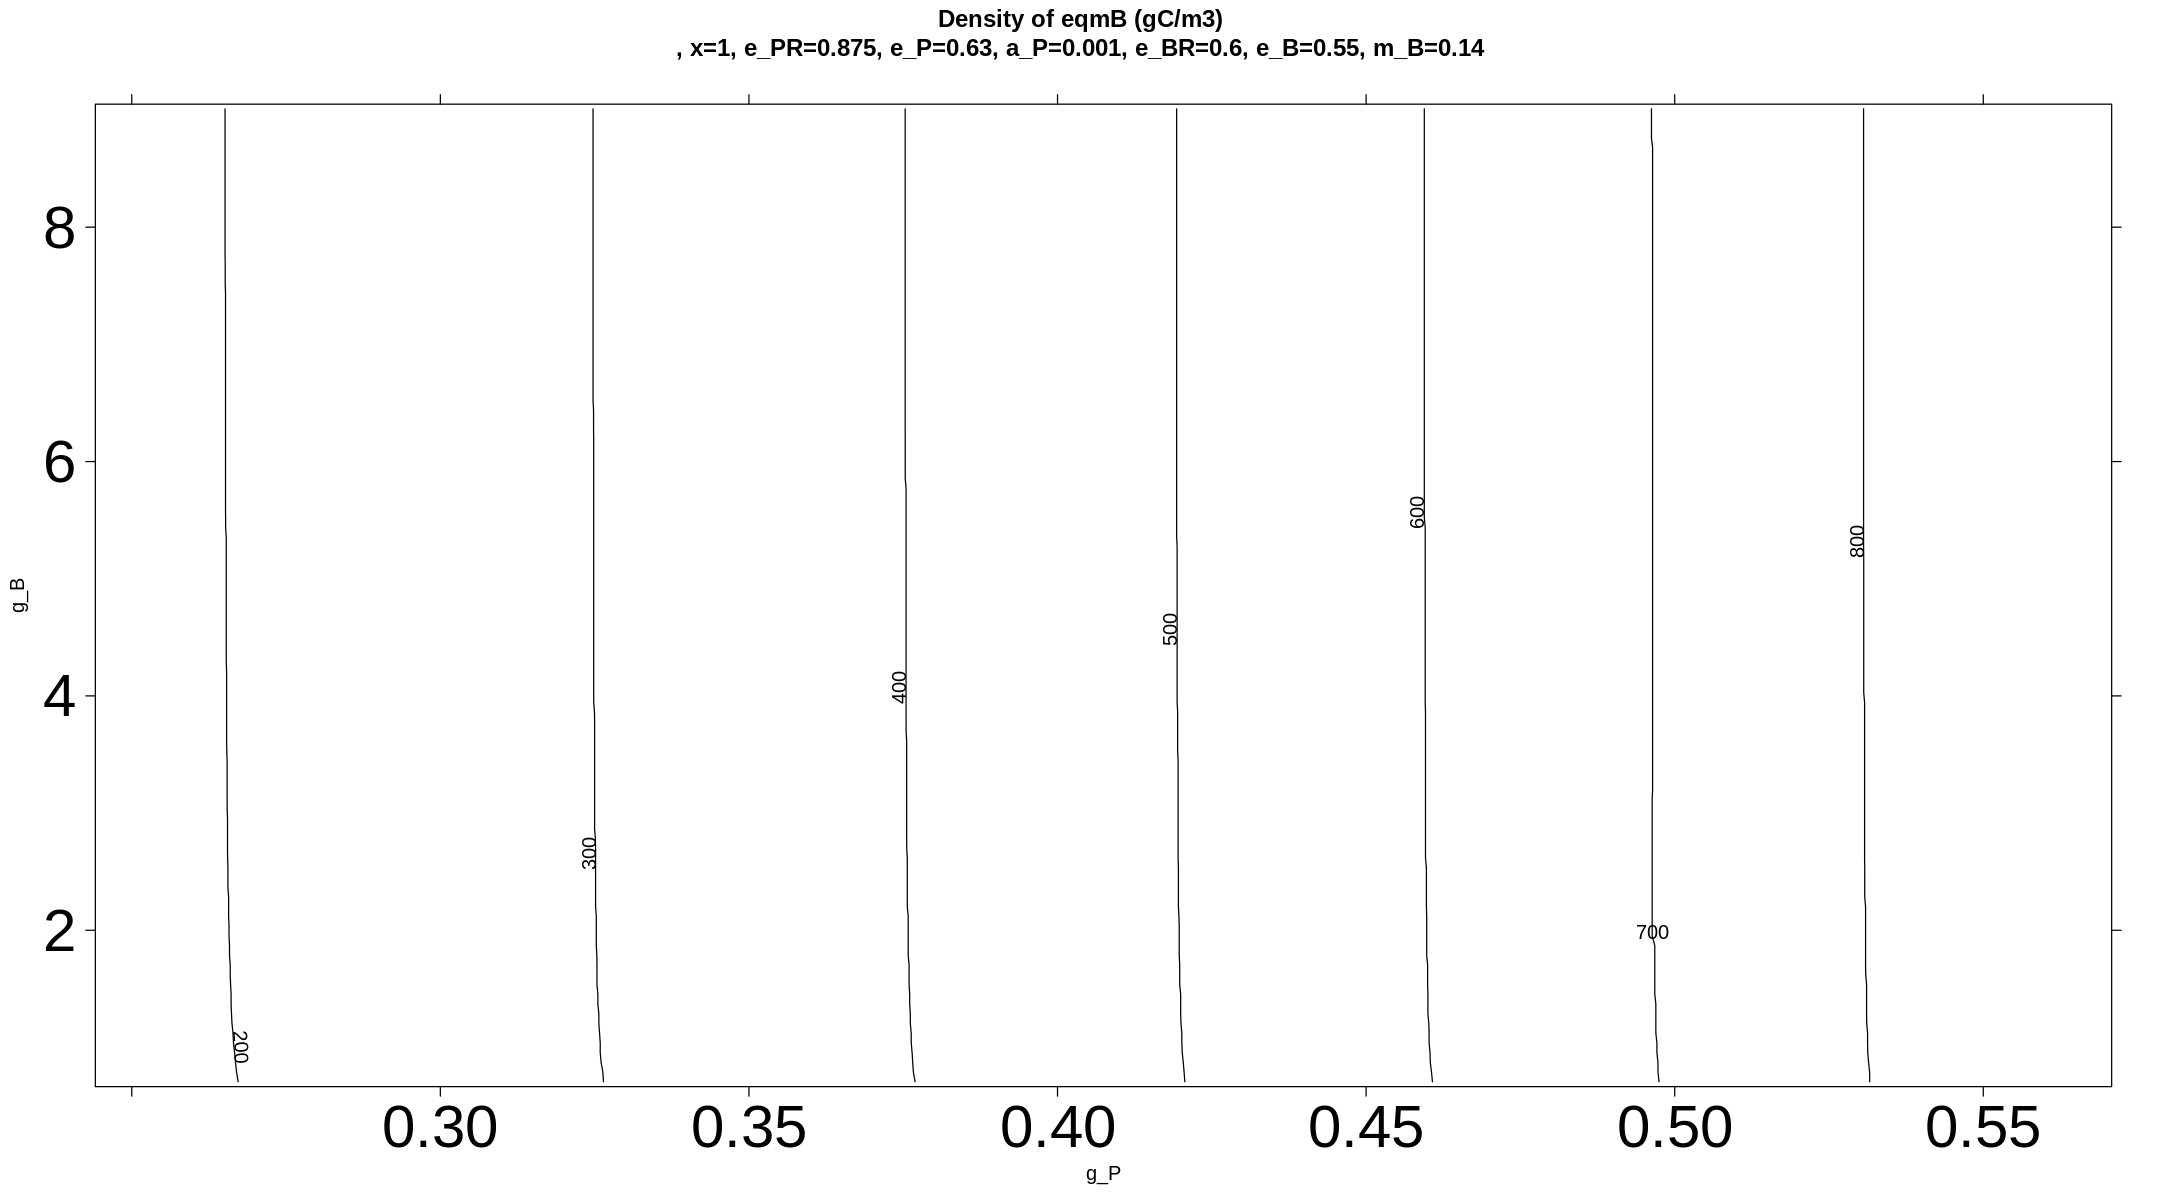

In [41]:
gPBDefault(12,"h","l")

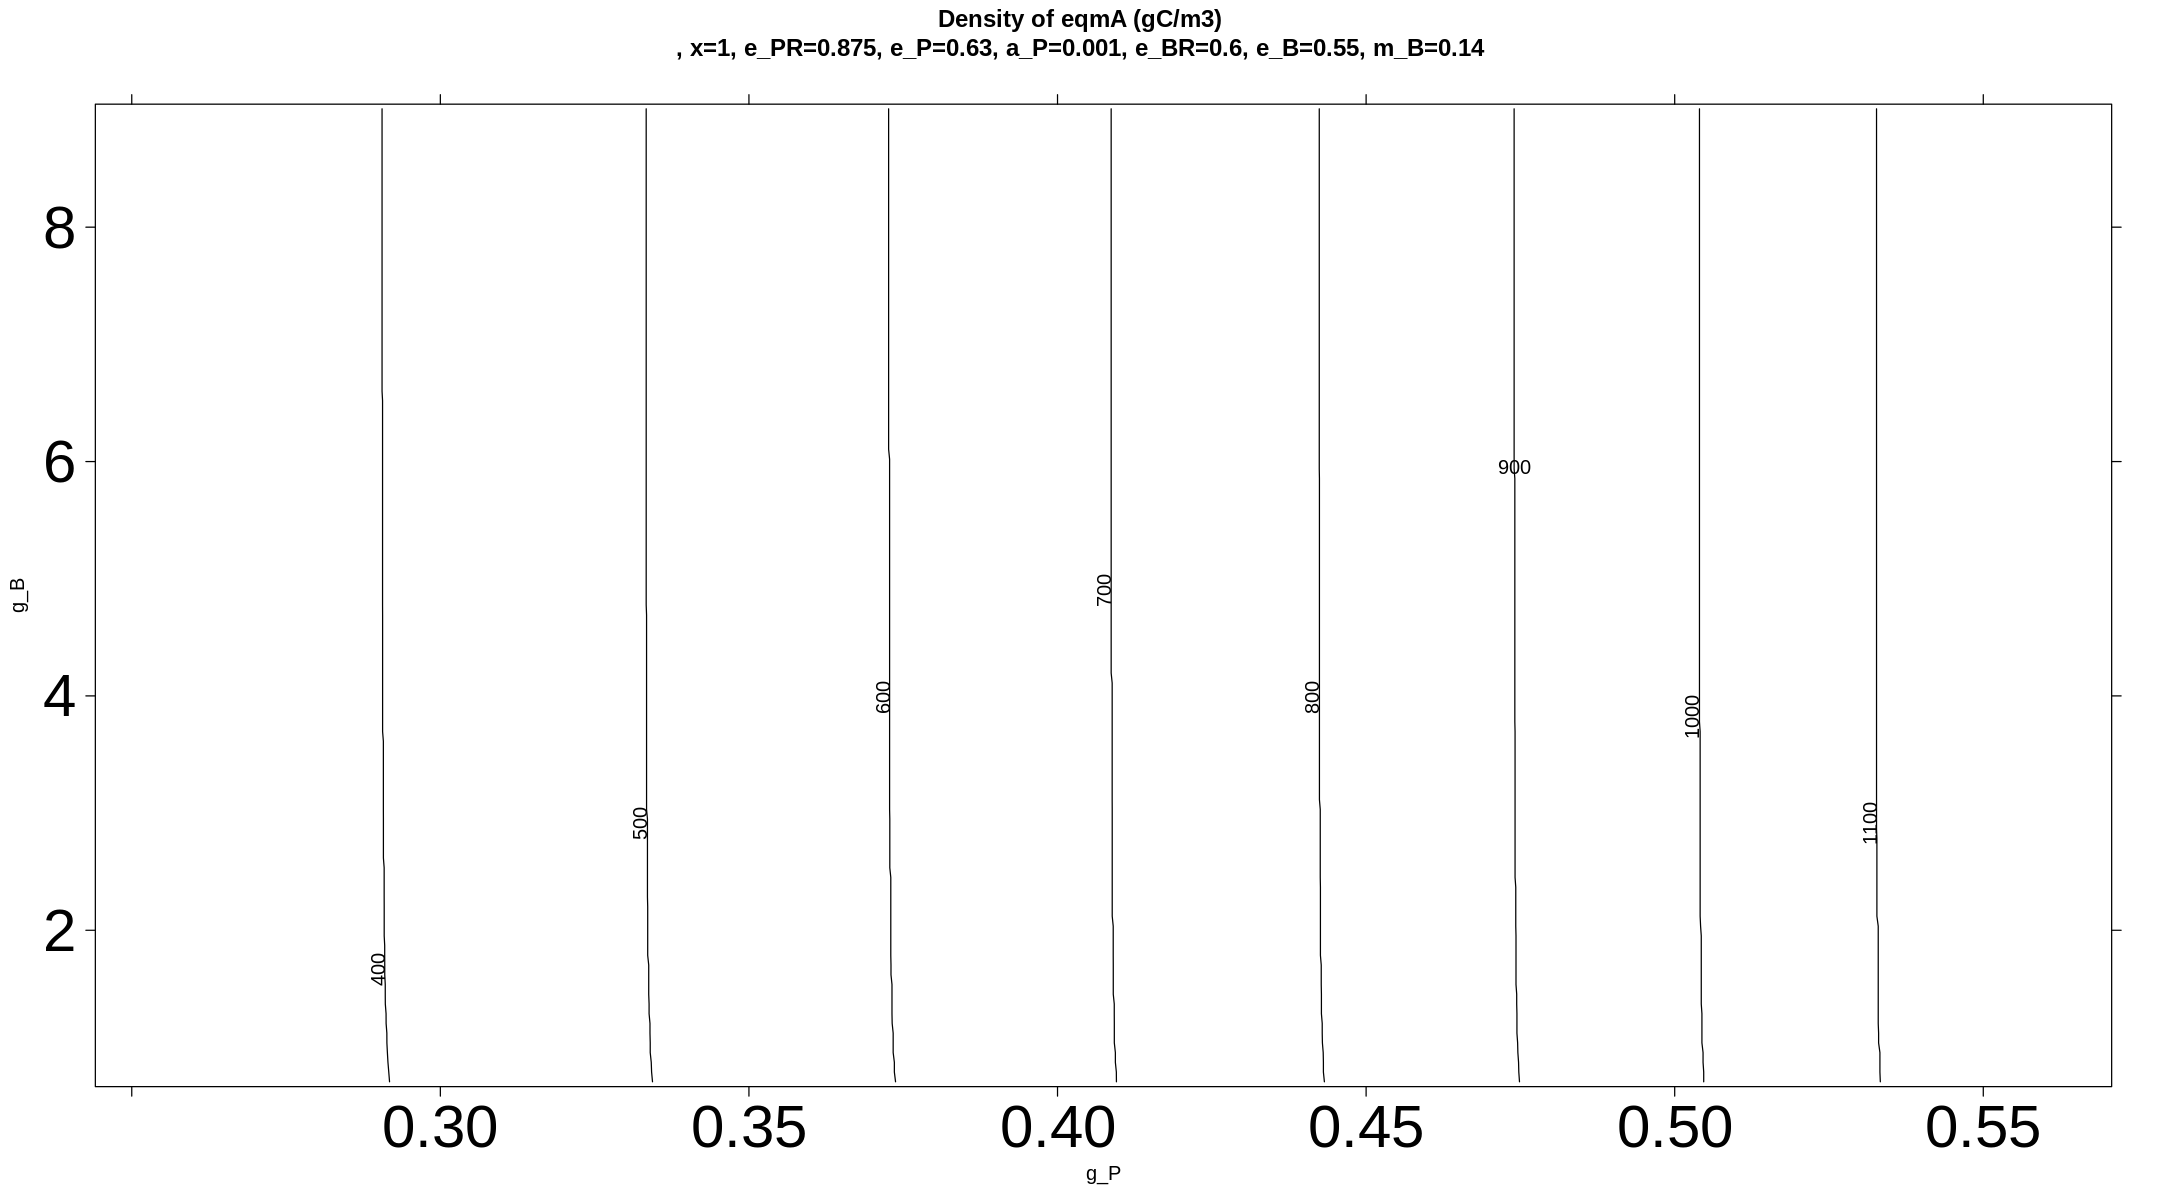

In [42]:
gPBDefault(13,"h","l")

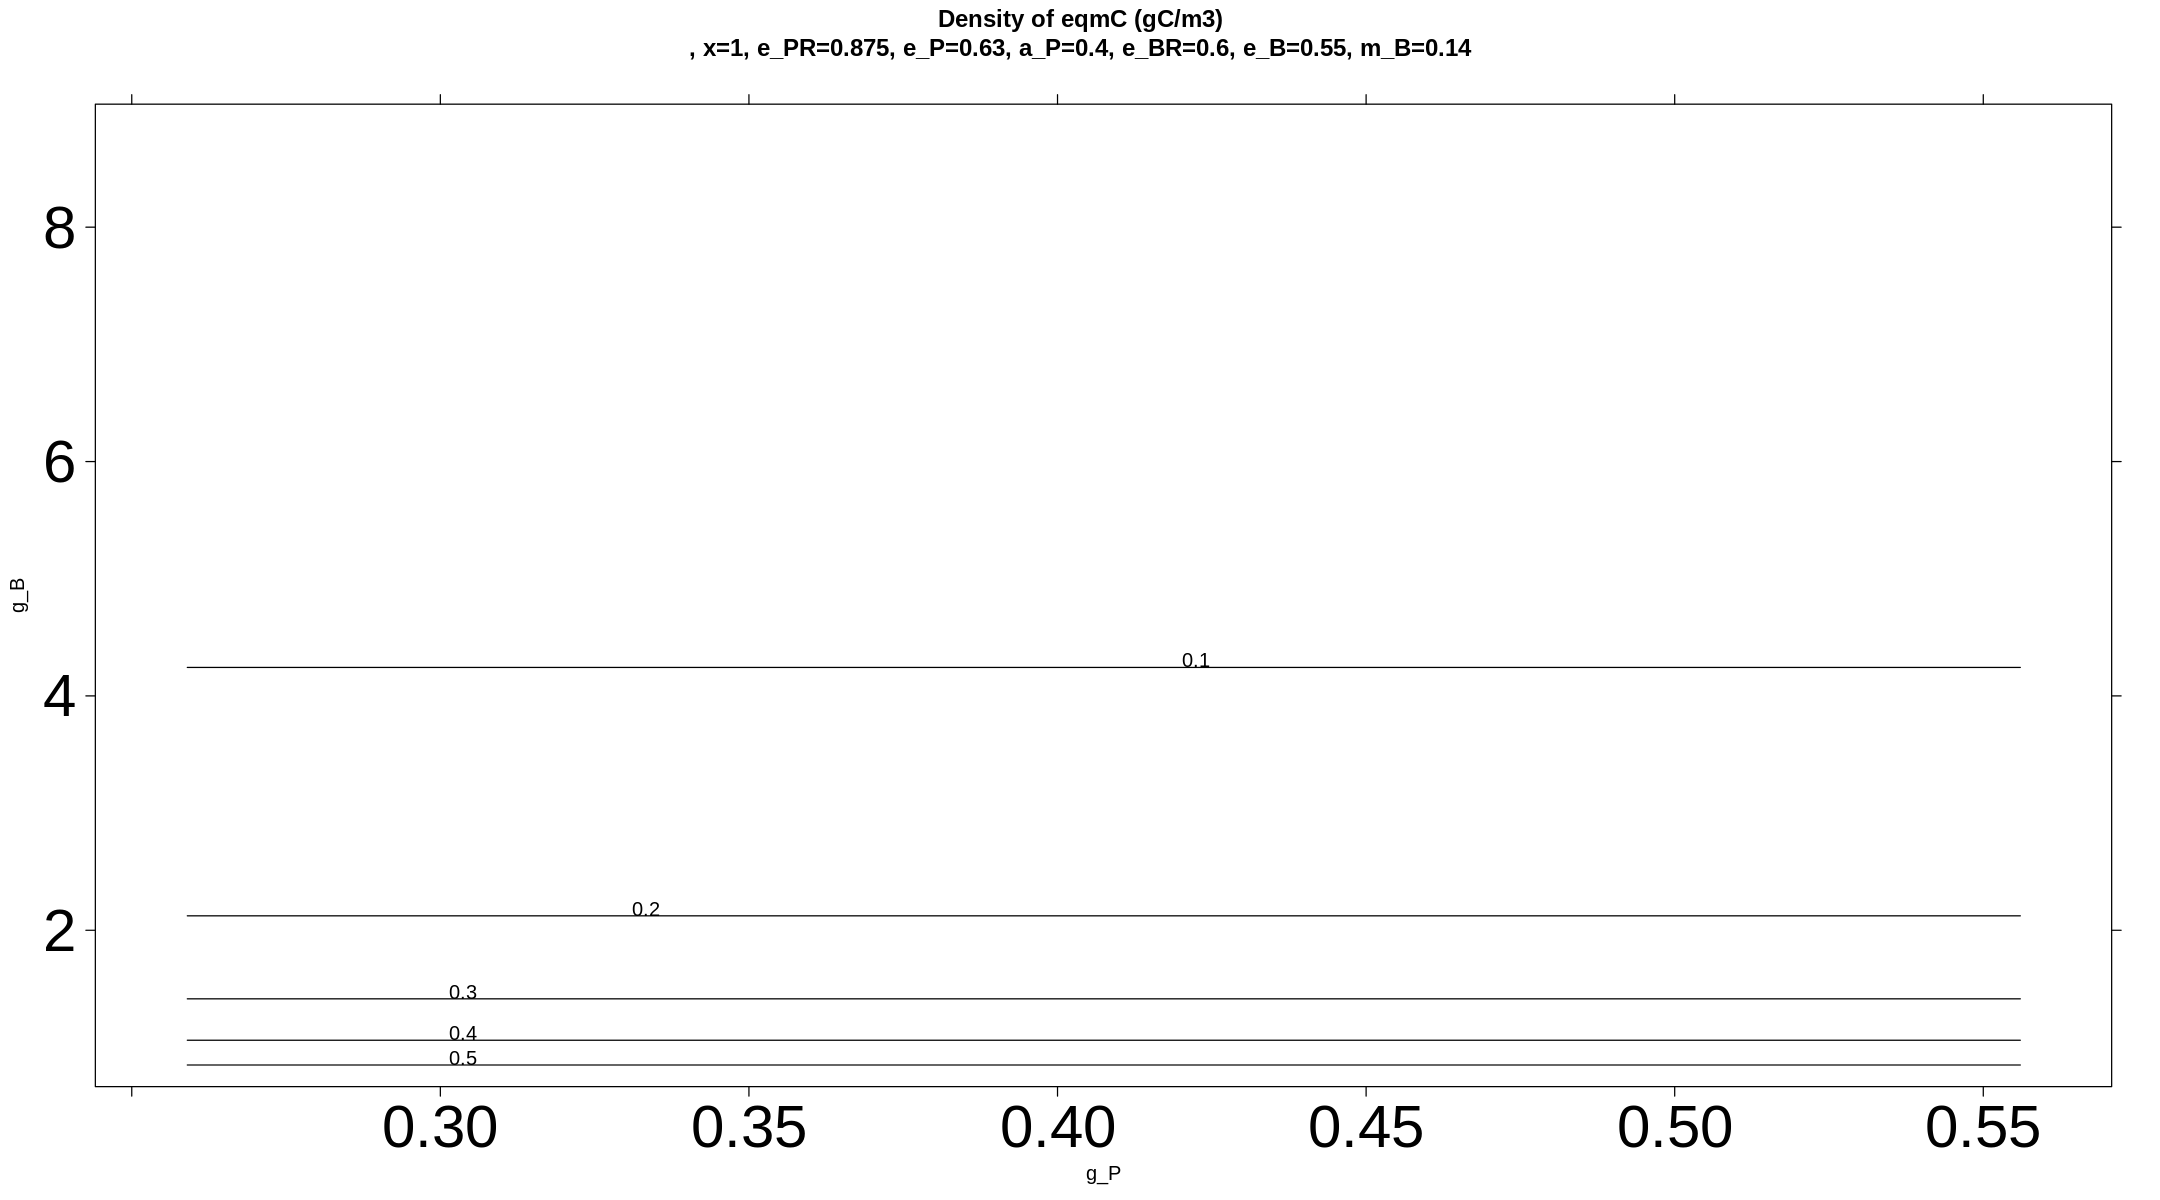

In [43]:
gPBDefault(10,"h","h")

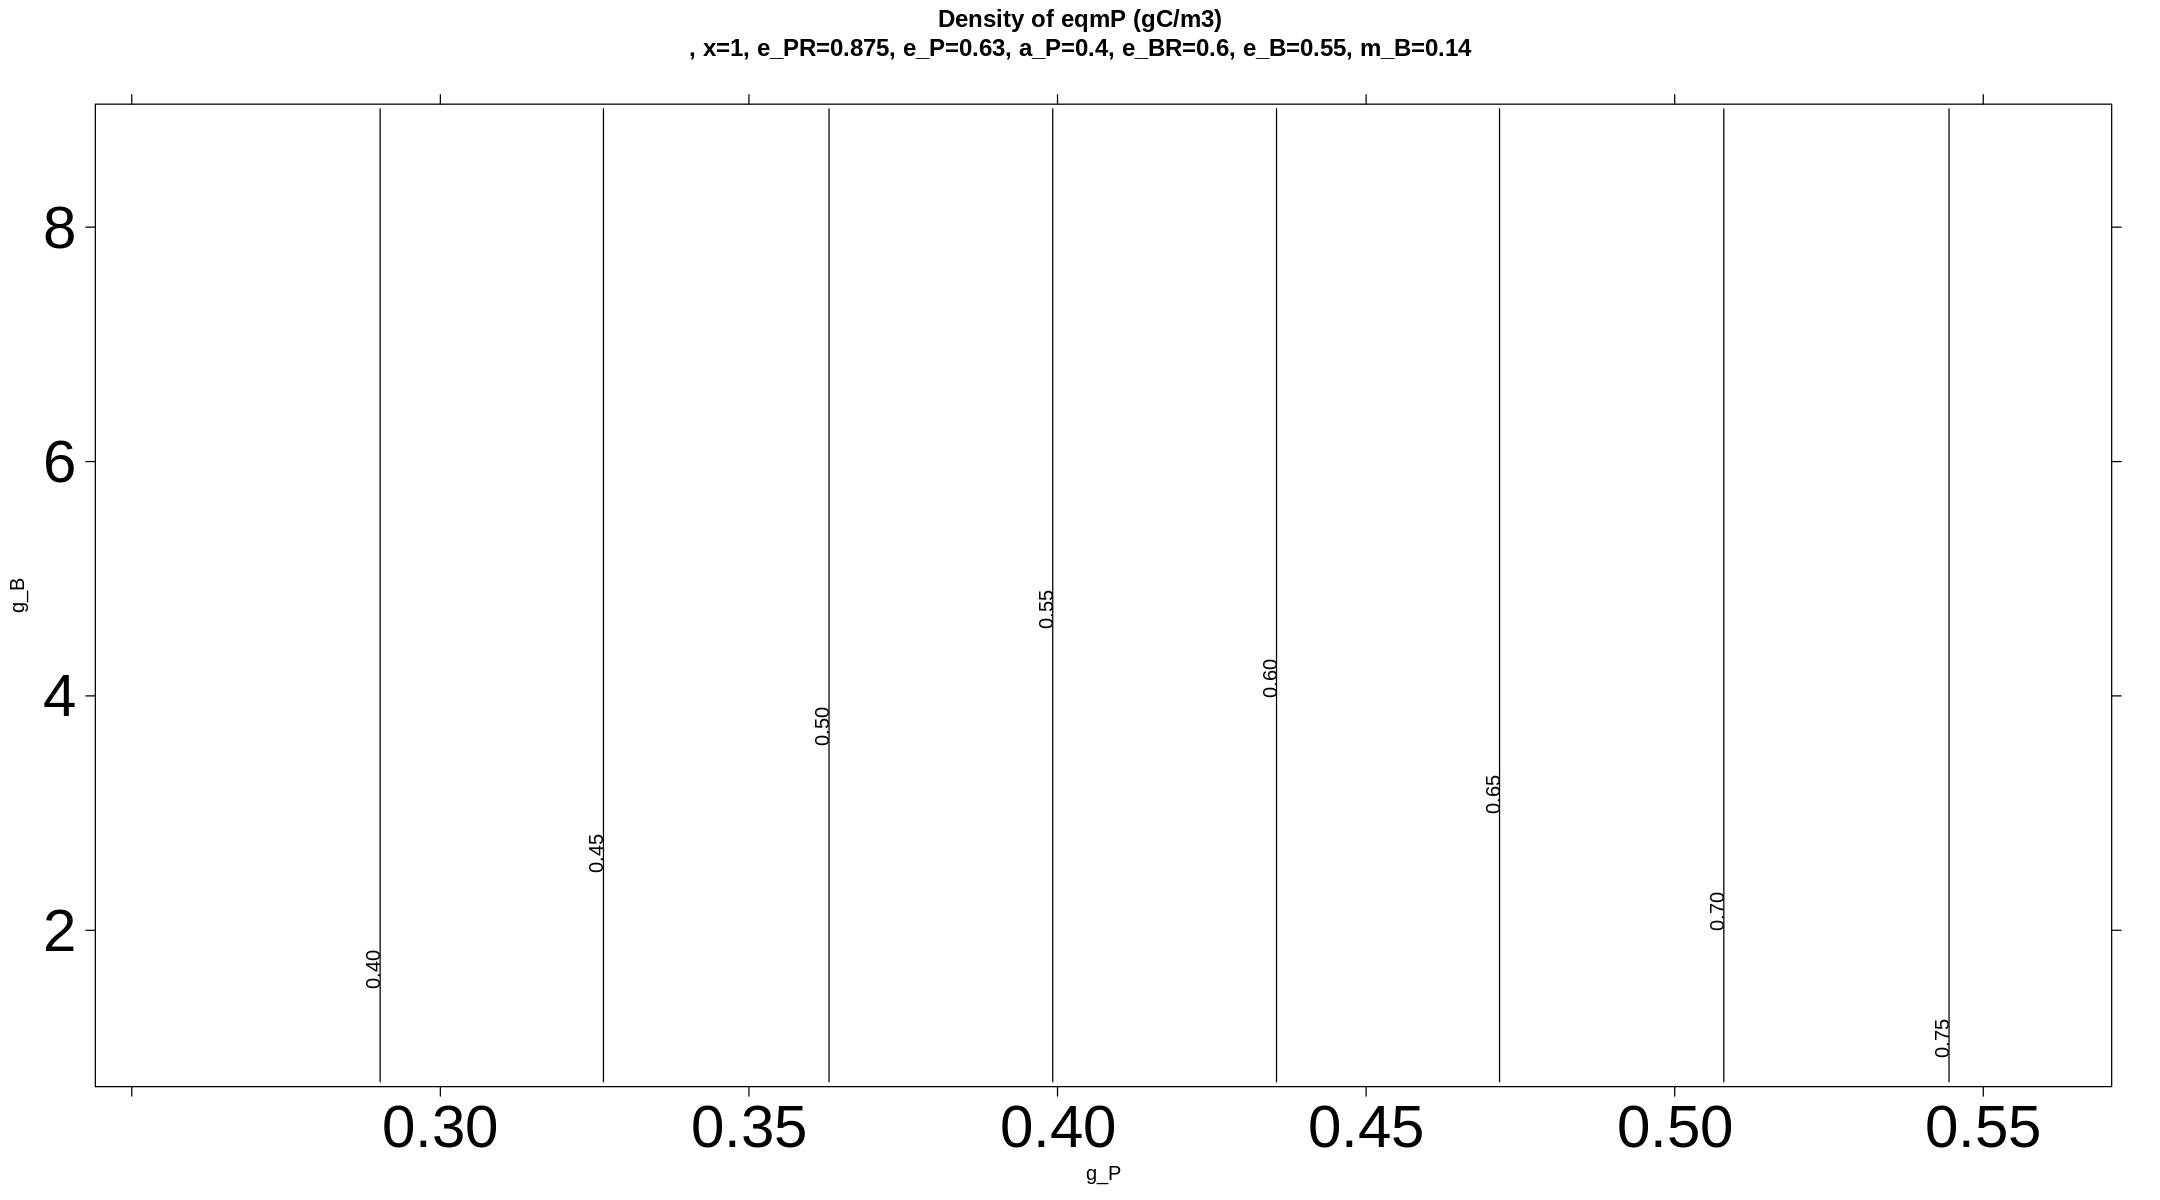

In [44]:
gPBDefault(11,"h","h")

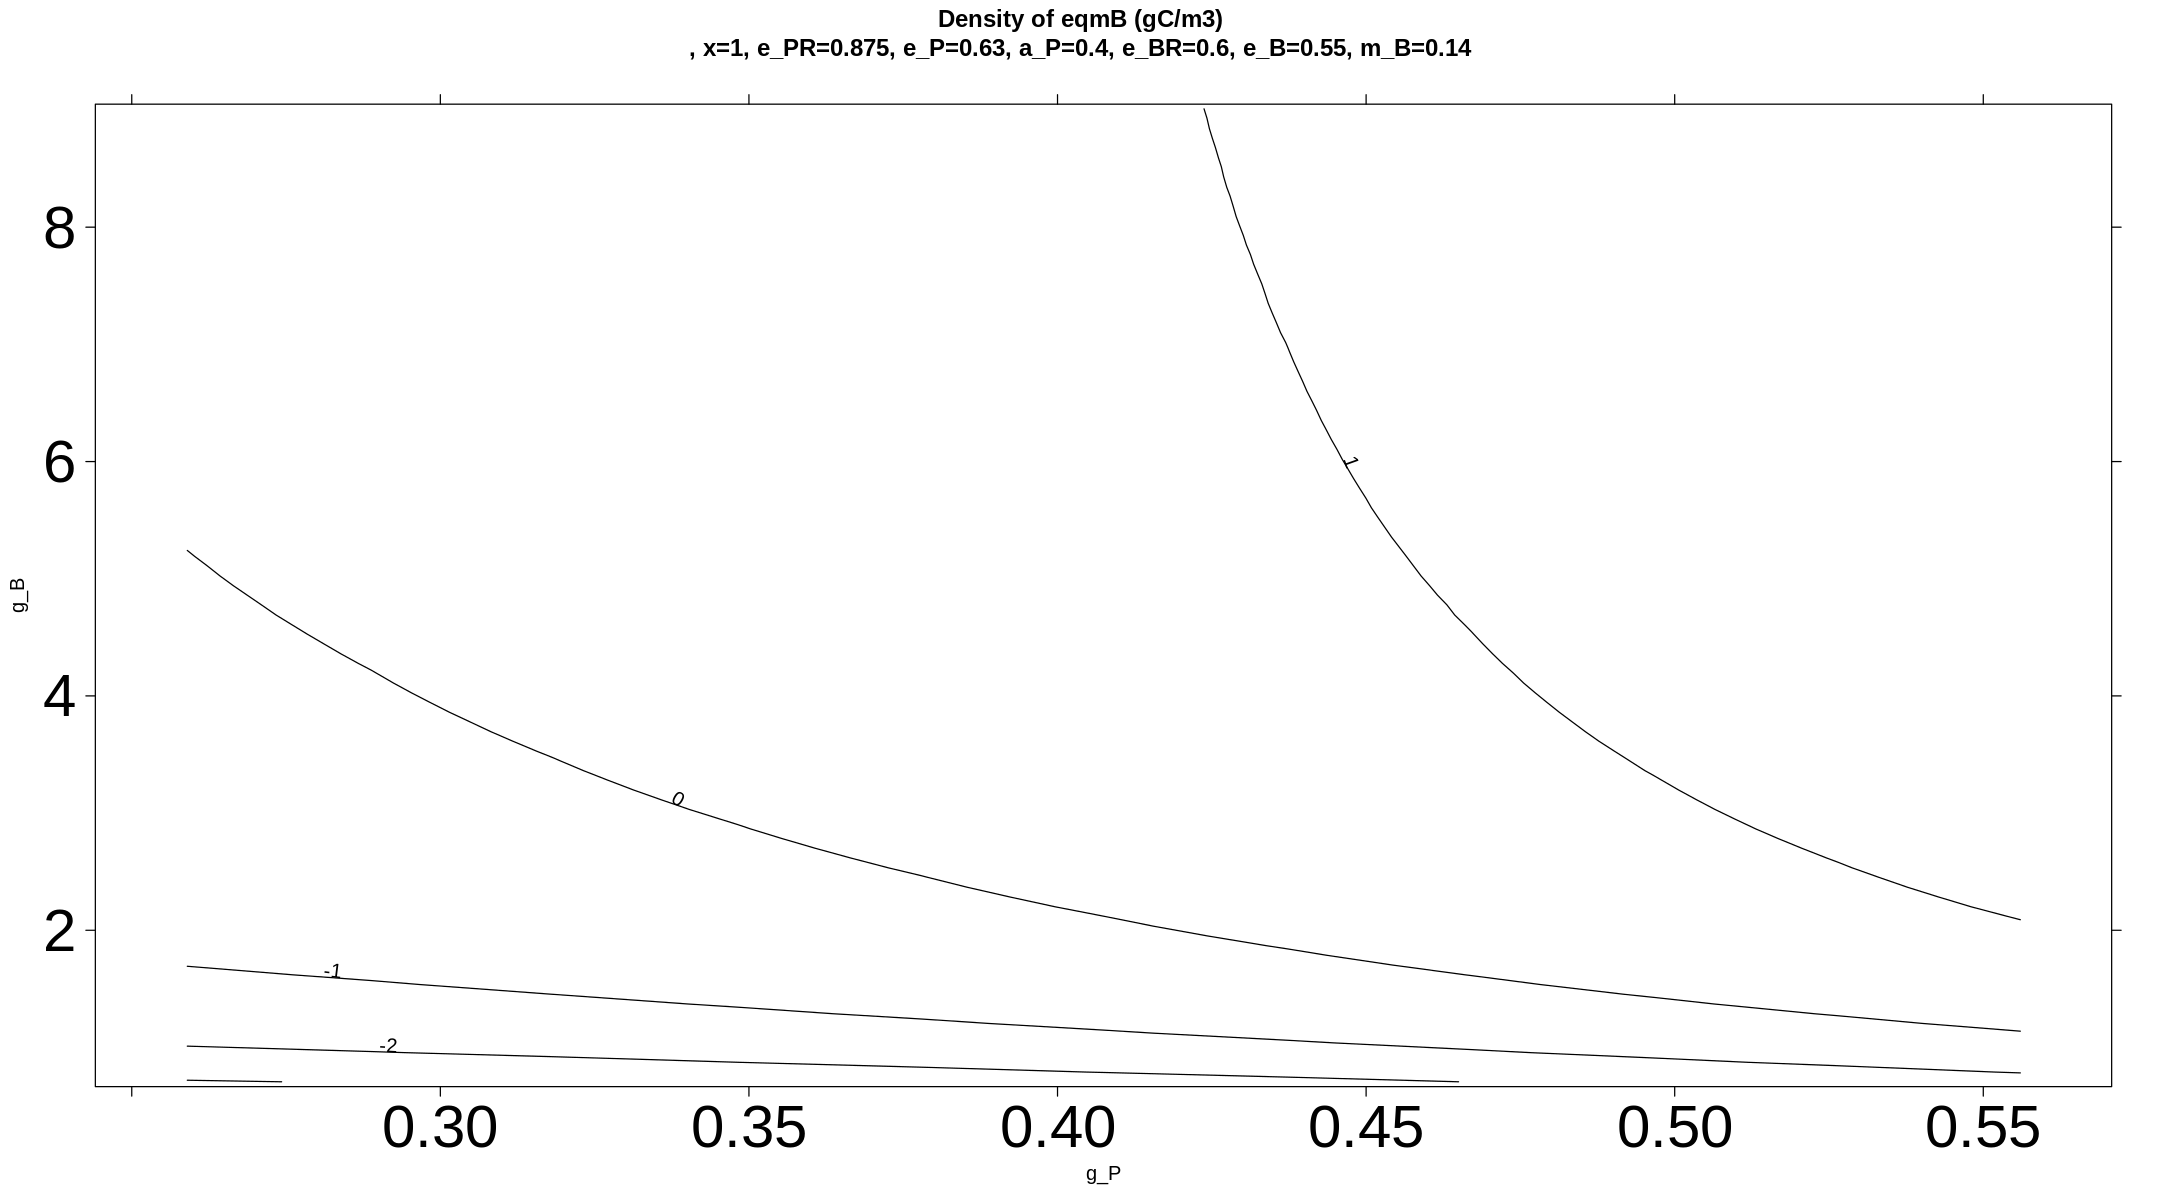

In [45]:
gPBDefault(12,"h","h")

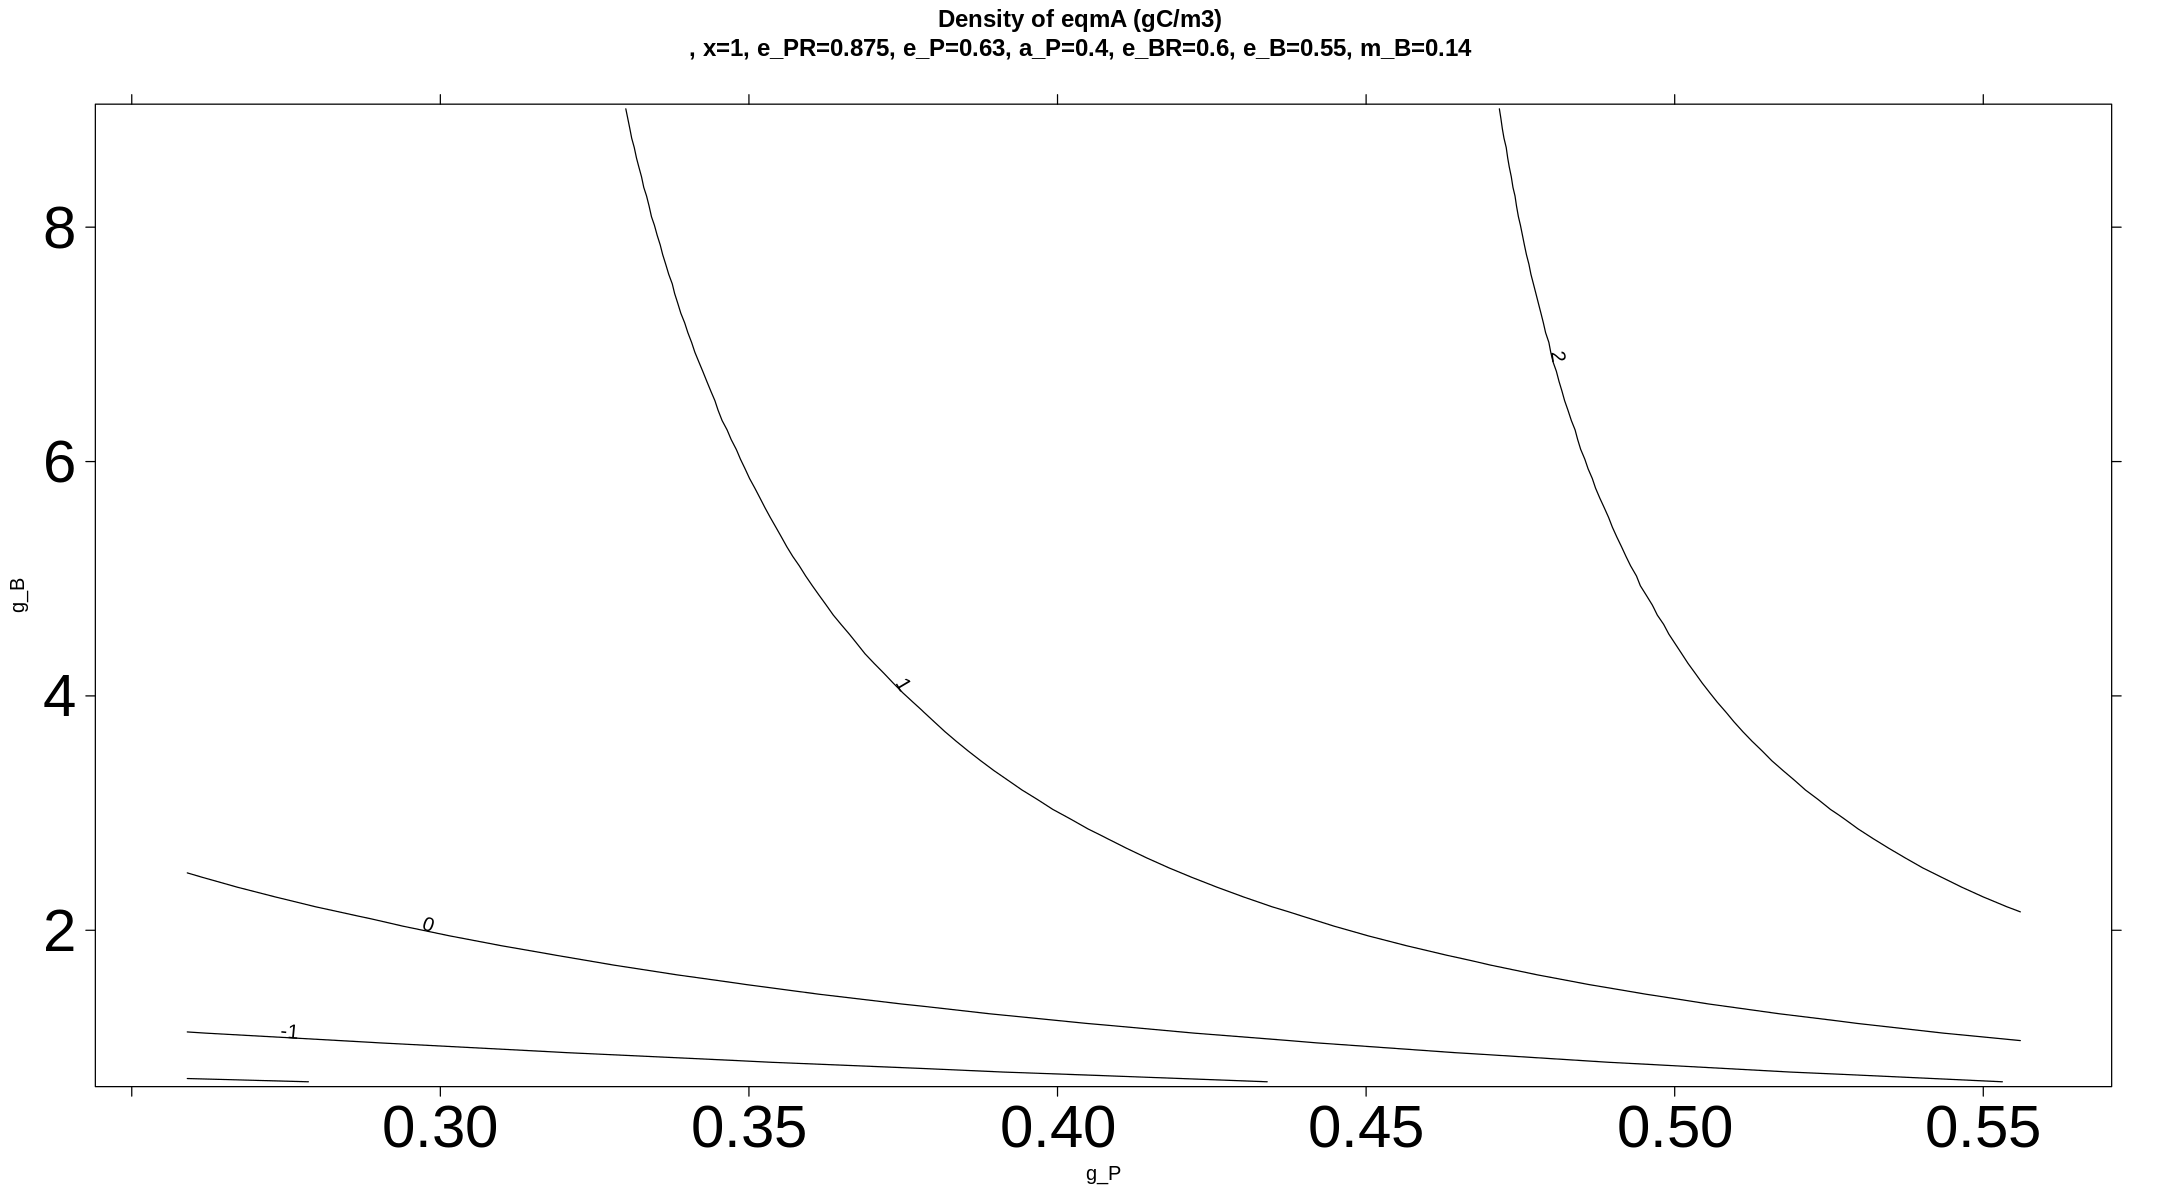

In [46]:
gPBDefault(13,"h","h")

# discrepancies between analytical and numerical solutions
## env set-up

In [47]:
dIff = as.data.frame(matrix(NA,nr=nrow(rAw),nc=4))

## functions (similar to that in section 1)

In [48]:
ebcData = function(endTime=1e3, iniPop=1e-3, parameter=c(0,.875,.63,.259,.001,.6,.55,1.046,.14)){#iniPop=1e-12
    ## env setting
    tIme = seq(0,endTime,1)
    pAra = c(x = parameter[1],
             e_PR = parameter[2], e_P = parameter[3], g_P = parameter[4], a_P = parameter[5],
             e_BR = parameter[6], e_B = parameter[7], g_B = parameter[8], m_B = parameter[9])
    pops = c(C = iniPop, P = iniPop, B = iniPop)
    
    ## ode solve
    rEs = ode(y=pops, times=tIme, func=ebc7, parms=pAra)
    rEs = as.data.frame(rEs)
    rEs$total = rEs$C+rEs$P+rEs$B
    
    return(rEs)
}

## discrepancies scan: in Rscript
https://github.com/ph-u/Project/blob/master/code/nDiff.R
## data import

In [49]:
tEx = "1e-3"
dIs = read.csv(paste0("../result/discrepancy_",tEx,".csv"), header = T)

## density plot of discrepancies

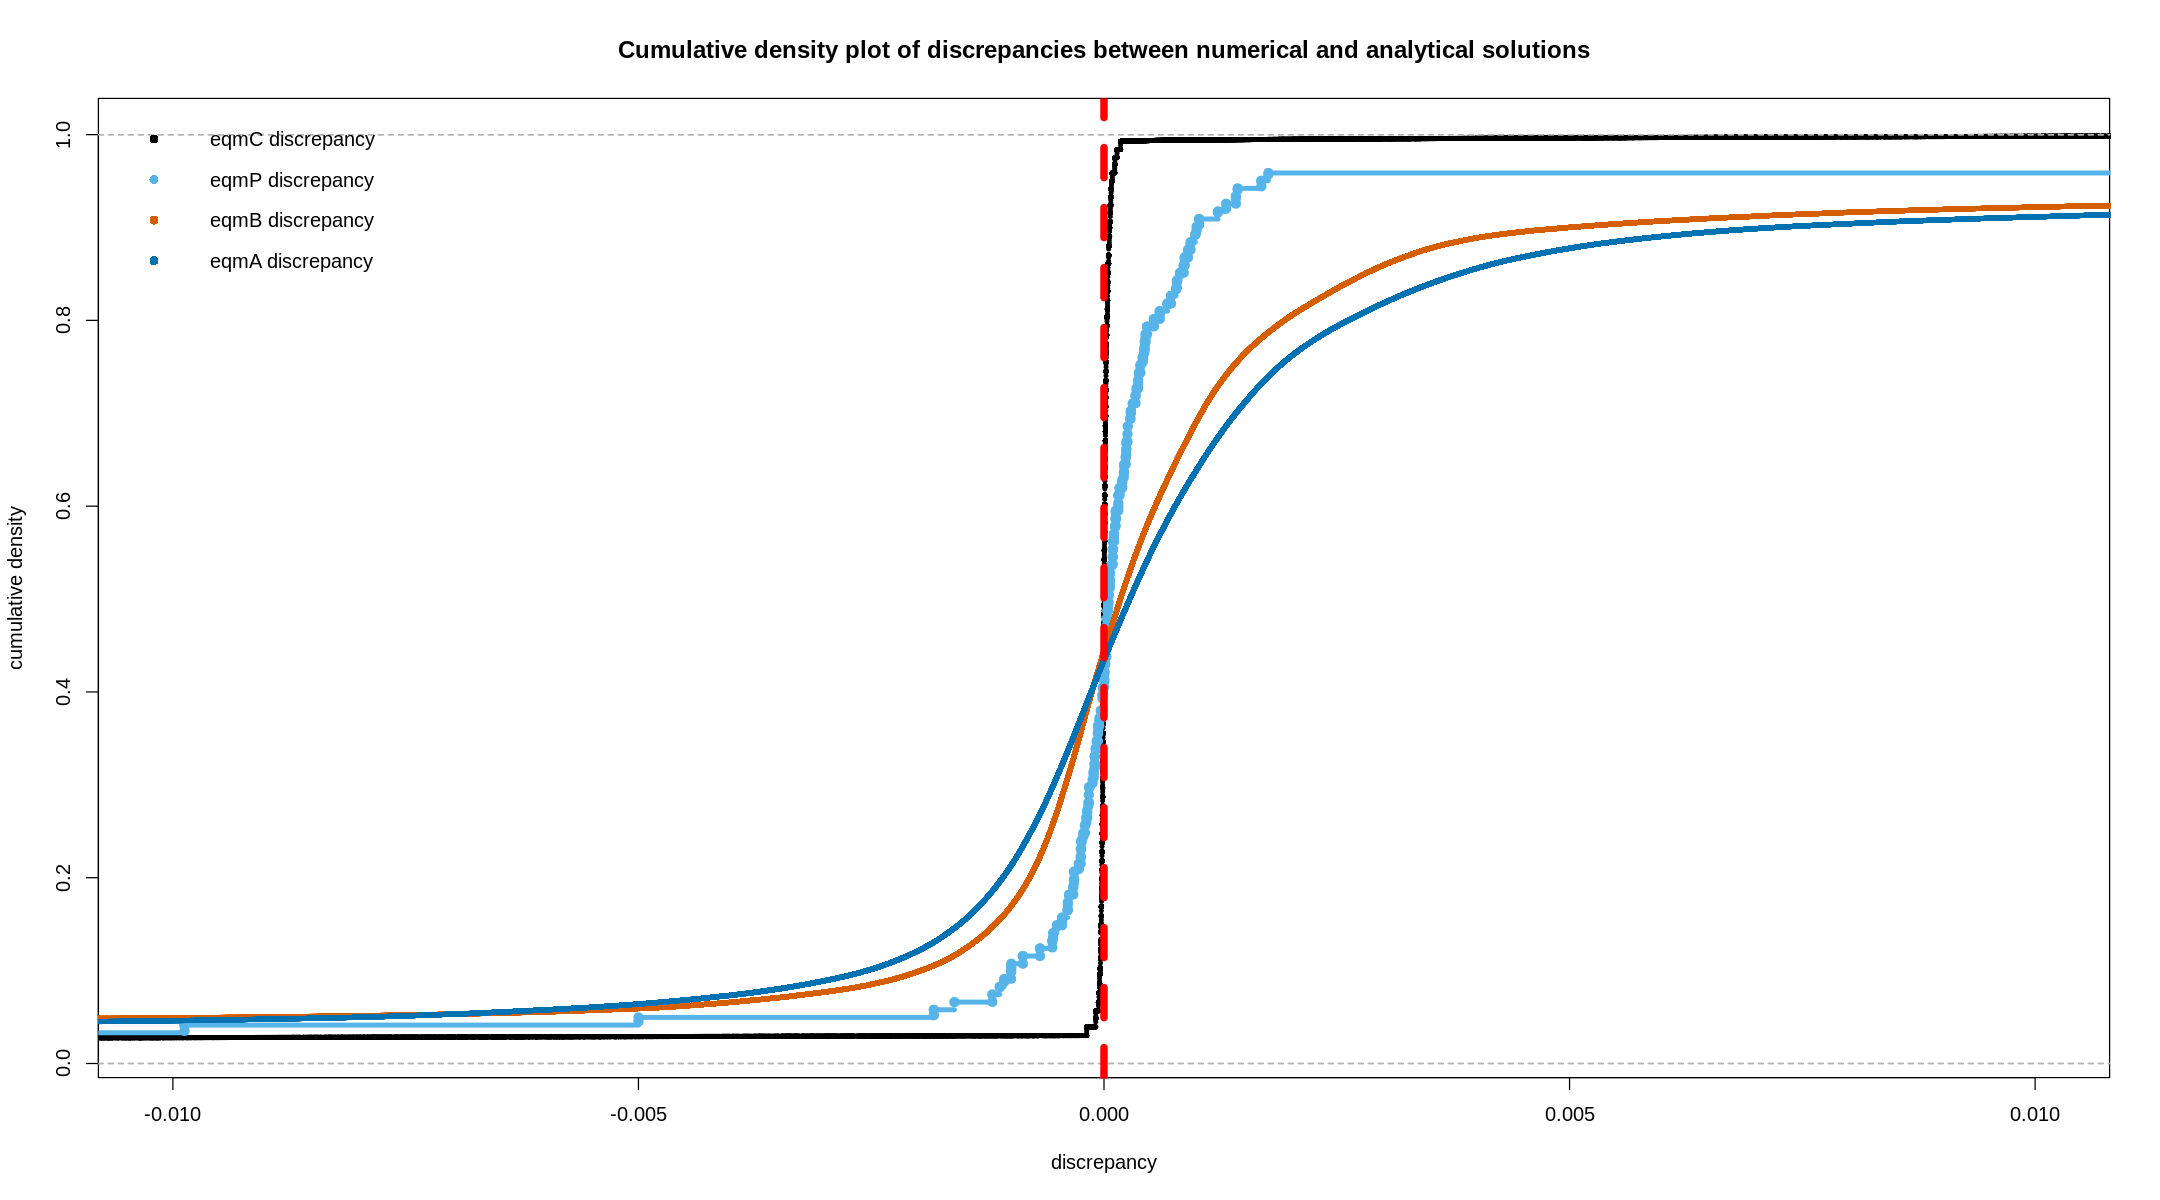

In [50]:
plot(ecdf(dIs[,10]), xlim=c(-.01,.01), xlab="discrepancy", ylab="cumulative density", lwd=4, col=cBp[1], main="Cumulative density plot of discrepancies between numerical and analytical solutions")
lines(ecdf(dIs[,11]), col=cBp[3], lwd=4)
lines(ecdf(dIs[,12]), col=cBp[6], lwd=4)
lines(ecdf(dIs[,13]), col=cBp[5], lwd=4)
abline(v=0,col="red", lwd=6, lty=2)
legend("topleft", legend = paste0("eqm",c("C","P","B","A")," discrepancy"), pch=rep(16,4), col=cBp[c(1,3,6,5)], bty="n")

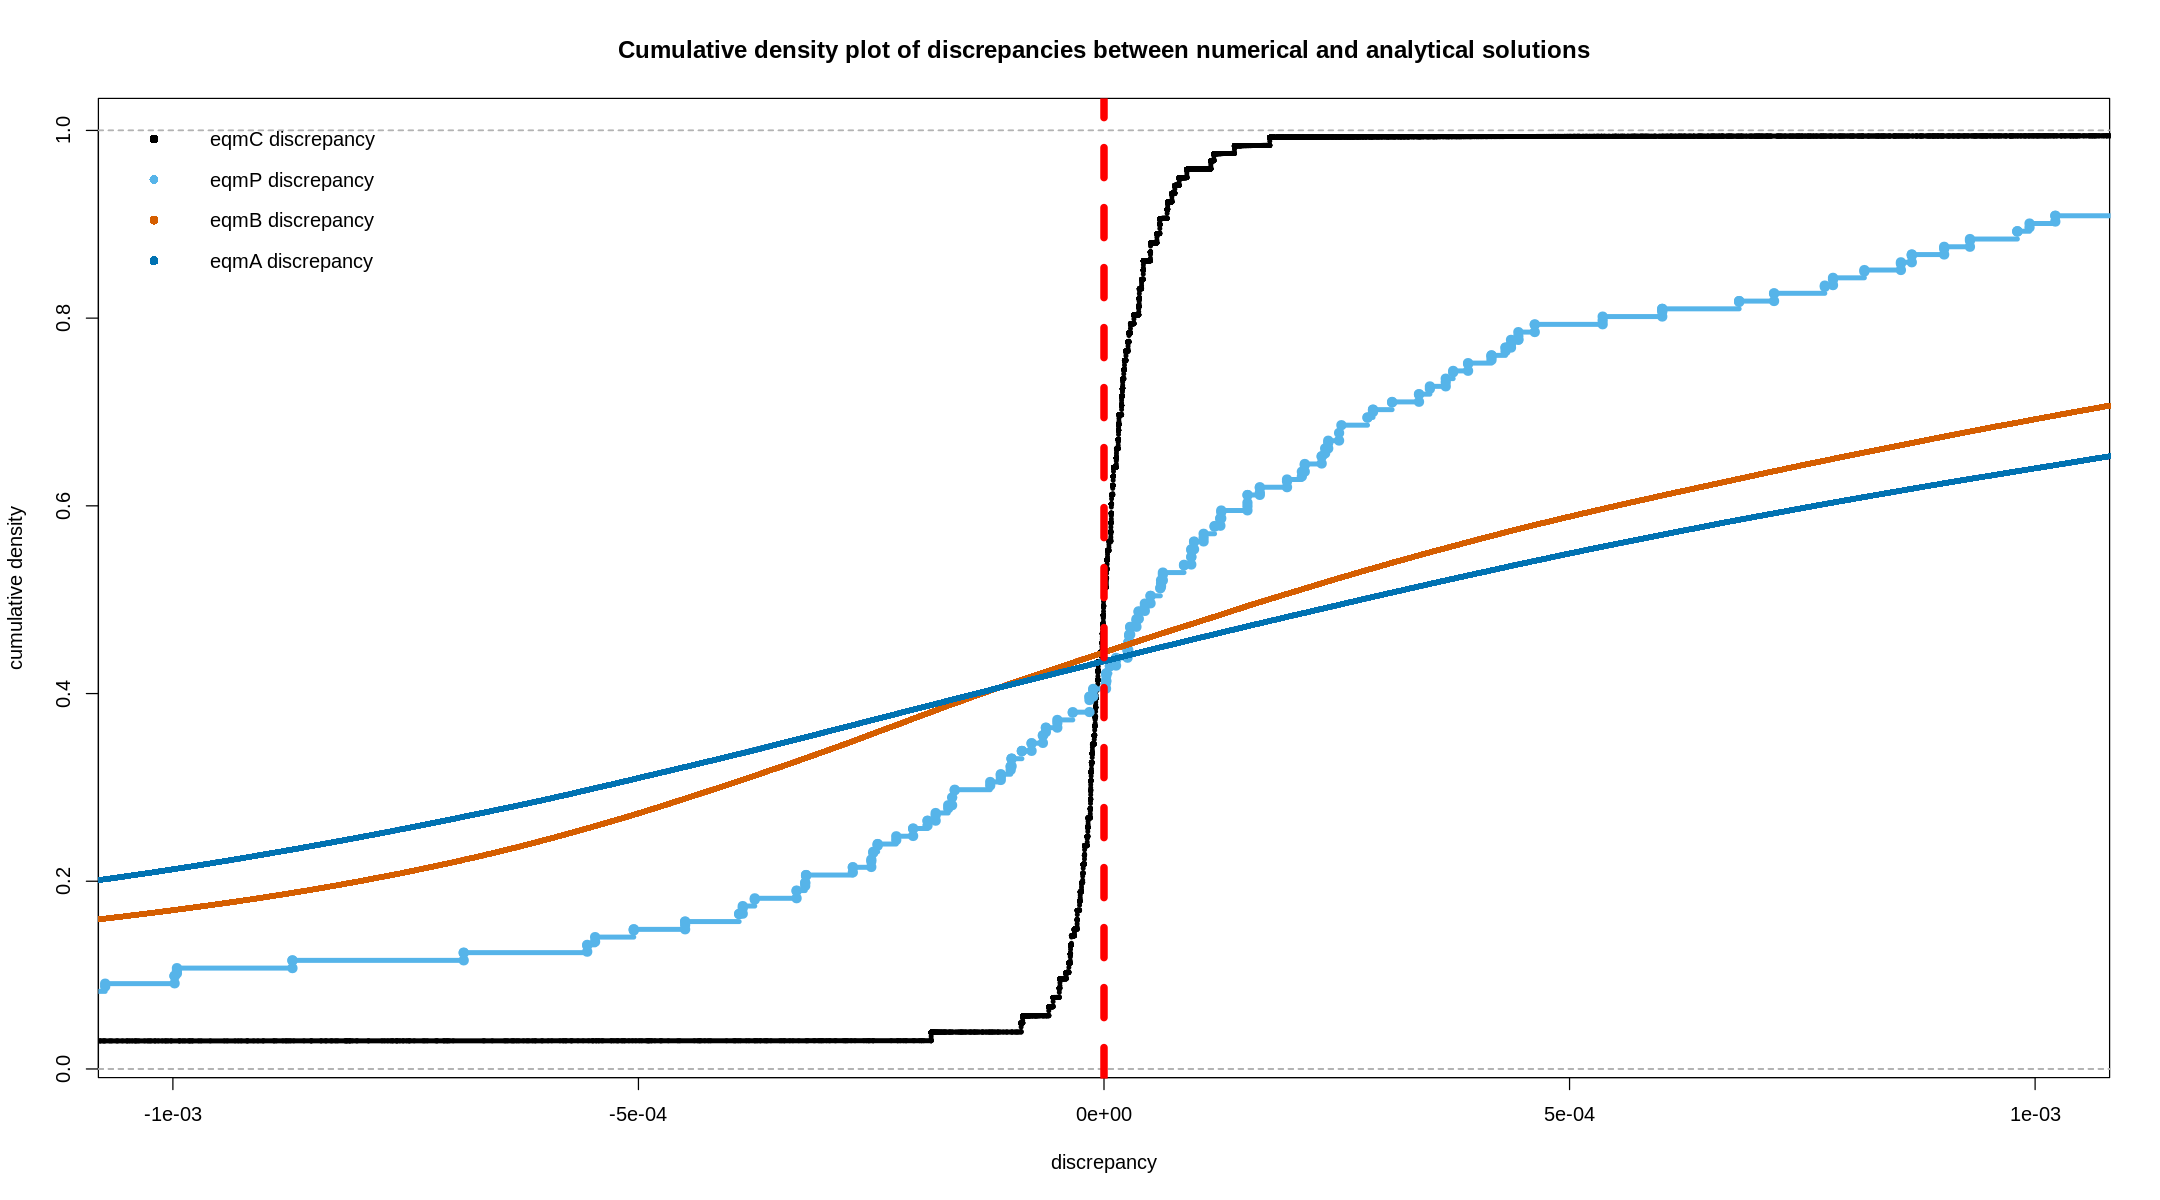

In [51]:
plot(ecdf(dIs[,10]), xlim=c(-.001,.001), xlab="discrepancy", ylab="cumulative density", lwd=4, col=cBp[1], main="Cumulative density plot of discrepancies between numerical and analytical solutions")
lines(ecdf(dIs[,11]), col=cBp[3], lwd=4)
lines(ecdf(dIs[,12]), col=cBp[6], lwd=4)
lines(ecdf(dIs[,13]), col=cBp[5], lwd=4)
abline(v=0,col="red", lwd=6, lty=2)
legend("topleft", legend = paste0("eqm",c("C","P","B","A")," discrepancy"), pch=rep(16,4), col=cBp[c(1,3,6,5)], bty="n")

## distribution

In [52]:
tEst = c(0,.02,.05,.25,.5,.75,.95,.98,.99,.995,1)
idRef = as.data.frame(matrix(NA, nc=4, nr=length(tEst)))
colnames(idRef) = paste0("eqm",c("C","P","B","A"))
rownames(idRef) = paste0(tEst*100," %")
for(i in 1:ncol(idRef)){
  idRef[,i] = unname(quantile(dIs[,9+i], prob=tEst))
};rm(i)
idRef

,eqmC,eqmP,eqmB,eqmA
,<dbl>,<dbl>,<dbl>,<dbl>
0 %,-5.191097e-01,-0.0662500000,-0.3212547779,-0.5520940491
2 %,-5.349403e-02,-0.0262500000,-0.1168752241,-0.1579318611
5 %,-8.732242e-05,-0.0018276284,-0.0090756347,-0.0079107217
25 %,-1.738487e-05,-0.0002050000,-0.0005780531,-0.0007827601
50 %,-4.995157e-07,0.0000500000,0.0001759116,0.0002760691
75 %,2.200103e-05,0.0003910096,0.0013816248,0.0018751056
95 %,8.899103e-05,0.0016900978,0.1307132926,0.1435064978
98 %,1.401344e-04,0.0616250000,0.3882000000,0.4411418577
99 %,1.780397e-04,0.1010000000,0.6389400000,0.6388908163


What is the percentage of crashed systems under the radar of analytical solving?

In [53]:
tHres = .1
nExtDF = dIs[which(dIs[,10]>tHres | dIs[,10]<=-tHres | dIs[,11]>tHres | dIs[,11]<=-tHres | dIs[,12]>tHres | dIs[,12]<=-tHres | dIs[,13]>tHres | dIs[,13]<=-tHres),]
nExt = nrow(nExtDF)
paste0(nExt," rows out of ",nrow(dIs)," (approx. ",round(nExt/nrow(dIs)*100),"%) are having discrepancies > ",tHres)

[1] "130394 rows out of 1234321 (approx. 11%) are having discrepancies > 0.1"

Distribution of crashed ode systems

In [54]:
rAwExt = rAw[which(dIs[,10]>tHres | dIs[,10]<=-tHres | dIs[,11]>tHres | dIs[,11]<=-tHres | dIs[,12]>tHres | dIs[,12]<=-tHres | dIs[,13]>tHres | dIs[,13]<=-tHres),10:13]
summary(nExtDF[,10:13]+rAwExt)

  eqmC.num.ana      eqmP.num.ana       eqmB.num.ana    eqmA.num.ana      
 Min.   :0.04709   Min.   :  0.3569   Min.   :  0.0   Min.   :   0.4378  
 1st Qu.:0.06766   1st Qu.:142.7738   1st Qu.:190.1   1st Qu.: 333.0227  
 Median :0.11288   Median :191.8901   Median :344.3   Median : 536.2839  
 Mean   :0.15762   Mean   :170.5709   Mean   :375.3   Mean   : 546.0757  
 3rd Qu.:0.20847   3rd Qu.:257.4337   3rd Qu.:619.6   3rd Qu.: 877.1274  
 Max.   :0.64393   Max.   :306.4950   Max.   :878.7   Max.   :1185.7779  

Are there specific parameters with 100% system stability?

In [55]:
vEcExt = vector(mode="list")
for(i in 1:9){vEcExt[[i]] = uNiqRAW[[i]][which(!uNiqRAW[[i]]%in%unique(nExtDF[,i]))]};rm(i)
vEcExt

[[1]]
numeric(0)

[[2]]
numeric(0)

[[3]]
numeric(0)

[[4]]
numeric(0)

[[5]]
[1] 0.0409

[[6]]
numeric(0)

[[7]]
numeric(0)

[[8]]
numeric(0)

[[9]]
numeric(0)

## effect of initial density
![](graph/discrepancyByIniPop.png)
Discrepancy count plateau at initial population approximately 10$^{-3}$gC m$^{-3}$ with no crashed integration simulations (tested densities: 1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-11, 1e-12)
![](graph/discrepancy.5ByIniPop.png)
![](graph/discrepancy.05ByIniPop.png)

In [56]:
dIs0 = read.csv("../result/discrepancy_1.csv", header = T)
nUm = data.frame(dIs[,1:9],rAw[,10:13]+dIs[,10:13])

In [57]:
summary(dIs0[,10:13])

  eqmC.num.ana         eqmP.num.ana        eqmB.num.ana       
 Min.   :-0.5191097   Min.   :-0.066250   Min.   :-0.3212548  
 1st Qu.:-0.0000180   1st Qu.:-0.000205   1st Qu.:-0.0005540  
 Median :-0.0000005   Median : 0.000050   Median : 0.0001889  
 Mean   :-0.0037236   Mean   : 0.001818   Mean   : 0.0208969  
 3rd Qu.: 0.0000212   3rd Qu.: 0.000391   3rd Qu.: 0.0013963  
 Max.   : 0.0001780   Max.   : 0.172500   Max.   : 3.0600000  
  eqmA.num.ana       
 Min.   :-0.5520940  
 1st Qu.:-0.0007506  
 Median : 0.0002914  
 Mean   : 0.0192397  
 3rd Qu.: 0.0018901  
 Max.   : 2.5418246  

In [58]:
summary(dIs[,10:13])

  eqmC.num.ana         eqmP.num.ana        eqmB.num.ana       
 Min.   :-0.5191097   Min.   :-0.066250   Min.   :-0.3212548  
 1st Qu.:-0.0000174   1st Qu.:-0.000205   1st Qu.:-0.0005781  
 Median :-0.0000005   Median : 0.000050   Median : 0.0001759  
 Mean   :-0.0036709   Mean   : 0.001818   Mean   : 0.0206782  
 3rd Qu.: 0.0000220   3rd Qu.: 0.000391   3rd Qu.: 0.0013816  
 Max.   : 0.0439334   Max.   : 0.172500   Max.   : 3.0600000  
  eqmA.num.ana       
 Min.   :-0.5520940  
 1st Qu.:-0.0007828  
 Median : 0.0002761  
 Mean   : 0.0190736  
 3rd Qu.: 0.0018751  
 Max.   : 2.5418246  

In [59]:
summary(rAw[,10:13])

      eqmC              eqmP              eqmB              eqmA         
 Min.   :0.04710   Min.   :  0.357   Min.   : -3.060   Min.   :  -2.104  
 1st Qu.:0.06120   1st Qu.:  0.725   1st Qu.:  1.068   1st Qu.:   1.941  
 Median :0.08734   Median :  1.120   Median :  2.148   Median :   3.370  
 Mean   :0.13202   Mean   : 21.902   Mean   : 48.081   Mean   :  70.115  
 3rd Qu.:0.15250   3rd Qu.:  2.404   3rd Qu.:  5.094   3rd Qu.:   7.836  
 Max.   :0.60000   Max.   :306.500   Max.   :878.500   Max.   :1186.000  

In [60]:
summary(nUm[,10:13])

      eqmC              eqmP               eqmB              eqmA          
 Min.   :0.04709   Min.   :  0.3569   Min.   :  0.000   Min.   :   0.4378  
 1st Qu.:0.06118   1st Qu.:  0.7254   1st Qu.:  1.069   1st Qu.:   1.9416  
 Median :0.08729   Median :  1.1209   Median :  2.148   Median :   3.3694  
 Mean   :0.12834   Mean   : 21.9039   Mean   : 48.102   Mean   :  70.1344  
 3rd Qu.:0.15244   3rd Qu.:  2.4041   3rd Qu.:  5.095   3rd Qu.:   7.8331  
 Max.   :0.64393   Max.   :306.4950   Max.   :878.683   Max.   :1185.7779  

# carbon harvest

In [61]:
rmC = function(B=1, parameter=c(0,.875,.63,.259,.001,.6,.55,1.046,.14)){
    ePR = parameter[2]
    eP = parameter[3]
    gP = parameter[4]
    aP = parameter[5]
    eBR = parameter[6]
    eB = parameter[7]
    gB = parameter[8]
    mB = parameter[9]
    
    C = mB/(eBR*eB*gB)
    x = (B*gB*mB*aP*(eBR-1) + eBR*eB*gB*eP*(ePR*gP)^2)/(aP*mB)
    return(c(x,x*C))
}

In [62]:
hArv = hArx = haRef = as.data.frame(matrix(NA,nr=20, nc=8))
colnames(haRef) = colnames(hArx) = colnames(dIs)[2:9]
colnames(hArv) = paste0("harvest_",colnames(dIs)[2:9])

In [63]:
for(i in 1:ncol(haRef)){
    if(length(uNiqRAW[[i+1]])>1){
        haRef[,i]=seq(uNiqRAW[[i+1]][1],uNiqRAW[[i+1]][length(uNiqRAW[[i+1]])],(uNiqRAW[[i+1]][length(uNiqRAW[[i+1]])]-uNiqRAW[[i+1]][1])/(nrow(haRef)-1))
    }else{
        haRef[,i]=seq(.1,1,(1-.1)/(nrow(haRef)-1))
    }
};rm(i)

In [64]:
for(i in 1:nrow(hArv)){for(j in 1:ncol(hArv)){
    pA = c(0,.875,.63,.259,.001,.6,.55,1.046,.14)
    pA[j+1] = haRef[i,j]
    tmp = rmC(parameter=pA)
    hArx[i,j] = tmp[1]
    hArv[i,j] = tmp[2]
}};rm(i,j,tmp,pA)

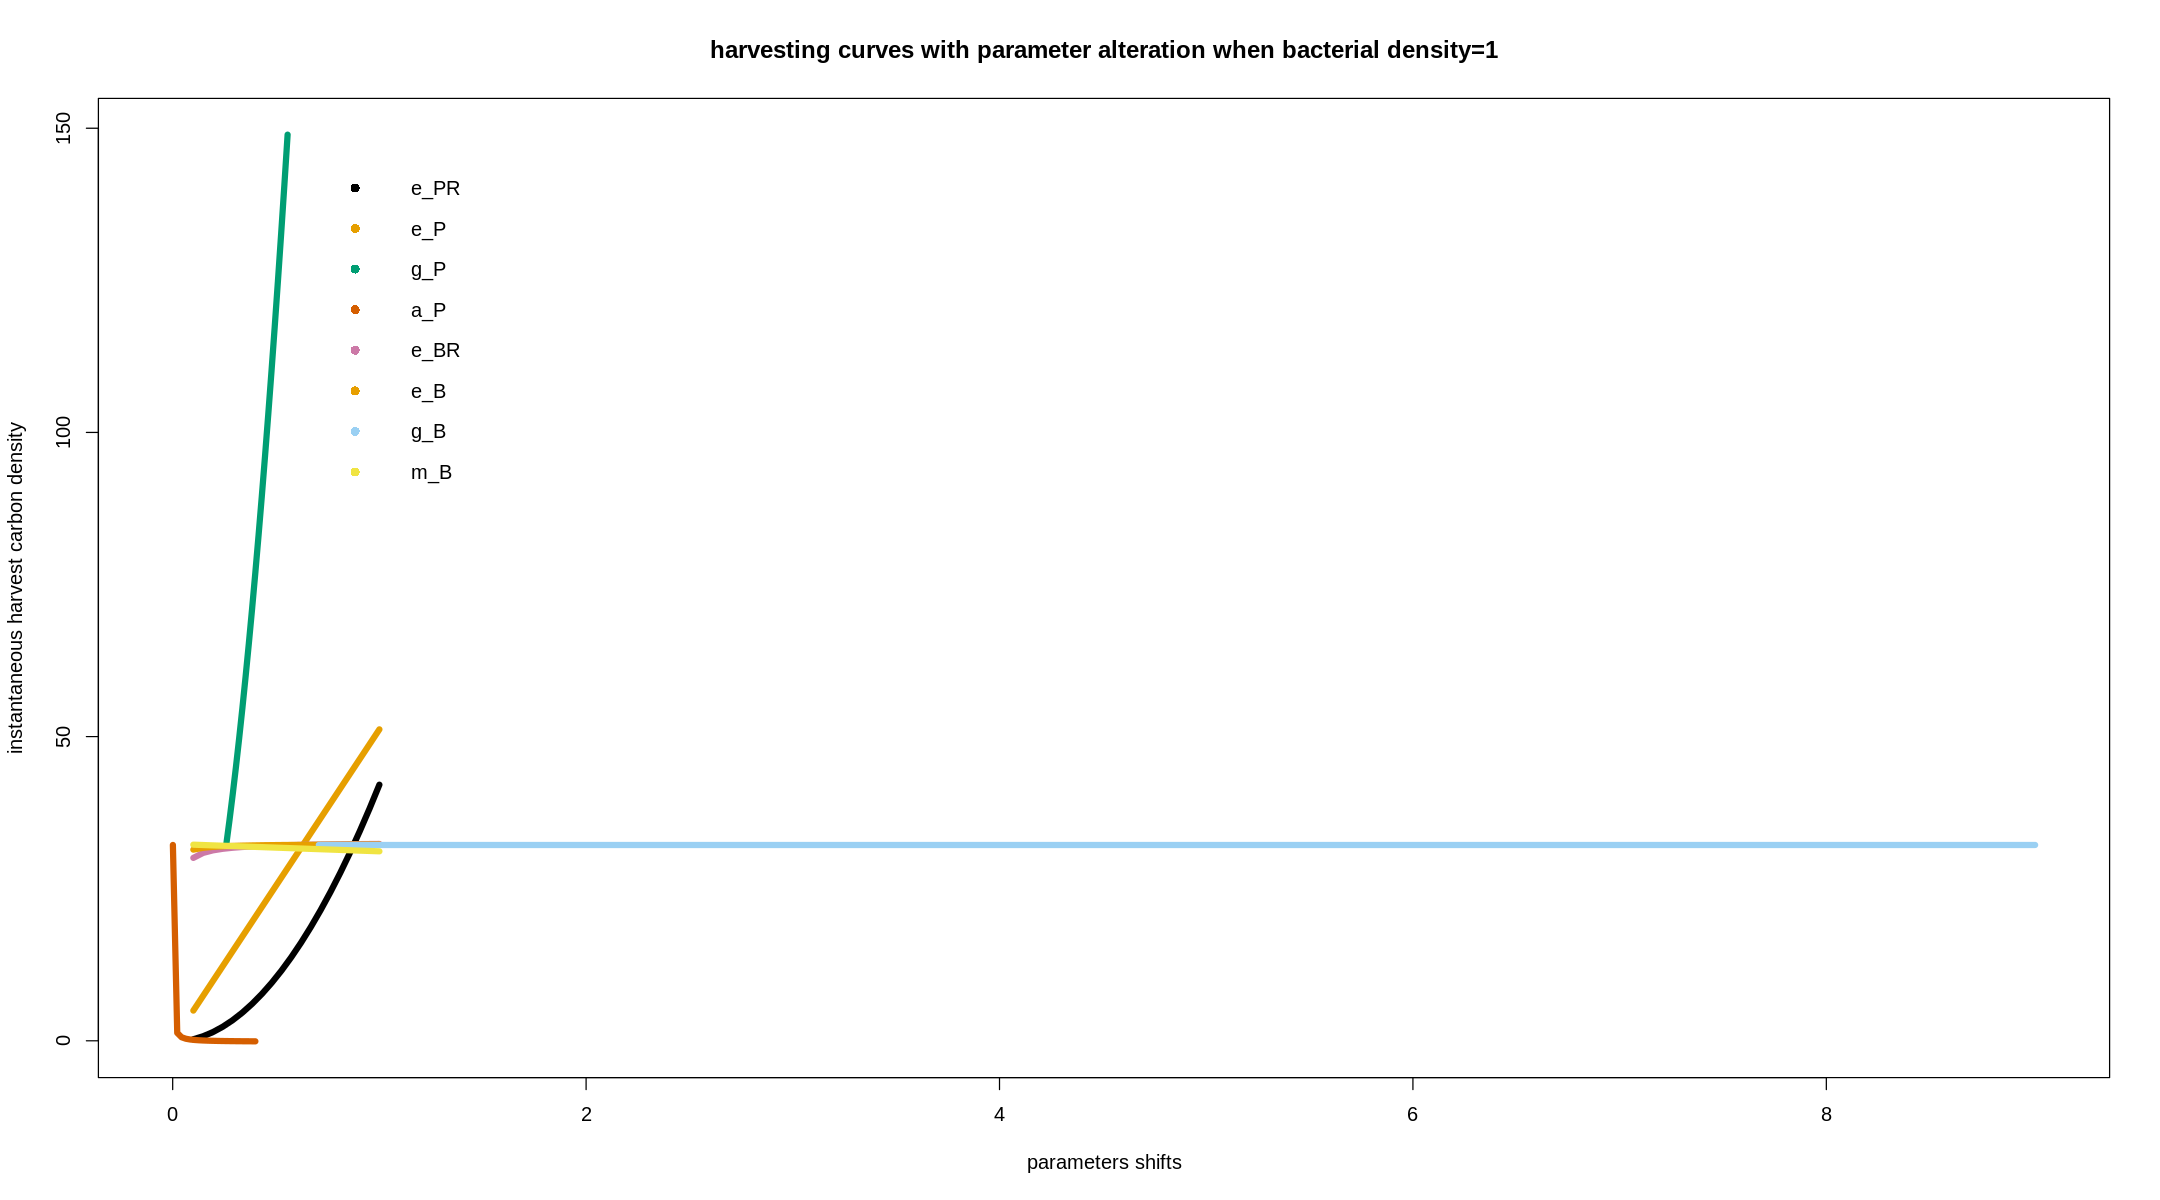

In [65]:
matplot(haRef,hArv,type = "l", col = cBp[-c(3,5)], lty=1, lwd=5, xlab="parameters shifts", ylab="instantaneous harvest carbon density", main="harvesting curves with parameter alteration when bacterial density=1")
legend("topleft", inset=c(.1,.05), bty="n", legend = colnames(haRef), pch = rep(16,ncol(haRef)), col = cBp[-c(3,5)])

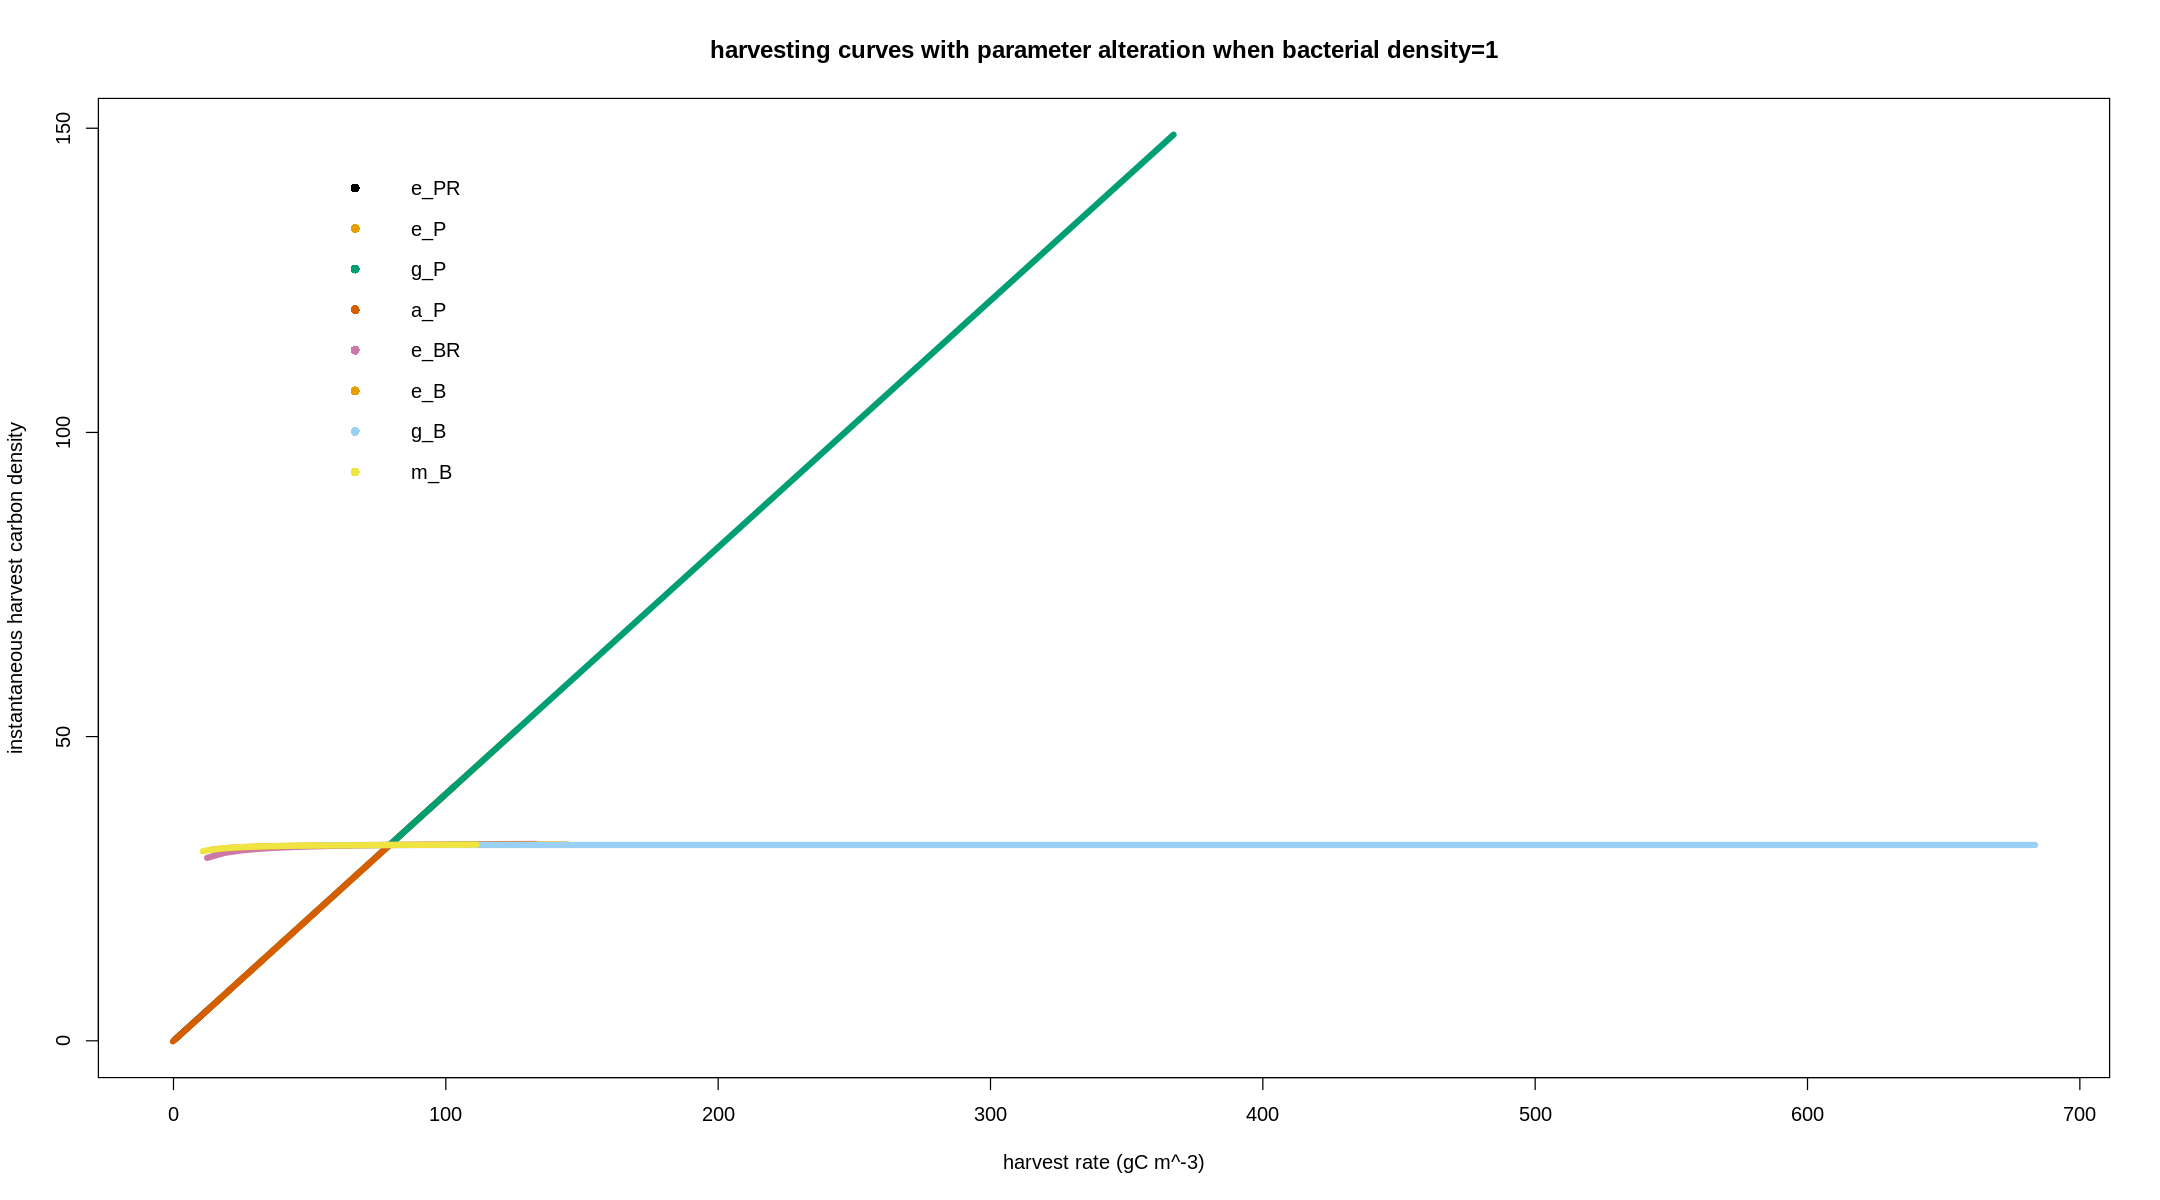

In [66]:
matplot(hArx,hArv,type = "l", col = cBp[-c(3,5)], lty=1, lwd=5, xlab="harvest rate (gC m^-3)", ylab="instantaneous harvest carbon density", main="harvesting curves with parameter alteration when bacterial density=1")
legend("topleft", inset=c(.1,.05), bty="n", legend = colnames(hArx), pch = rep(16,ncol(hArx)), col = cBp[-c(3,5)])